# Removing Outliers for Beacon Data

In [12]:
import pandas as pd
import plotly.express as px

## Plotting Functions

In [13]:
def clean_layout(fig, no_bg=True, short_xticklabel=True, fontsize=None, nticks=None):
    """Updates layout of plotly graphs"""
    if fontsize is not None:
        fig.update_layout(
            font=dict(size=fontsize)
        )
    if no_bg:
        fig.update_layout(
            paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)',
        )
        for update_axes in [fig.update_xaxes, fig.update_yaxes]:
            update_axes(
                zeroline=True,
                linecolor='black'
            )

    if short_xticklabel:
        fig.update_xaxes(
            tickangle=45,
            tickformat="%m-%y",
            nticks=nticks,
        )
    return fig

def timefacet(df):
    important_vars = ['TVOC','CO2','NO2','CO','PM_C_2p5','PM_C_10','T_NO2','T_CO','Temperature [C]','Lux','RH_NO2','RH_CO','Relative Humidity']

    for var in important_vars:
        print(var)
        fig = px.scatter(df, x=df.index.get_level_values('Timestamp'), y=var,
                        facet_col='Beacon', facet_col_wrap=5, render_mode='webgl')
        
        fig = clean_layout(fig, fontsize=14, nticks=8)
        fig.update_traces(marker=dict(size=3))
        fig.show("png", width=1200, height=800)

def histofacet(df):
    important_vars = ['TVOC','CO2','NO2','CO','PM_C_2p5','PM_C_10','T_NO2','T_CO','Temperature [C]','Lux','RH_NO2','RH_CO','Relative Humidity']

    for var in important_vars: 
        fig = px.histogram(df, x=var,
                      facet_col='Beacon', facet_col_wrap=5,
                     width=1200, height=800)

        fig = clean_layout(fig, fontsize=14, nticks=8, short_xticklabel=False)
        fig.show("png",width=1200, height=700)


## Data Prior to Extreme Value Removal

In [14]:
important_cols = ['TVOC','CO2','NO2','CO','PM_C_2p5','PM_C_10','T_NO2','T_CO','Temperature [C]','Lux','RH_NO2','RH_CO','Relative Humidity','Beacon']
data = pd.read_parquet('../data/processed/bpeace2-beacon_with_extreme.parquet')
data = data[important_cols]
data.head(5)

TVOC         CO2    NO2       CO   PM_C_2p5    PM_C_10  \
Timestamp                                                                       
2020-06-08 00:00:00  537.88  530.235090  74.64 -0.68488  11.135812  16.892285   
2020-06-08 00:05:00  537.70  516.750315  75.85 -0.52275   8.442126  12.512238   
2020-06-08 00:10:00  537.64  509.967039  76.56 -0.78328   7.951792  11.243390   
2020-06-08 00:15:00  542.40  493.069968  74.52 -0.83856   9.946487  14.445220   
2020-06-08 00:20:00  541.04  478.463197  74.92 -0.48872   9.970680  14.957063   

                     T_NO2  T_CO  Temperature [C]  Lux  RH_NO2  RH_CO  \
Timestamp                                                               
2020-06-08 00:00:00   28.0  28.0        30.514336  0.0   36.80  39.32   
2020-06-08 00:05:00   28.0  28.0        30.652443  0.0   37.00  40.00   
2020-06-08 00:10:00   28.0  28.0        30.757097  0.0   37.00  39.72   
2020-06-08 00:15:00   28.0  28.0        30.636314  0.0   36.28  39.00   
2020-06-08 00:20:00   28.0  28.0        30.581627  0.0   36.40  39.20   

                     Relative Humidity  Beacon  
Timestamp                                       
2020-06-08 00:00:00          35.203064       1  
2020-06-08 00:05:00          35.344177       1  
2020-06-08 00:10:00          35.270462       1  
2020-06-08 00:15:00          35.064514       1  
2020-06-08 00:20:00          35.020203       1

### Line Plot

TVOC


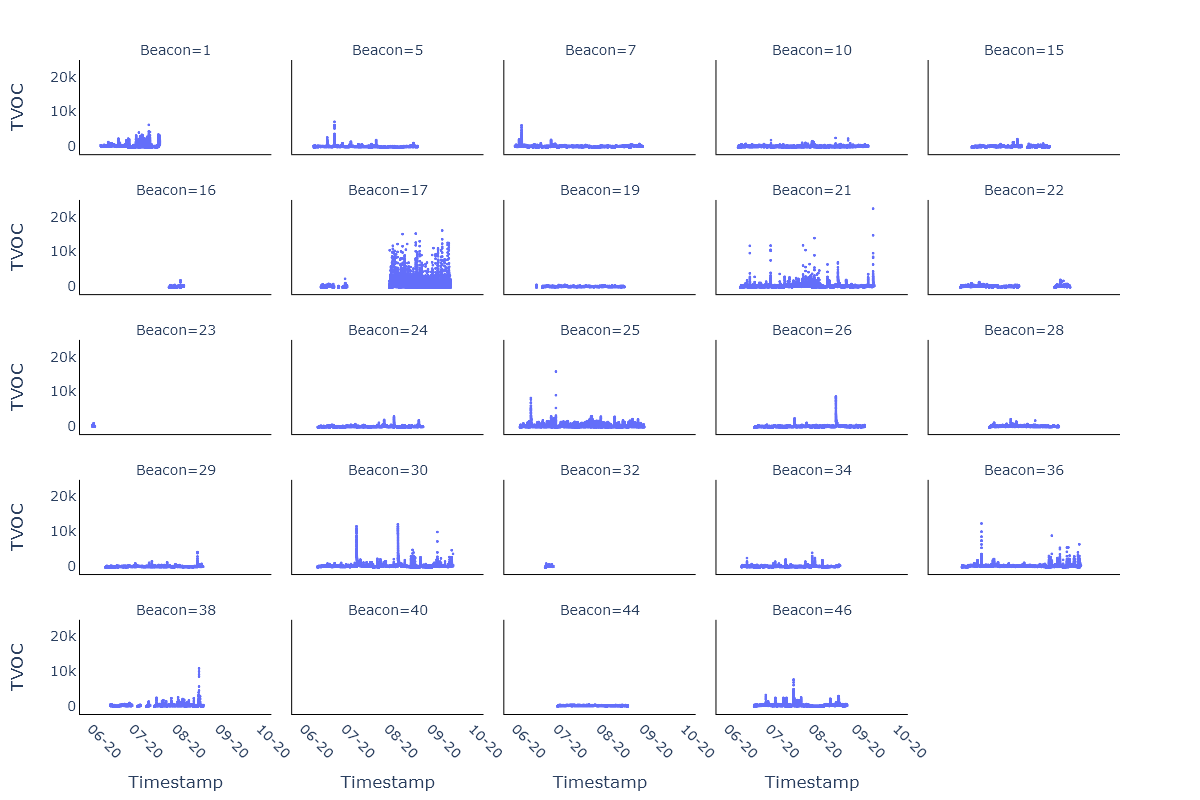

CO2


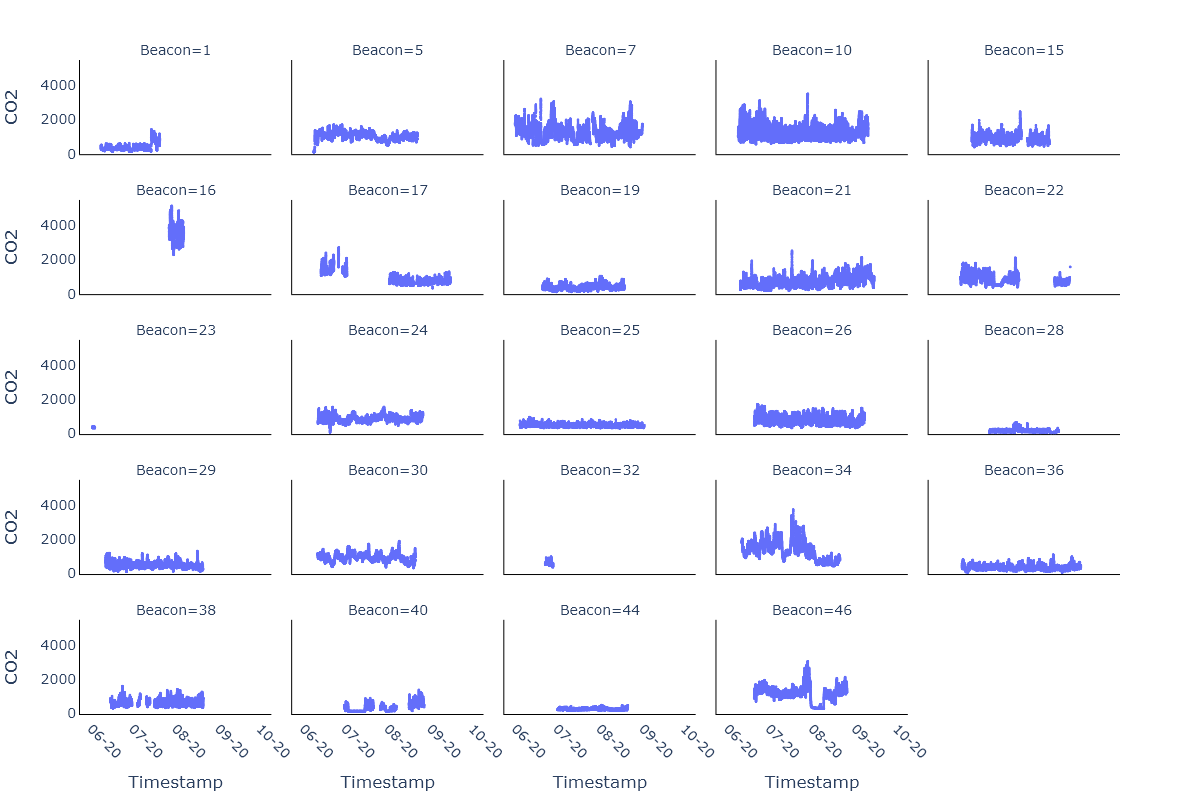

NO2


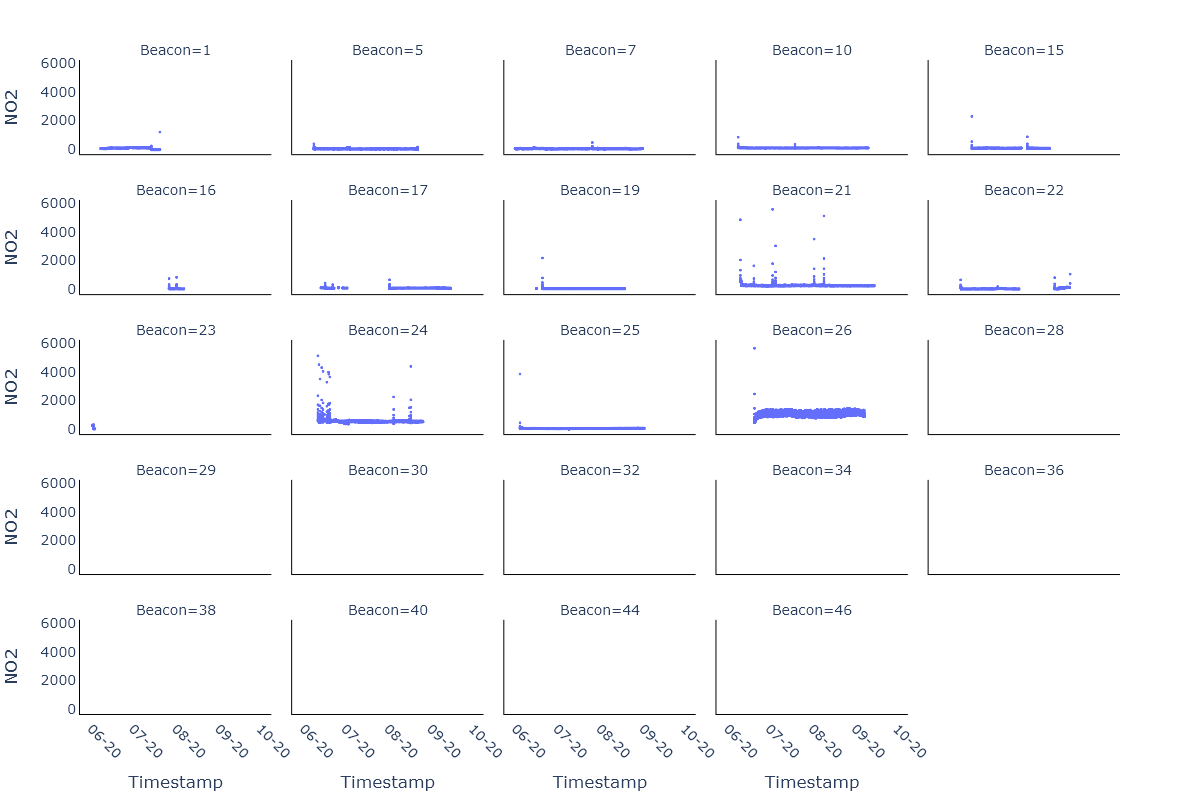

CO


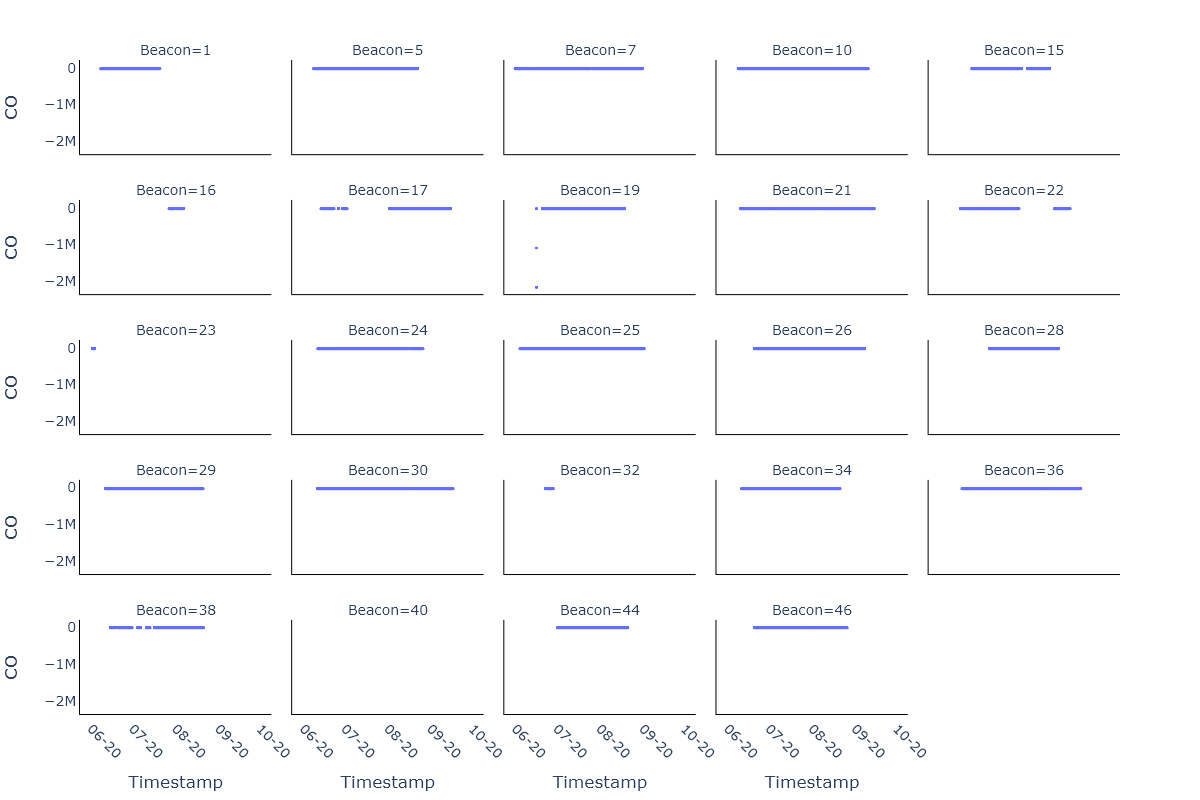

PM_C_2p5


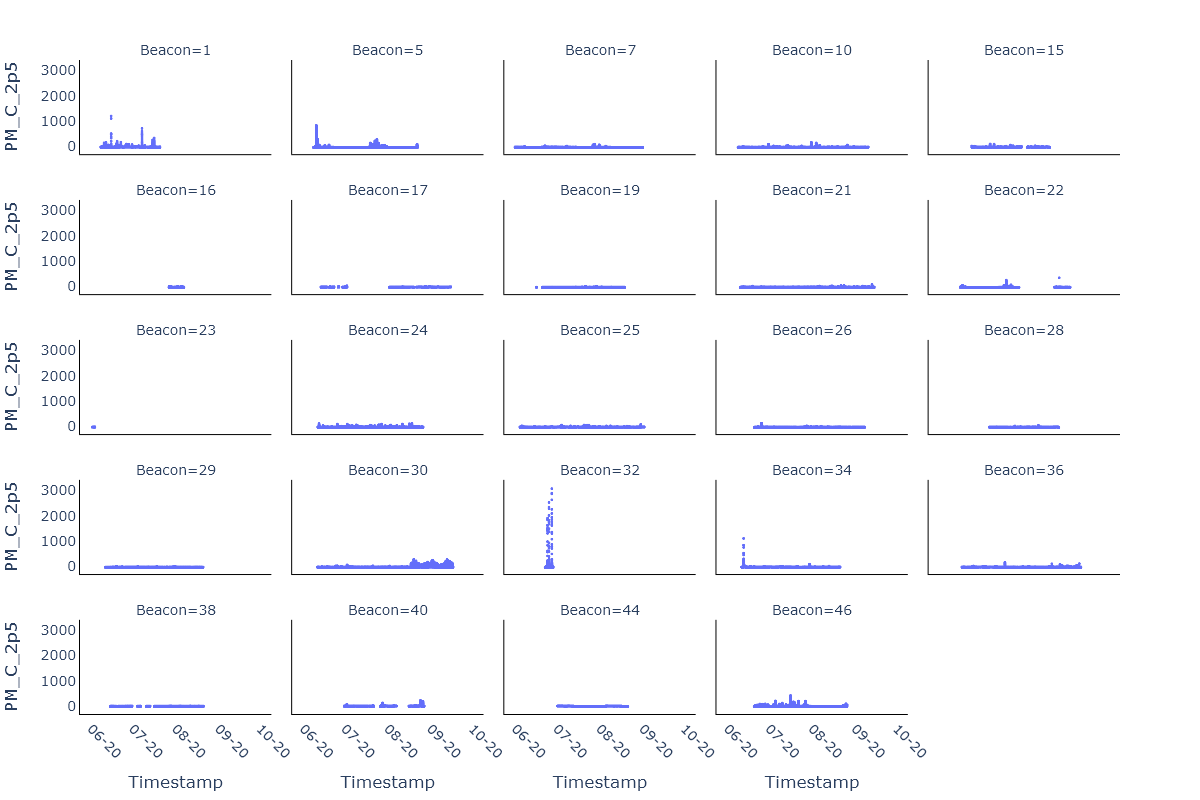

PM_C_10


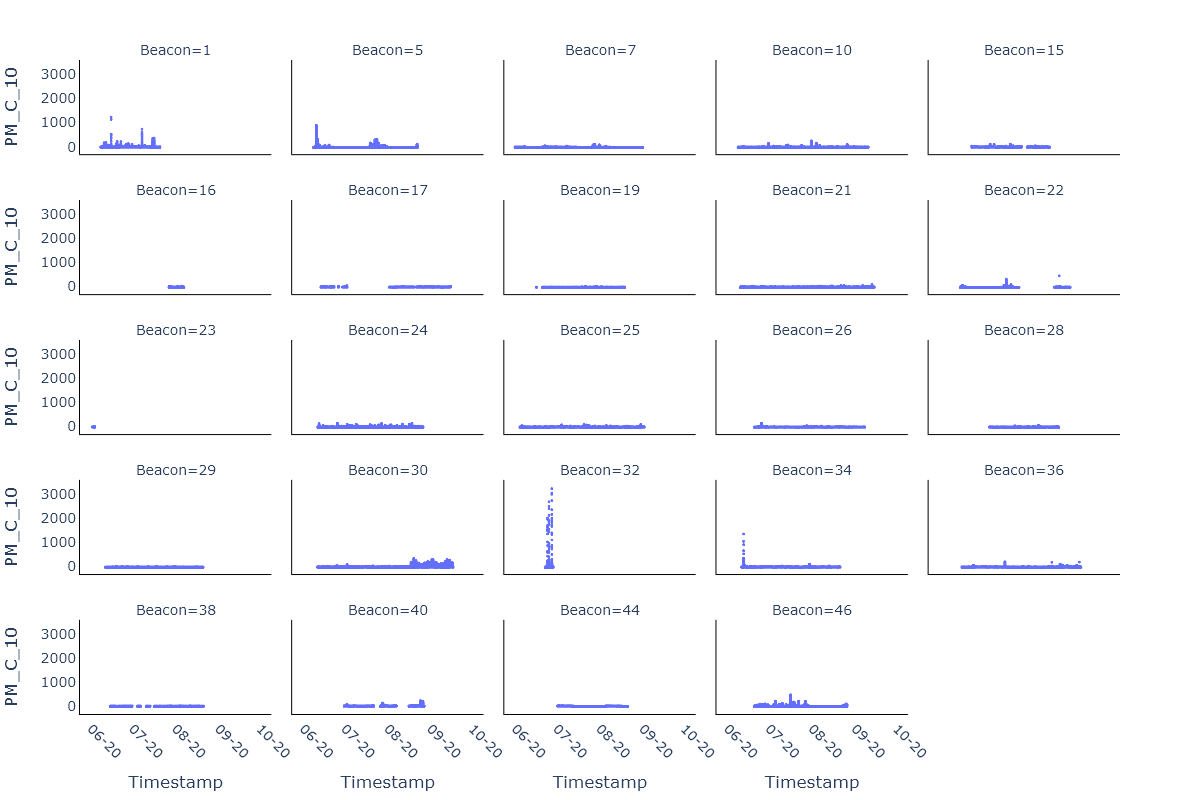

T_NO2


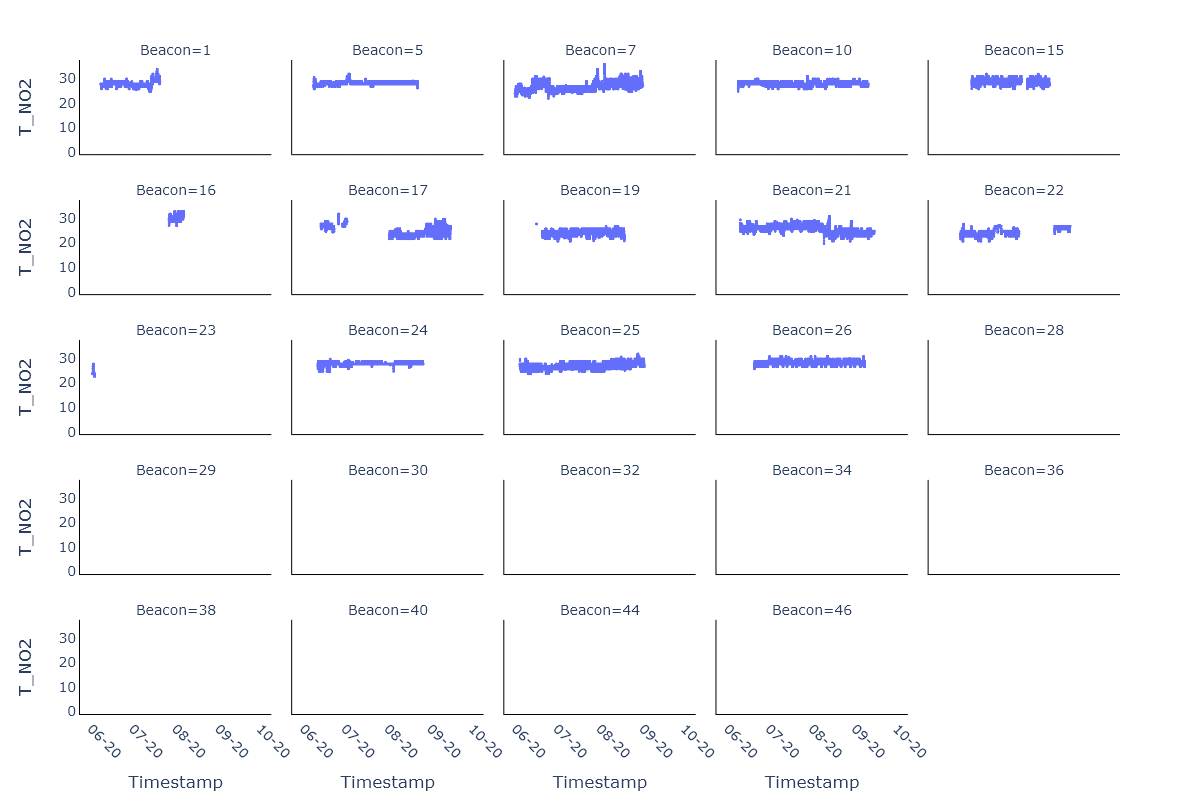

T_CO


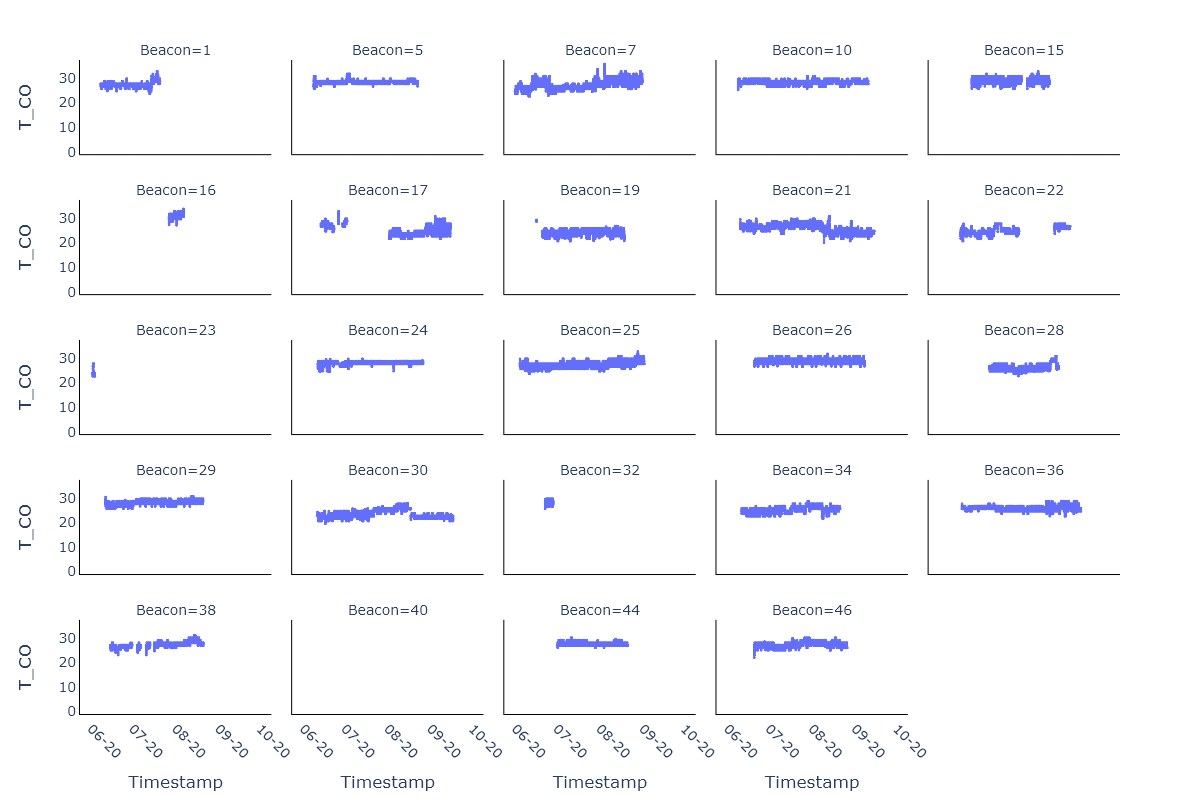

Temperature [C]


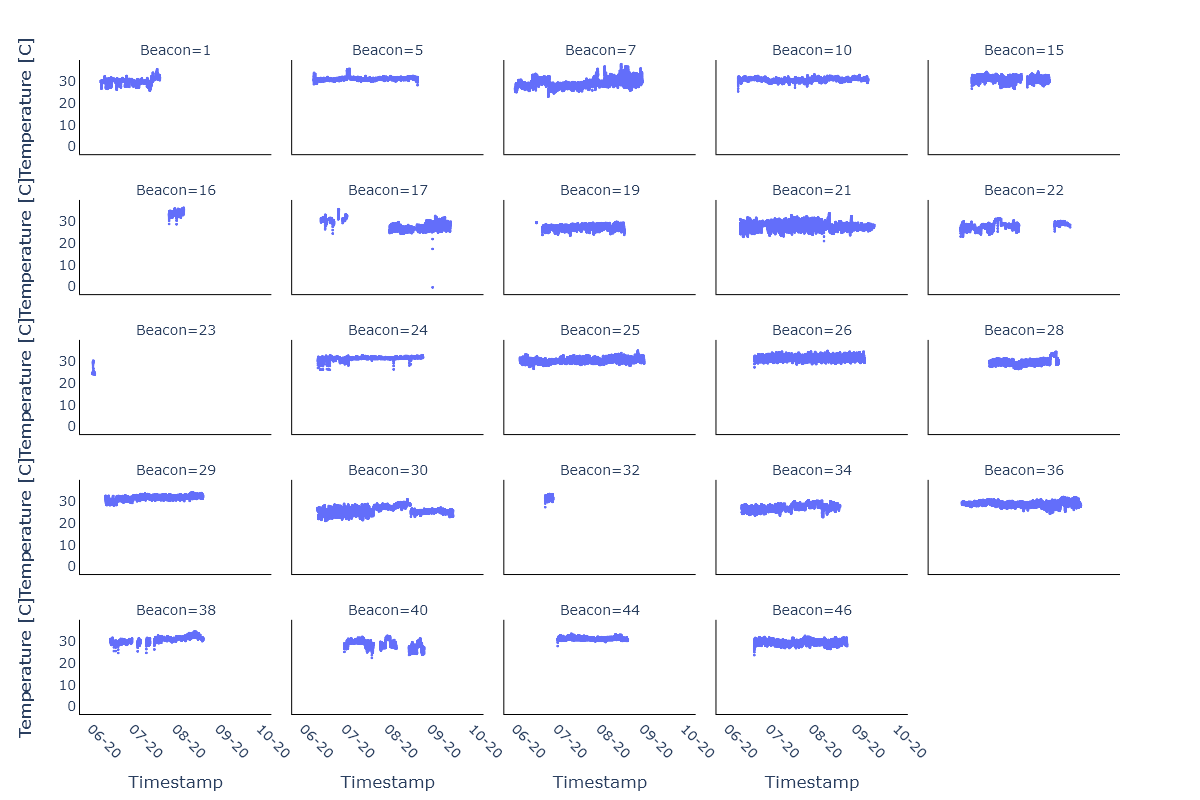

Lux


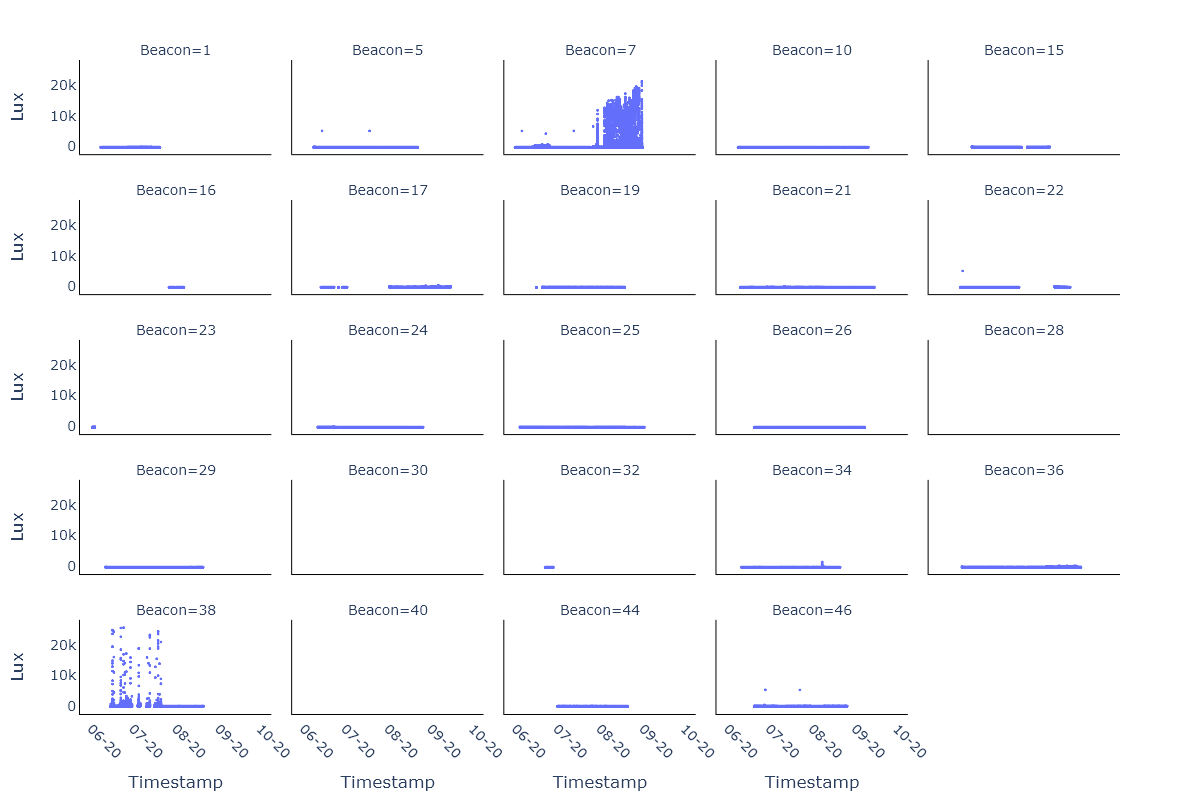

RH_NO2


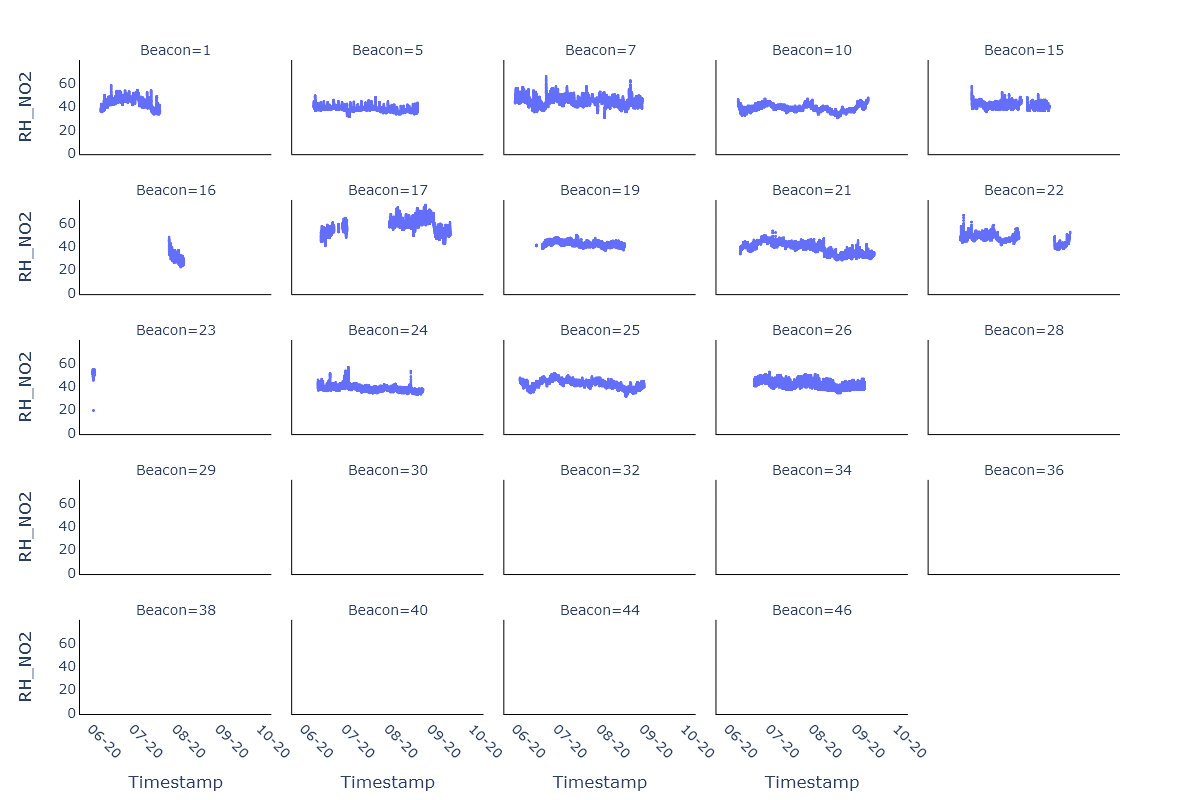

RH_CO


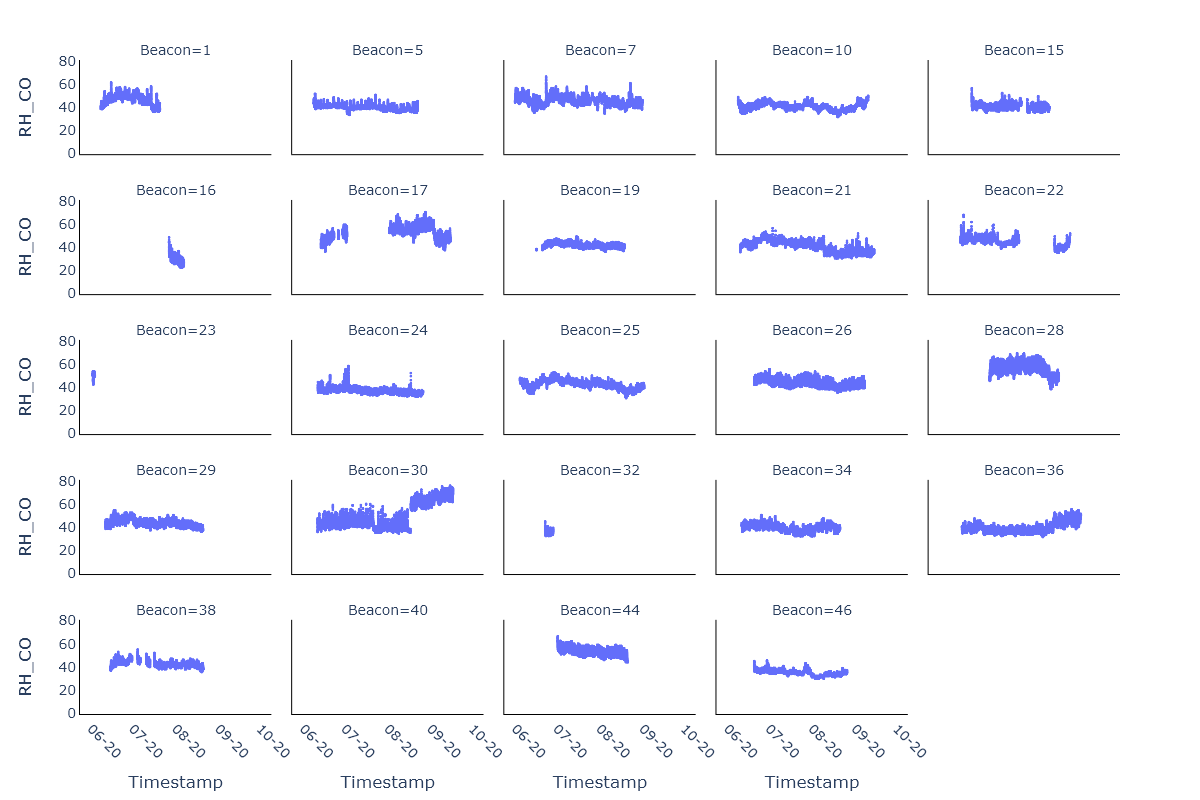

Relative Humidity


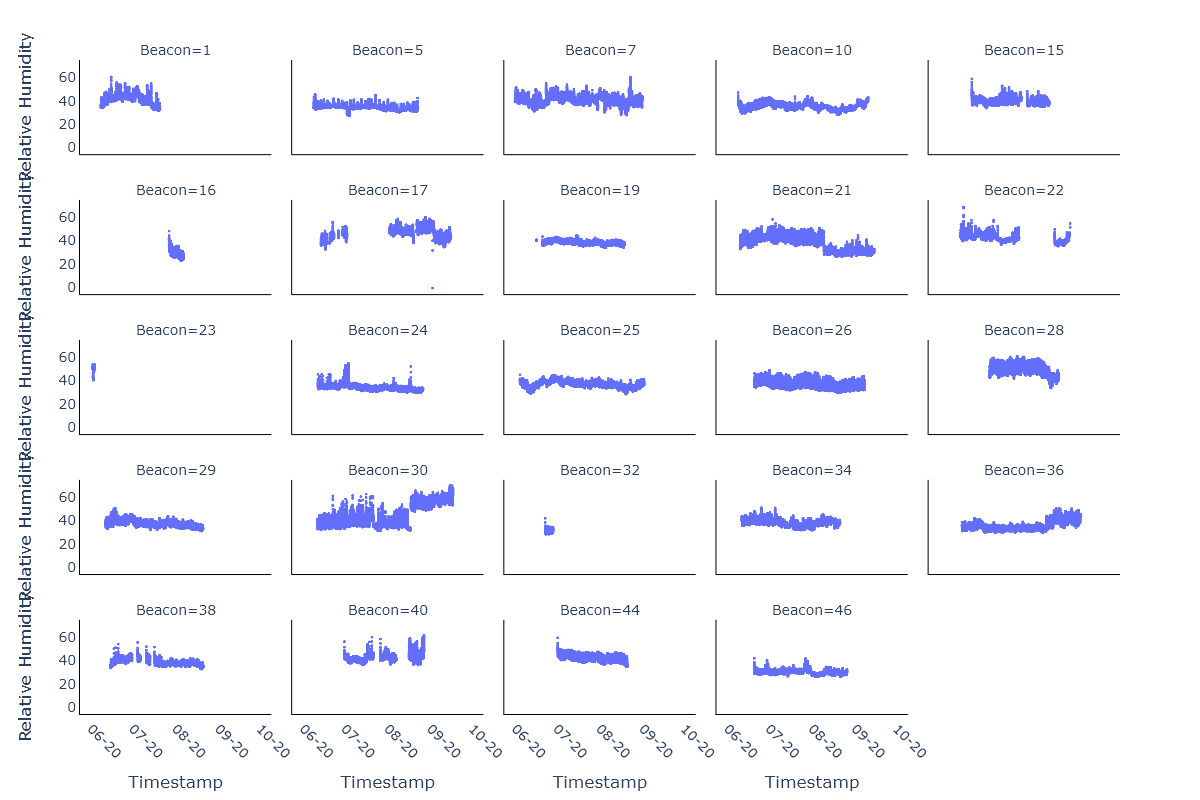

In [24]:
timefacet(data)

### Histogram

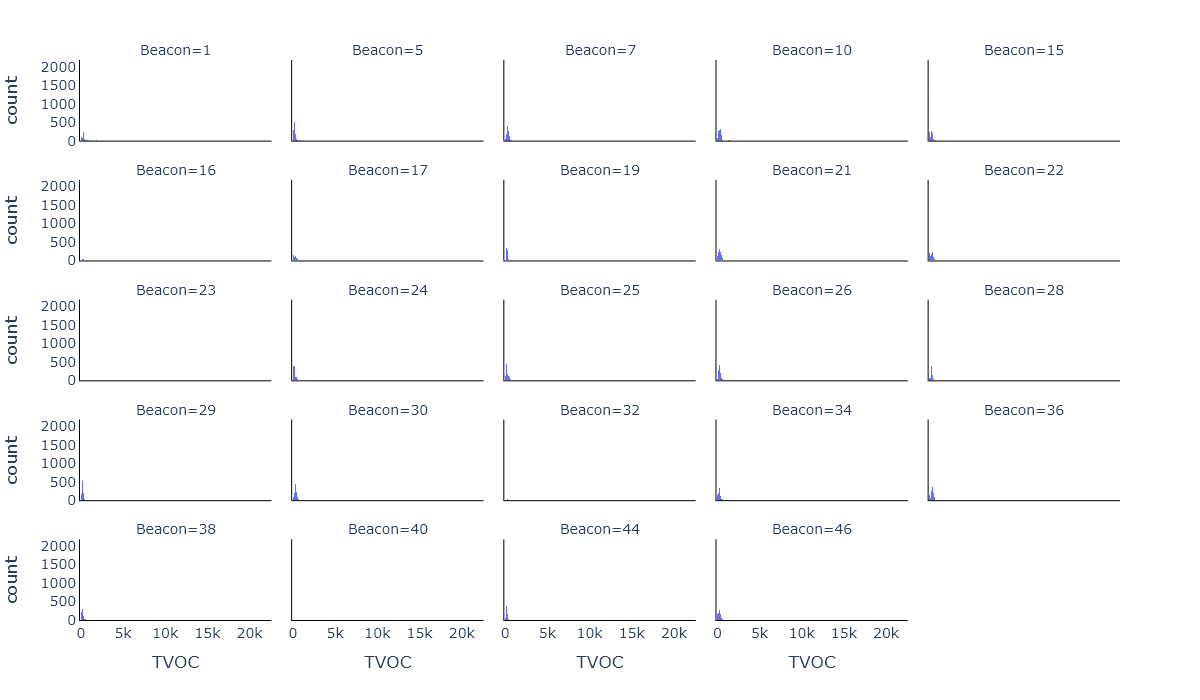

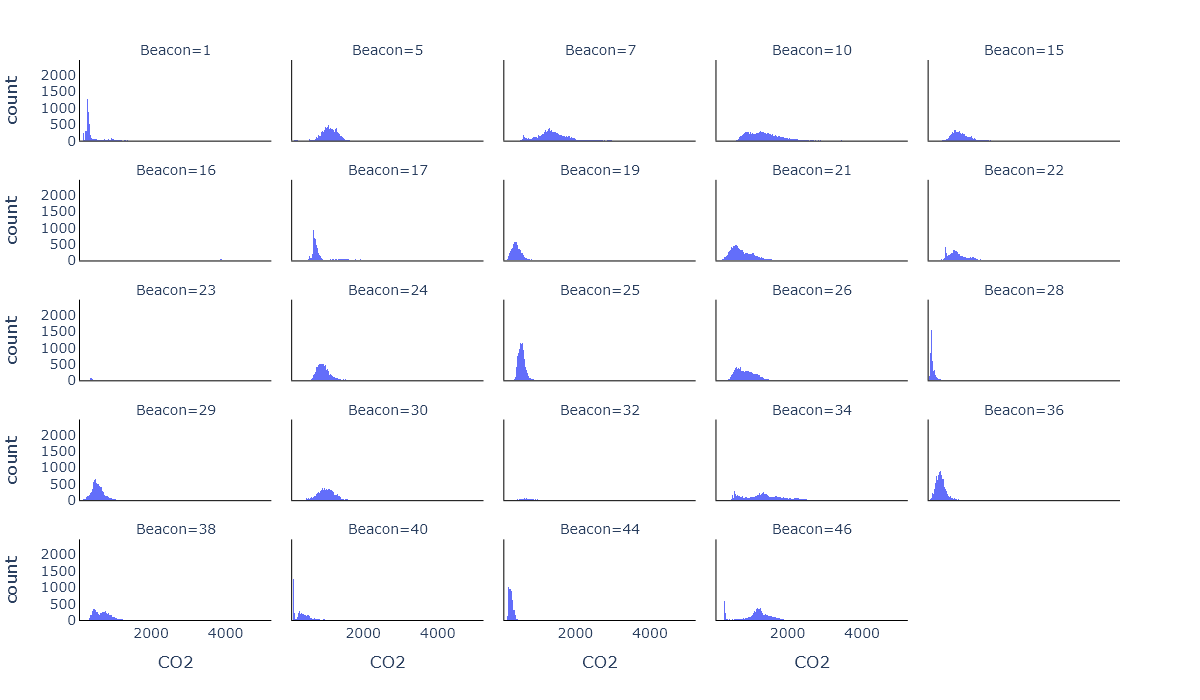

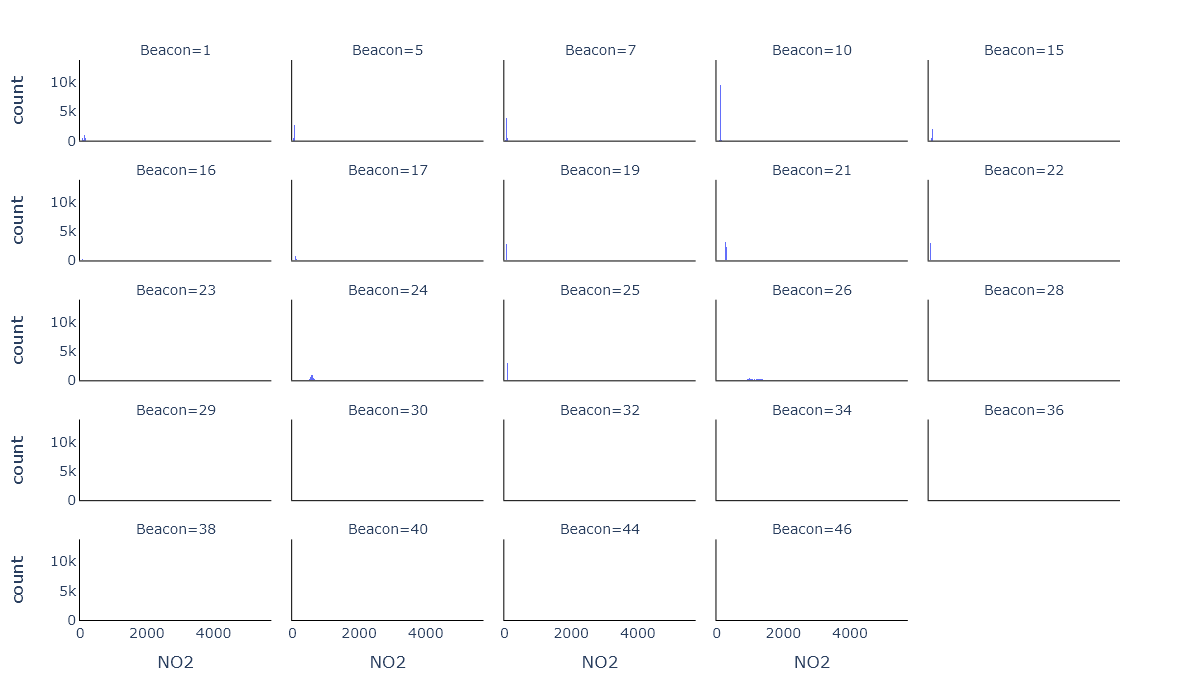

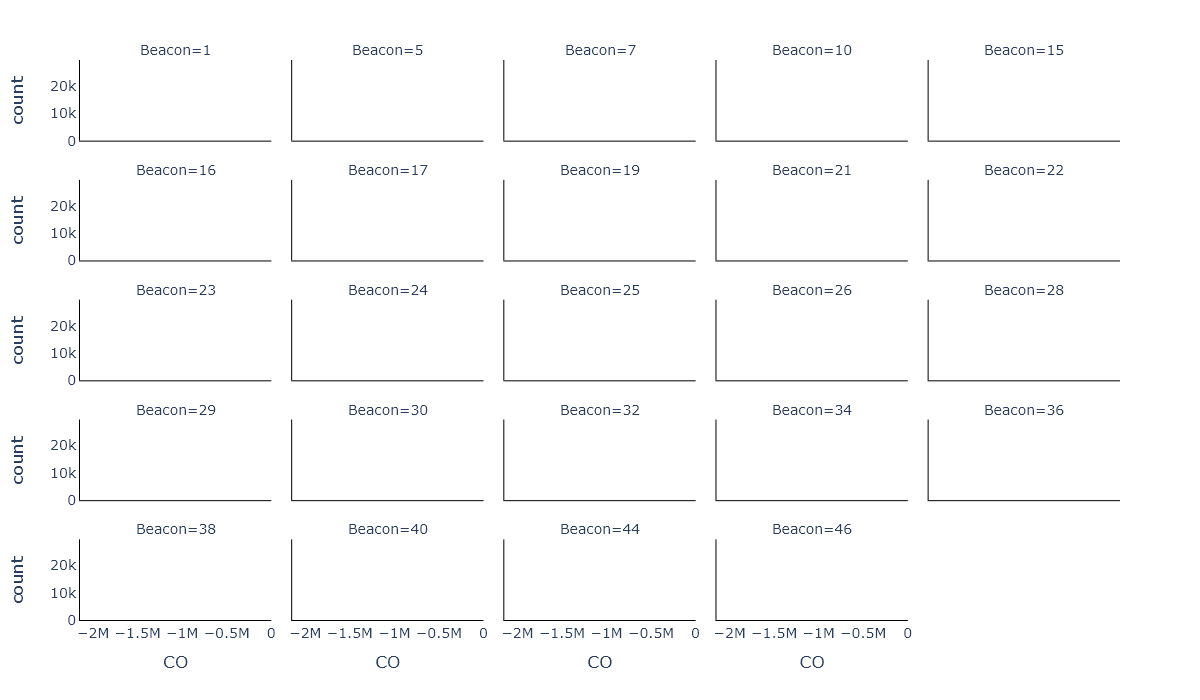

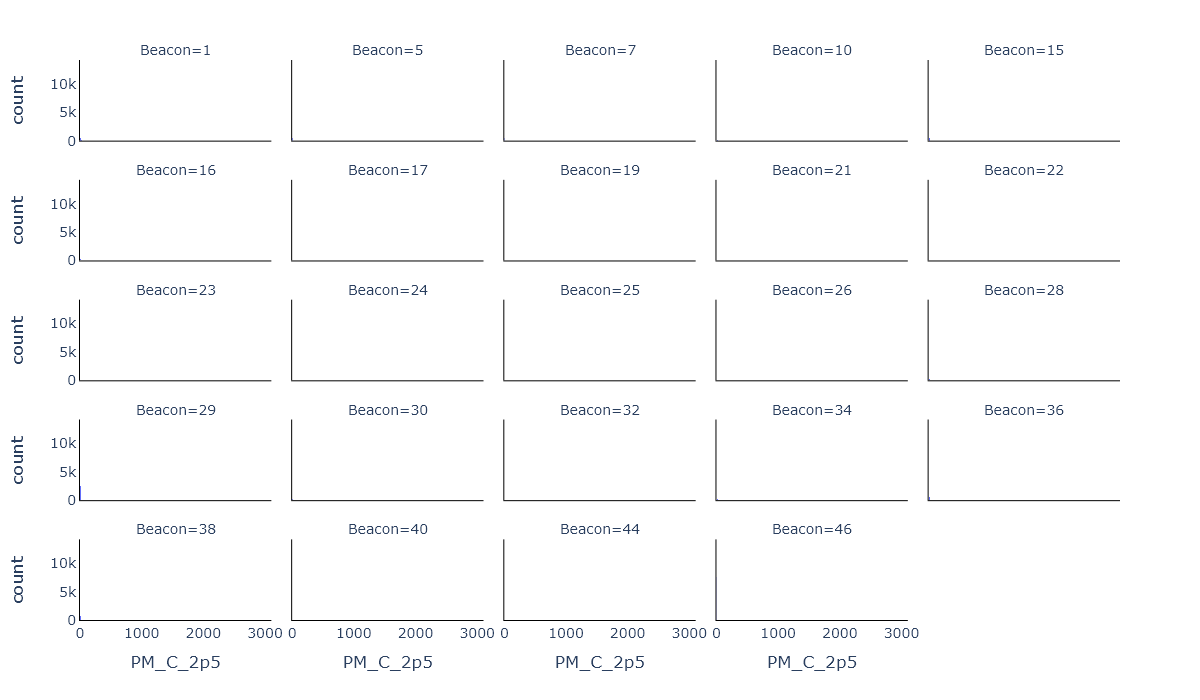

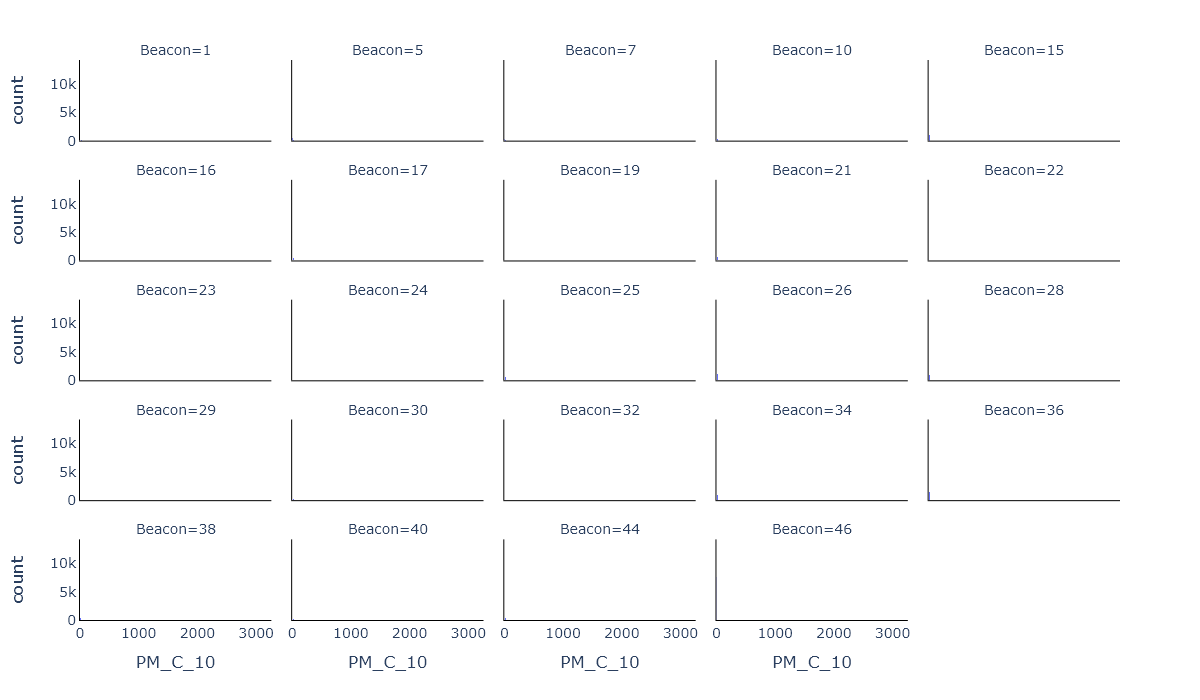

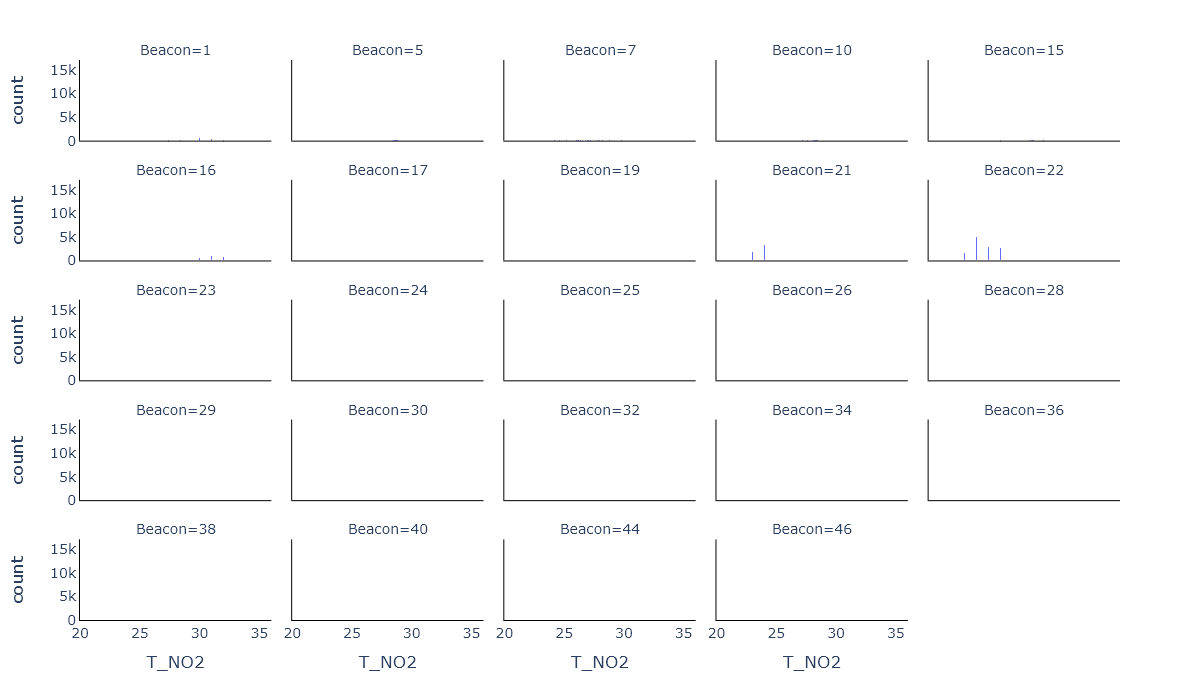

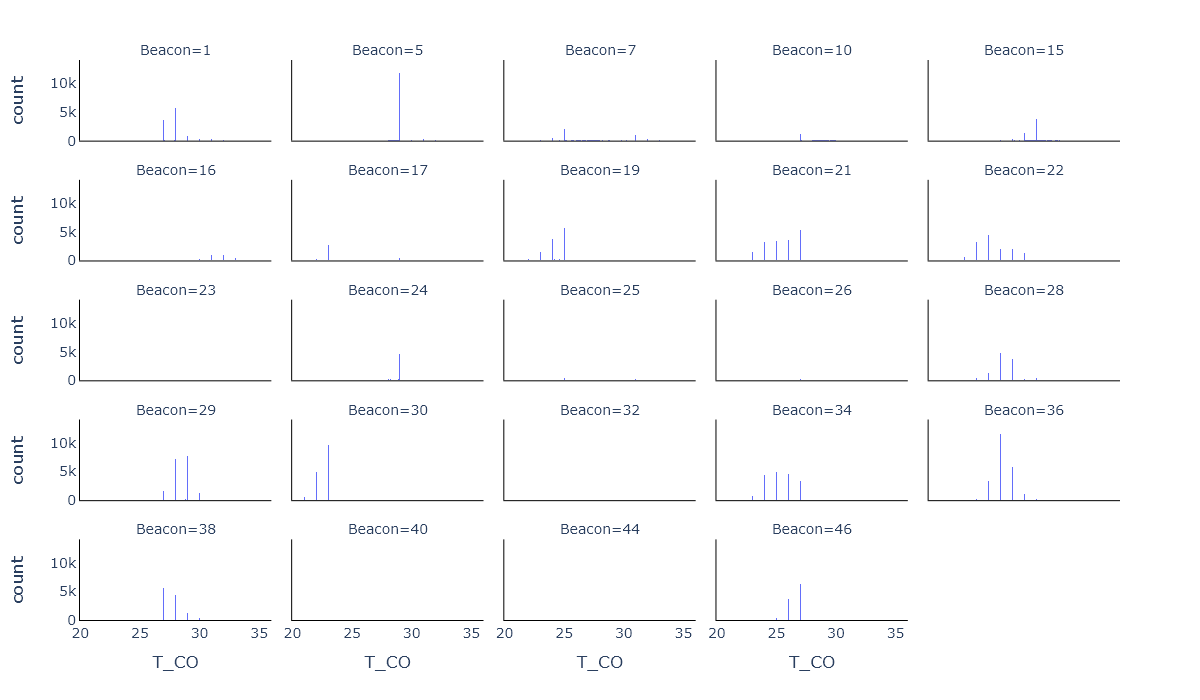

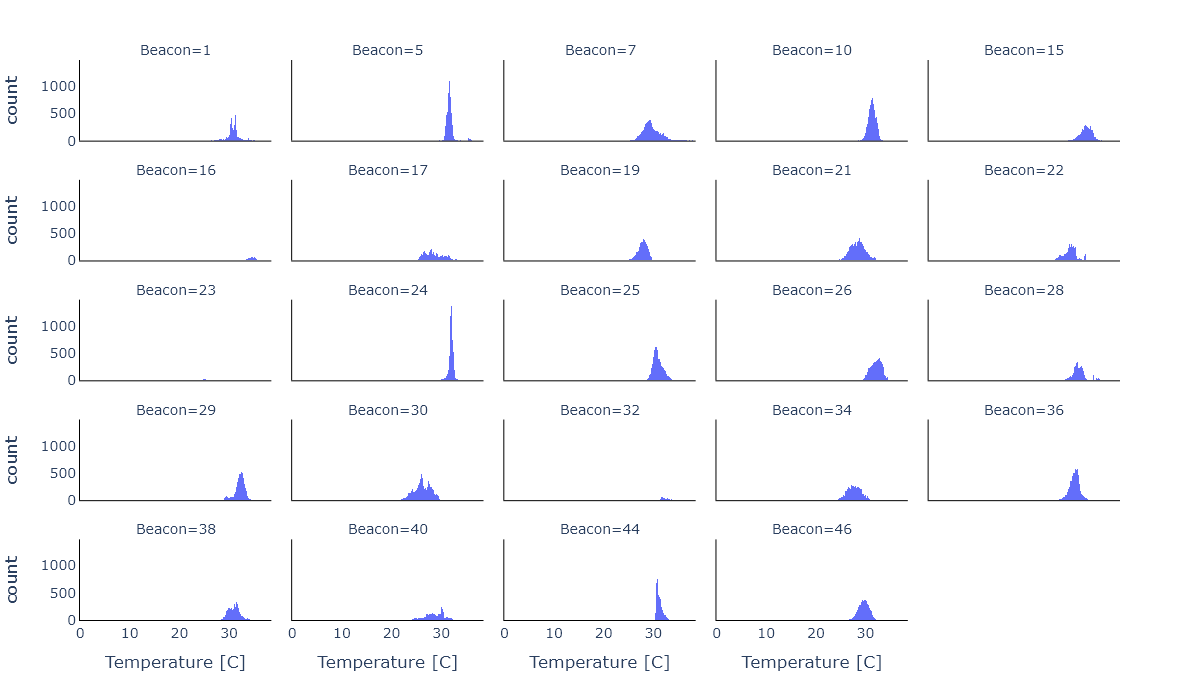

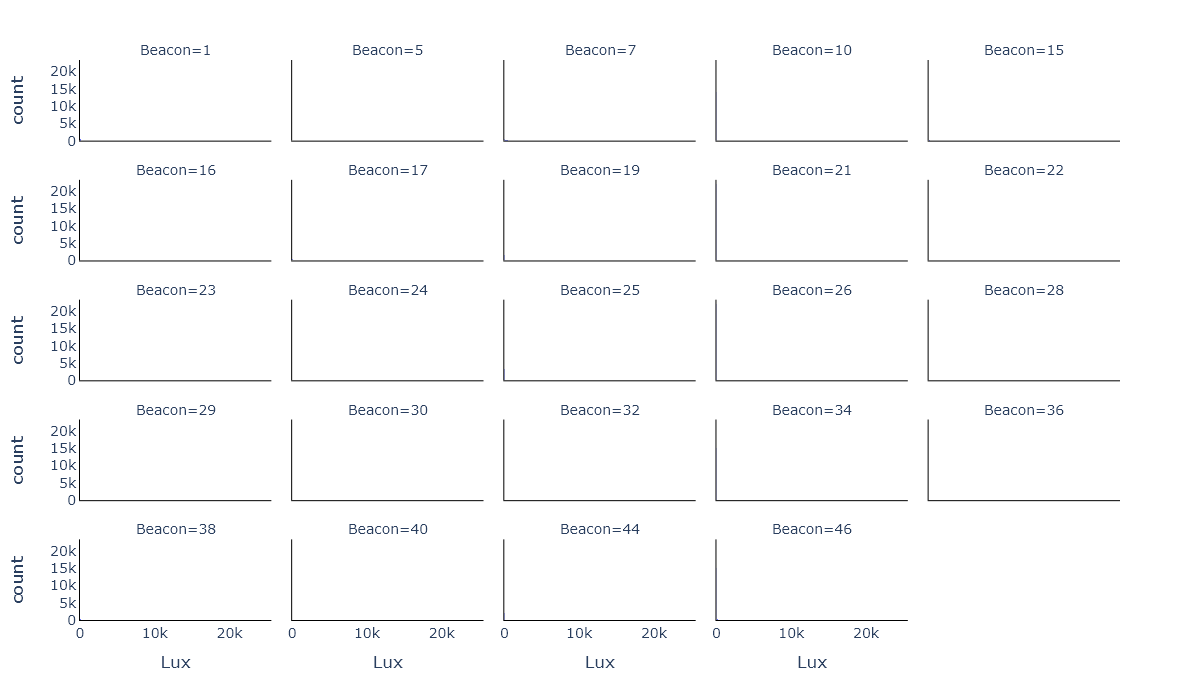

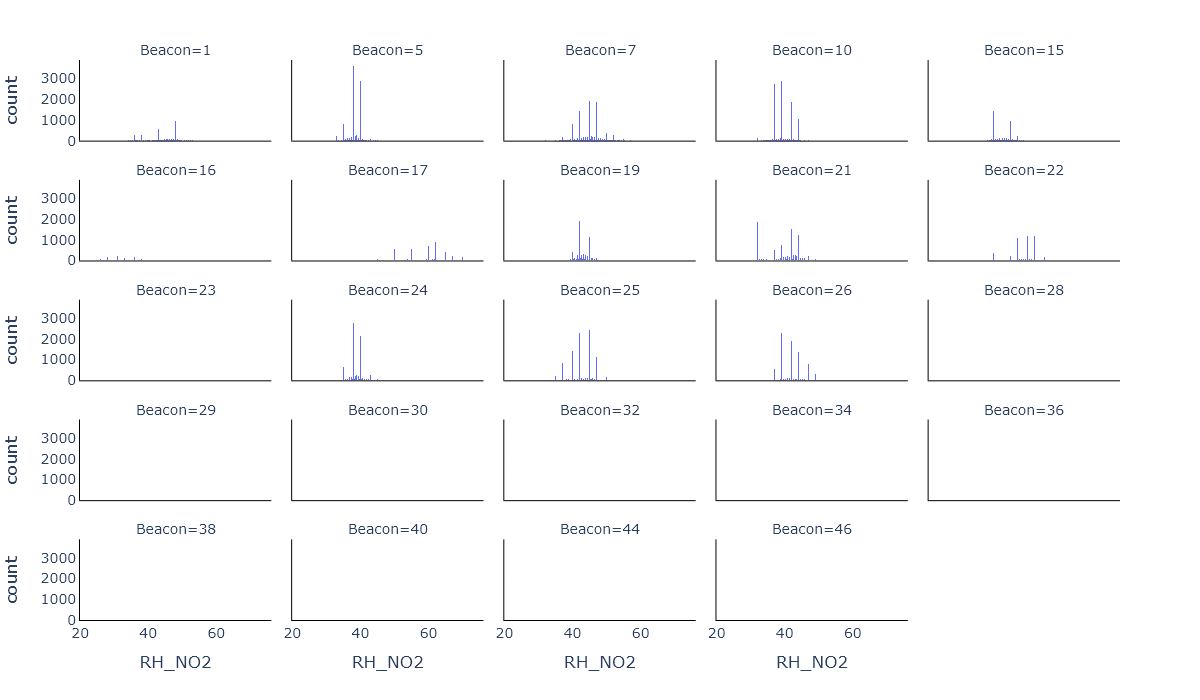

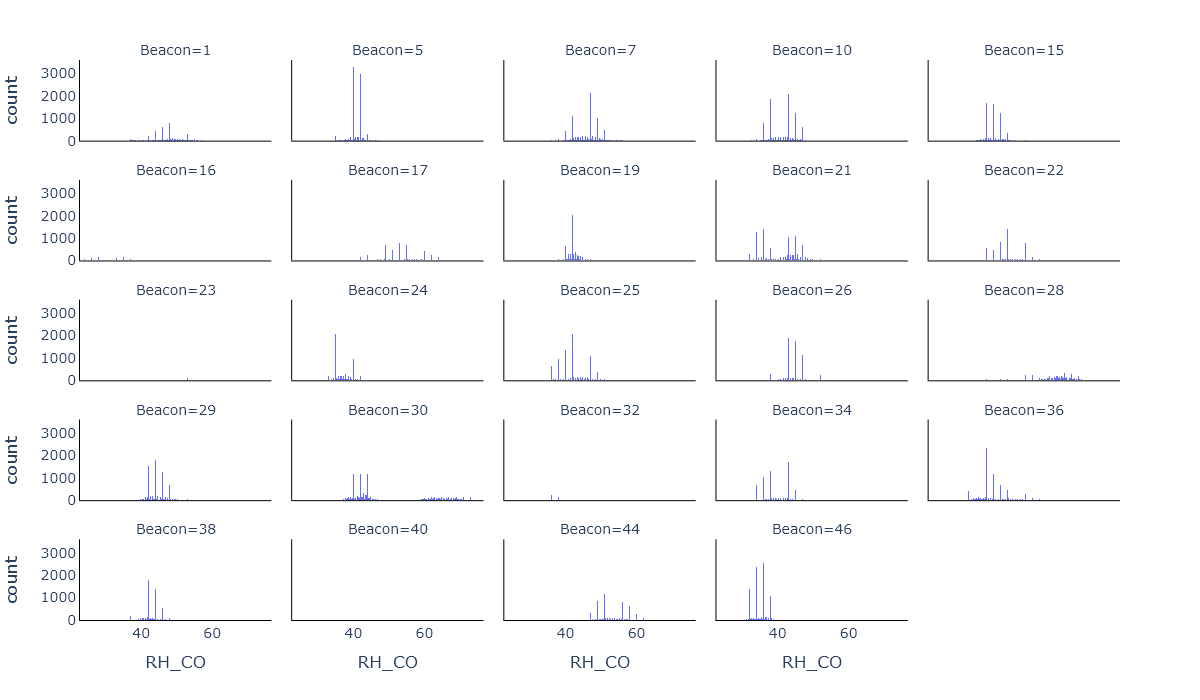

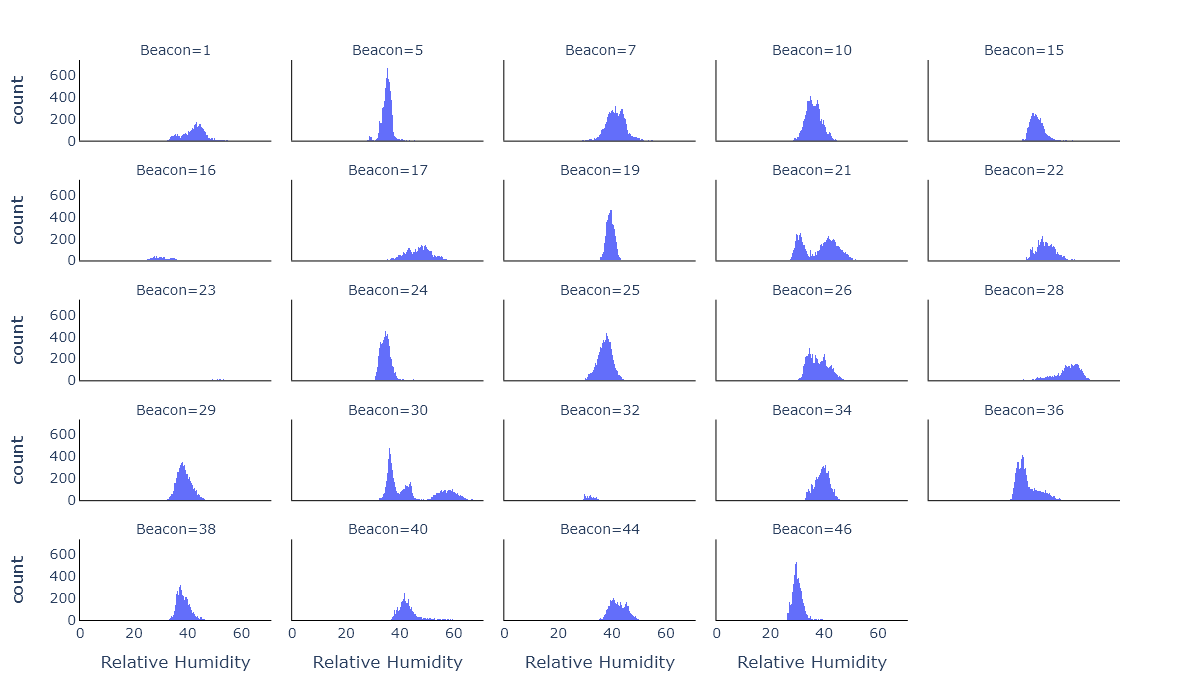

In [15]:
histofacet(data)

## Current Data Cleaning with Z-score of 2.5

In [15]:
cleaned_data = pd.read_parquet('../data/processed/bpeace2-beacon.parquet')
important_cols = ['TVOC','CO2','NO2','CO','PM_C_2p5','PM_C_10','T_NO2','T_CO','Temperature [C]','Lux','RH_NO2','RH_CO','Relative Humidity','Beacon']
data = pd.read_parquet('../data/processed/bpeace2-beacon_with_extreme.parquet')
data = data[important_cols]
data.head(5)

TVOC         CO2    NO2       CO   PM_C_2p5    PM_C_10  \
Timestamp                                                                       
2020-06-08 00:00:00  537.88  530.235090  74.64 -0.68488  11.135812  16.892285   
2020-06-08 00:05:00  537.70  516.750315  75.85 -0.52275   8.442126  12.512238   
2020-06-08 00:10:00  537.64  509.967039  76.56 -0.78328   7.951792  11.243390   
2020-06-08 00:15:00  542.40  493.069968  74.52 -0.83856   9.946487  14.445220   
2020-06-08 00:20:00  541.04  478.463197  74.92 -0.48872   9.970680  14.957063   

                     T_NO2  T_CO  Temperature [C]  Lux  RH_NO2  RH_CO  \
Timestamp                                                               
2020-06-08 00:00:00   28.0  28.0        30.514336  0.0   36.80  39.32   
2020-06-08 00:05:00   28.0  28.0        30.652443  0.0   37.00  40.00   
2020-06-08 00:10:00   28.0  28.0        30.757097  0.0   37.00  39.72   
2020-06-08 00:15:00   28.0  28.0        30.636314  0.0   36.28  39.00   
2020-06-08 00:20:00   28.0  28.0        30.581627  0.0   36.40  39.20   

                     Relative Humidity  Beacon  
Timestamp                                       
2020-06-08 00:00:00          35.203064       1  
2020-06-08 00:05:00          35.344177       1  
2020-06-08 00:10:00          35.270462       1  
2020-06-08 00:15:00          35.064514       1  
2020-06-08 00:20:00          35.020203       1

### Timeseries

TVOC


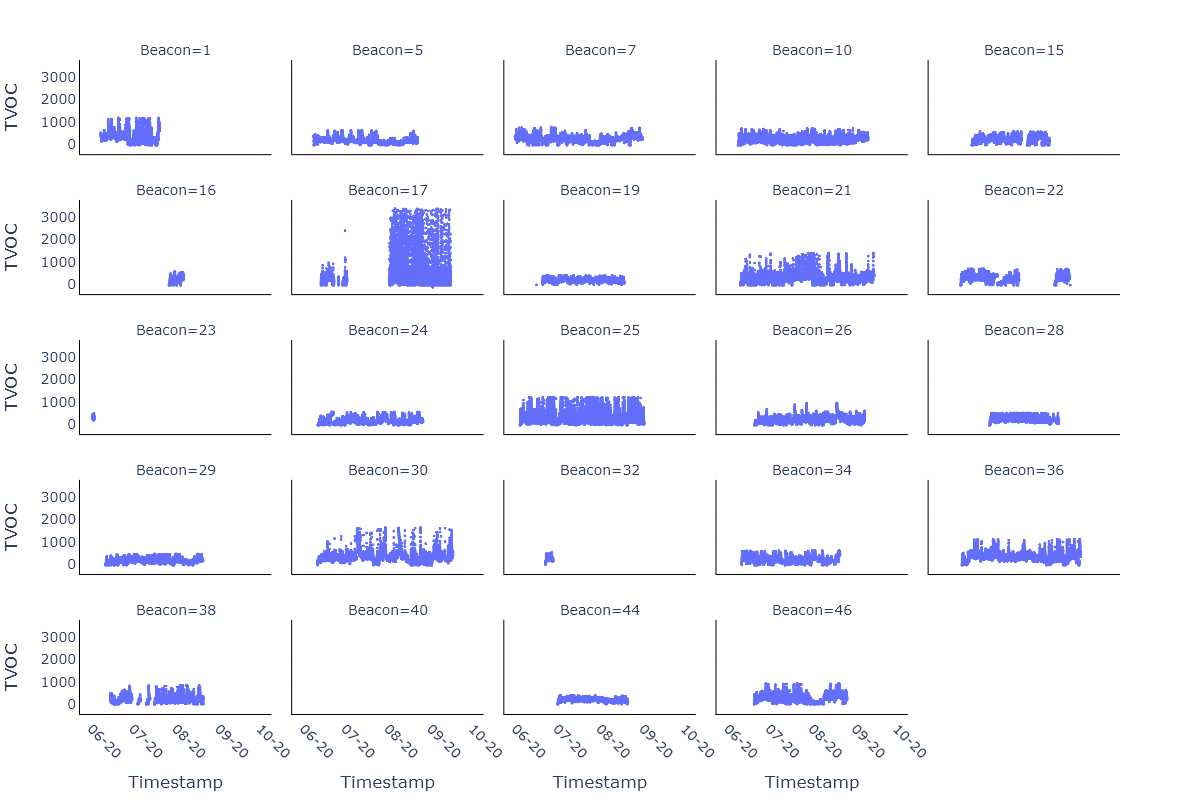

CO2


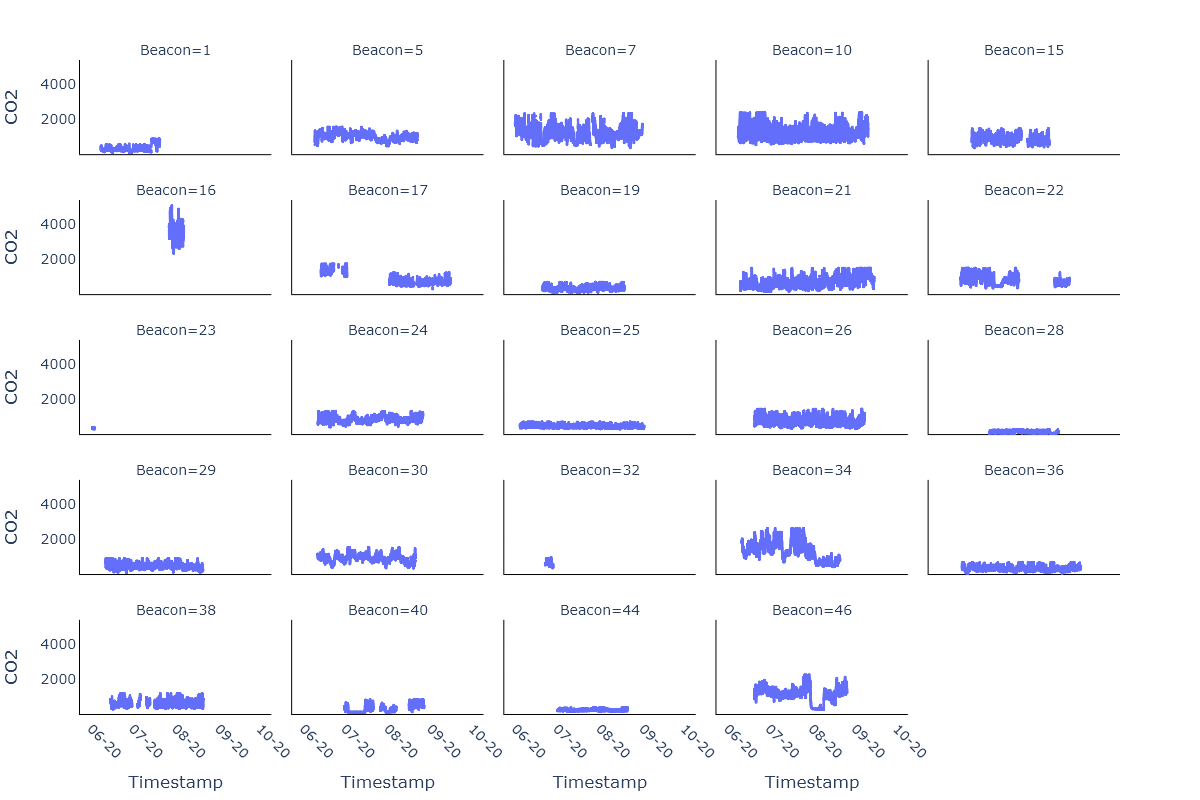

NO2


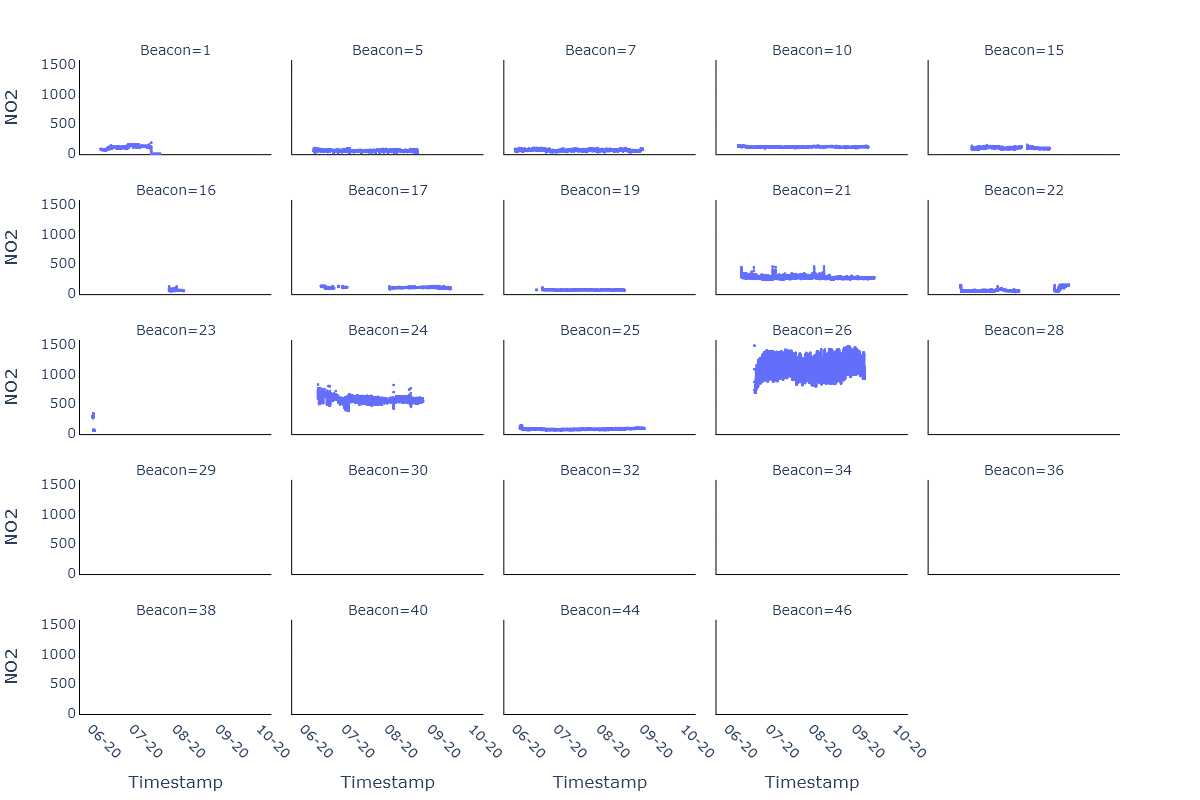

CO


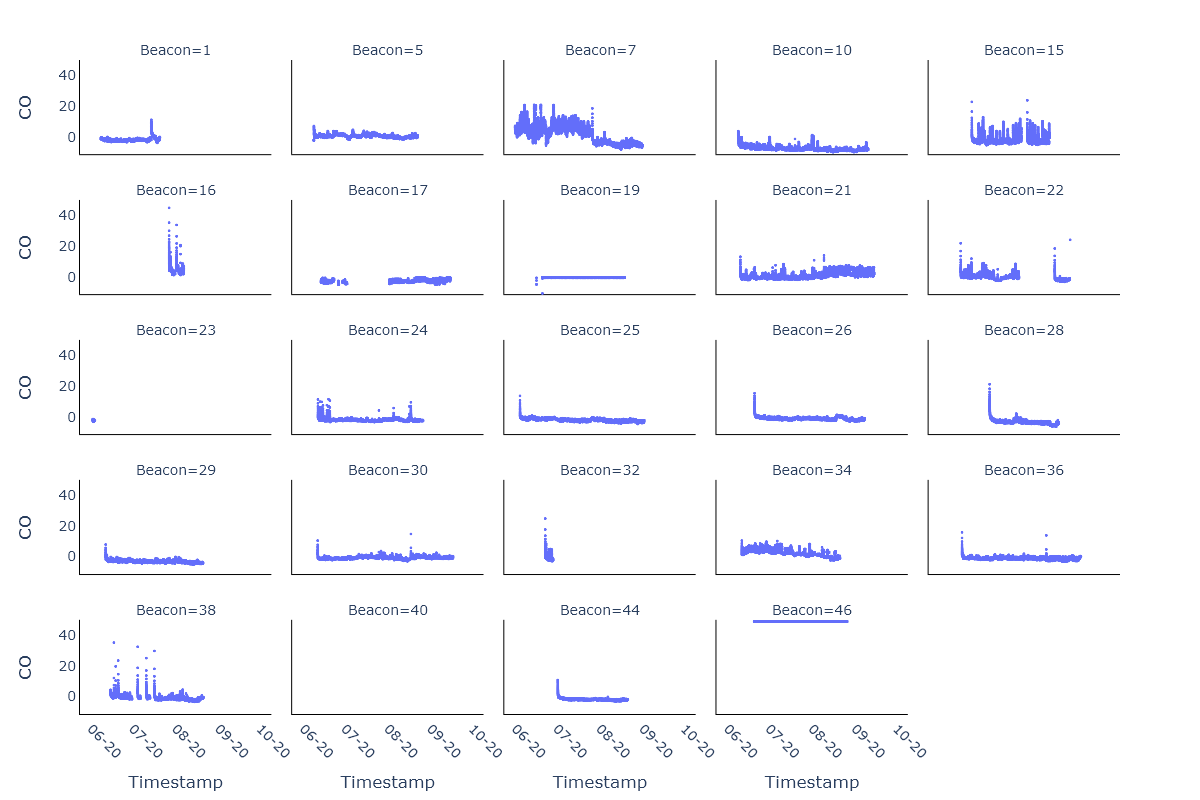

PM_C_2p5


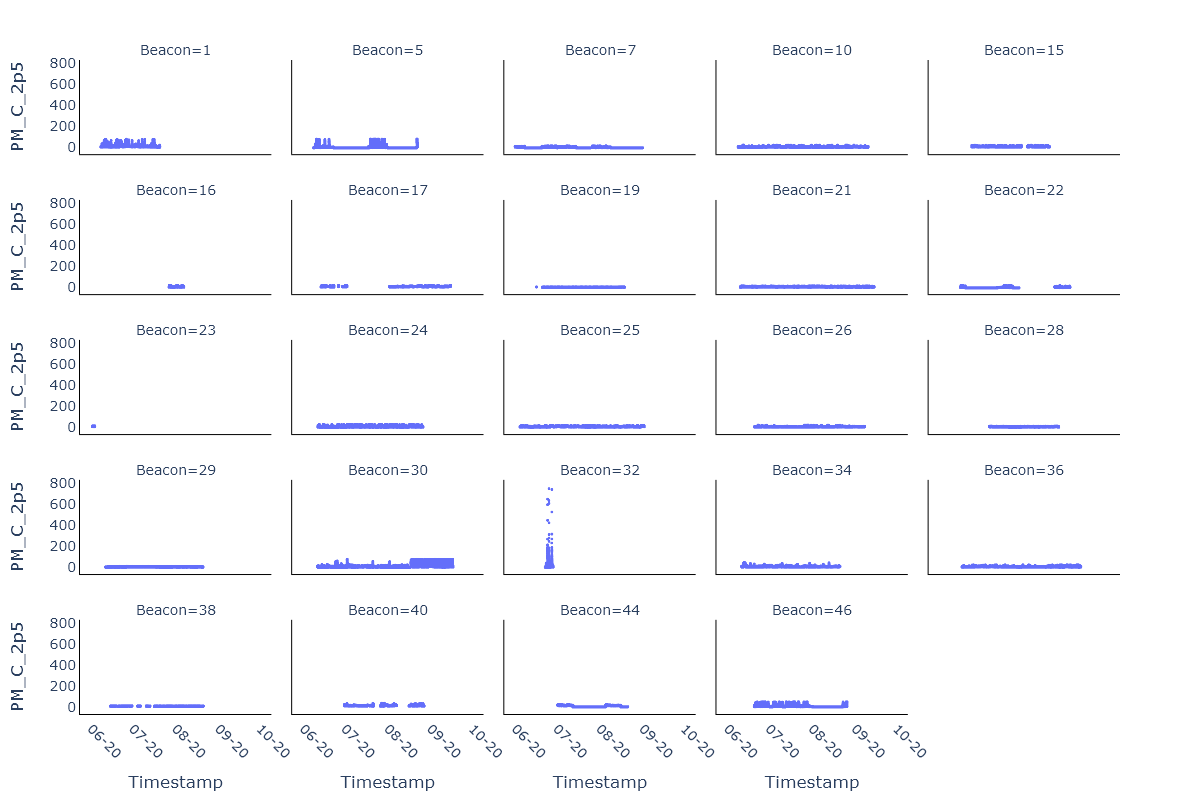

PM_C_10


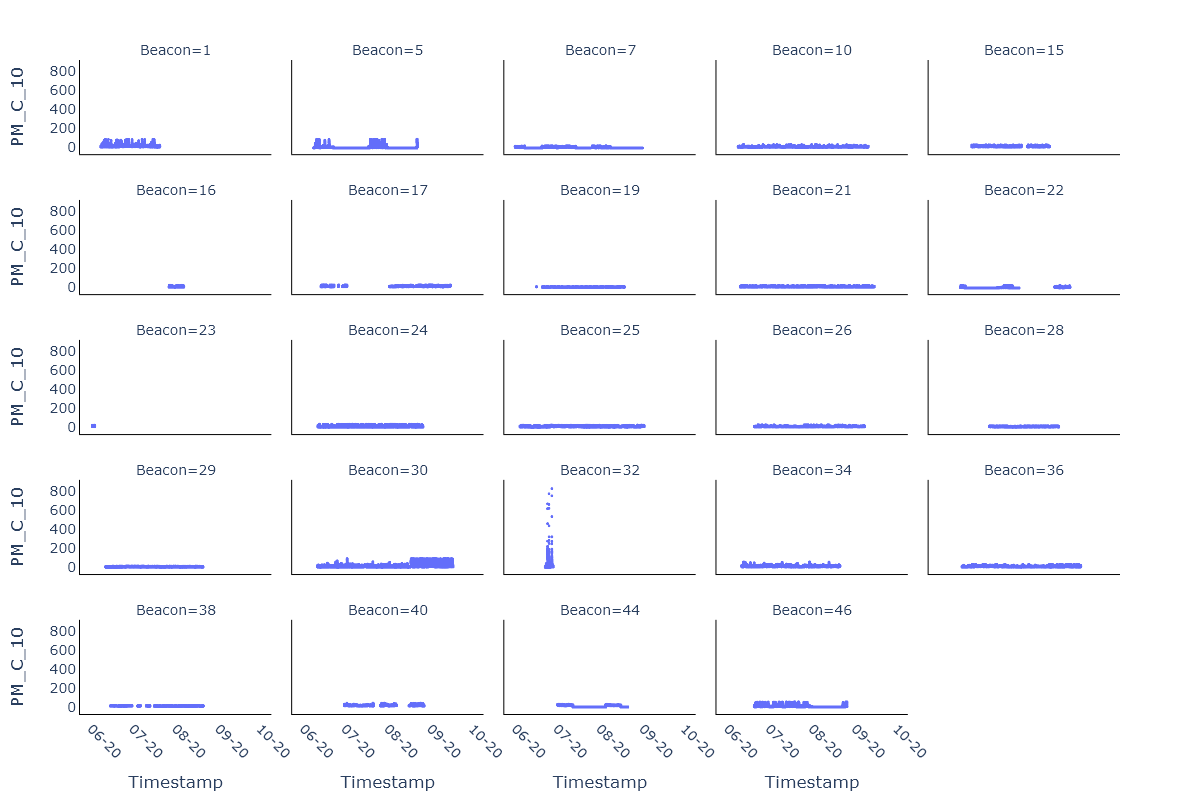

T_NO2


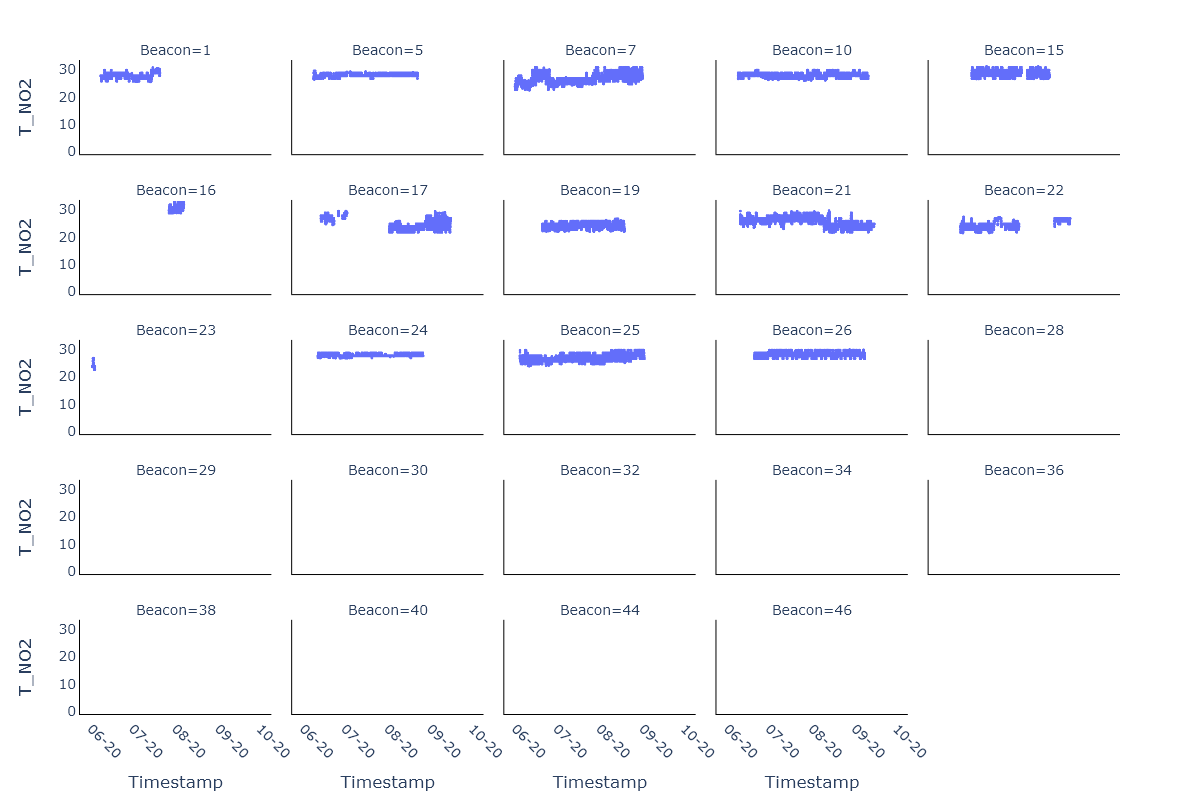

T_CO


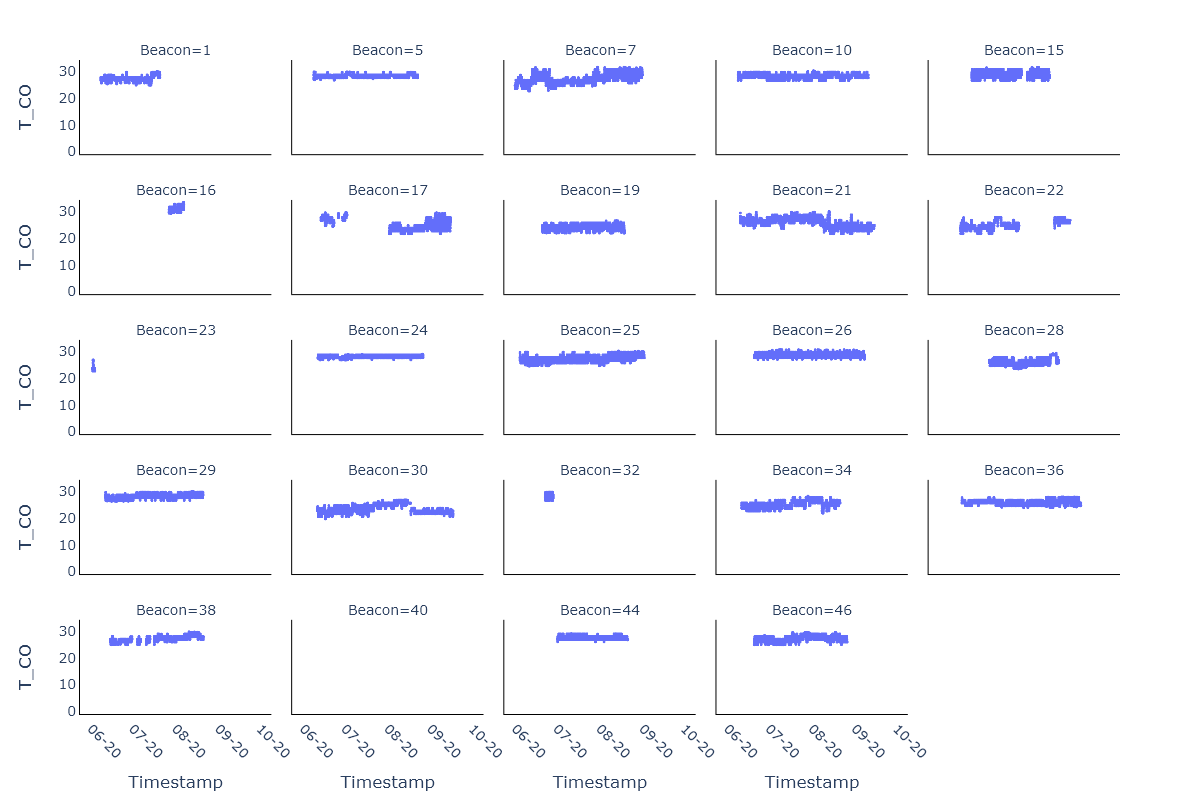

Temperature [C]


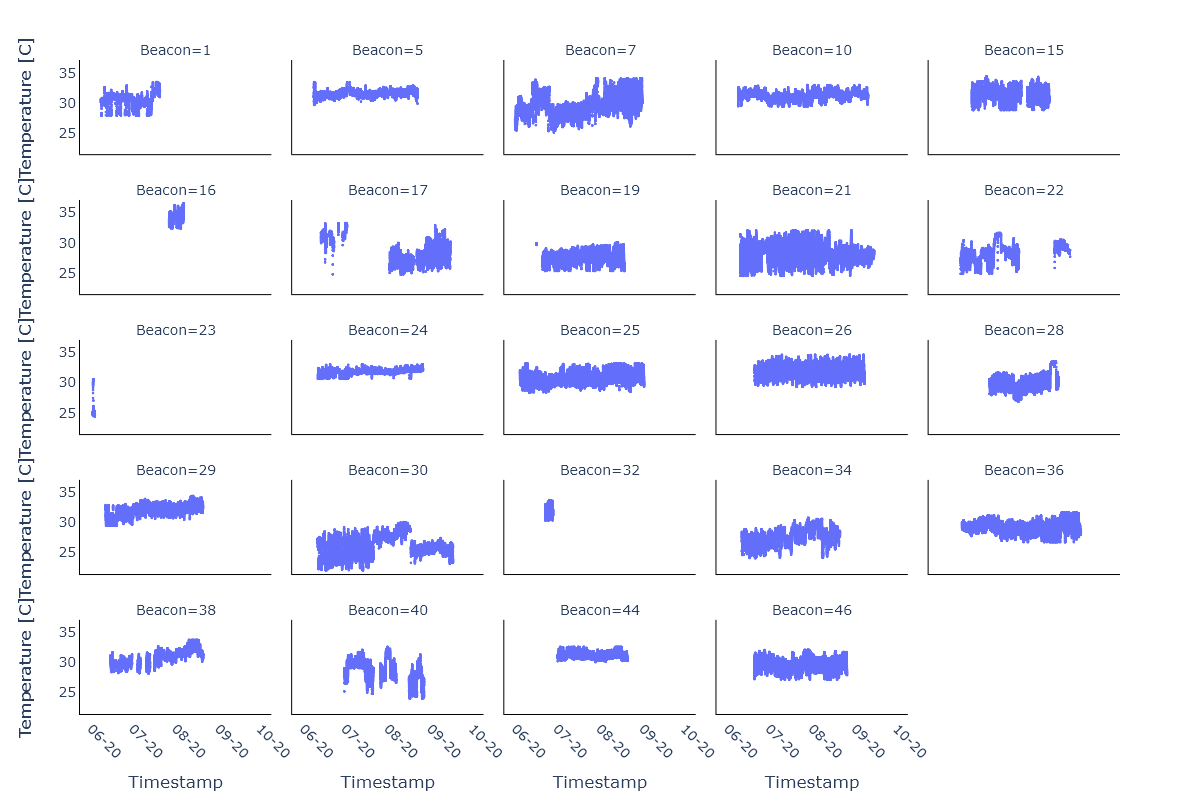

Lux


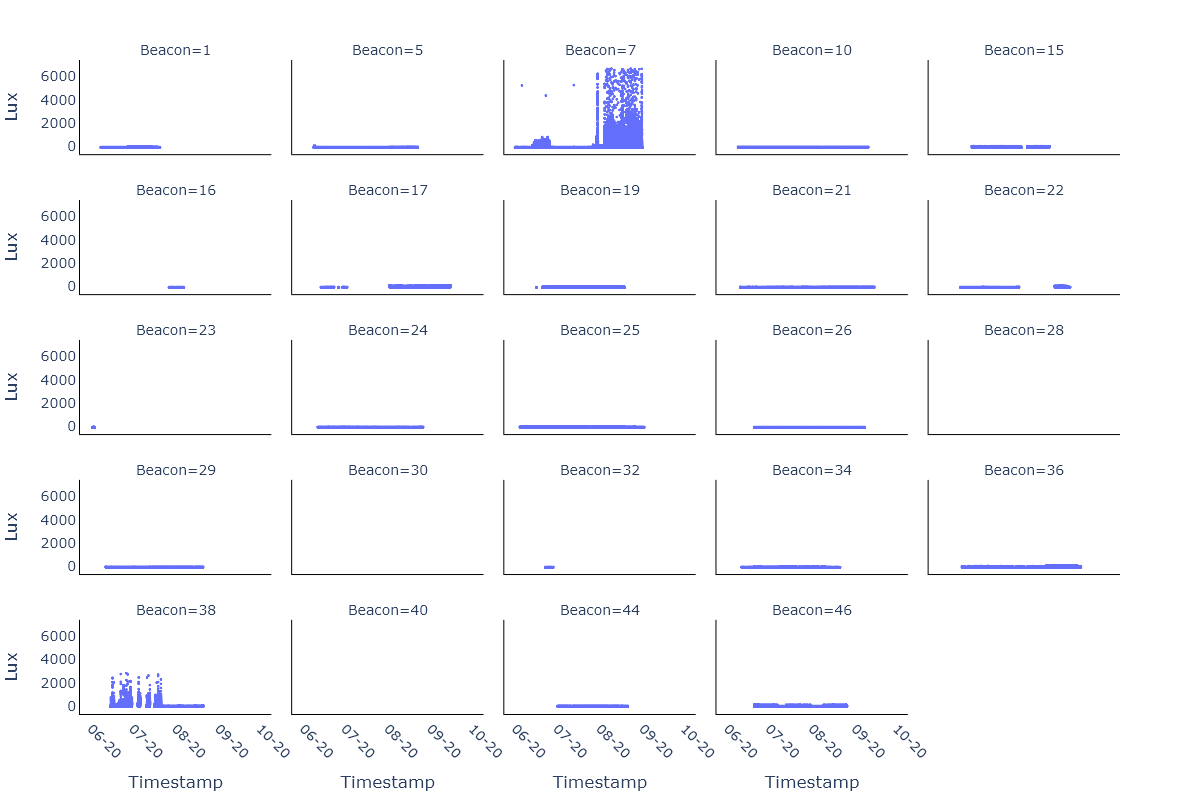

RH_NO2


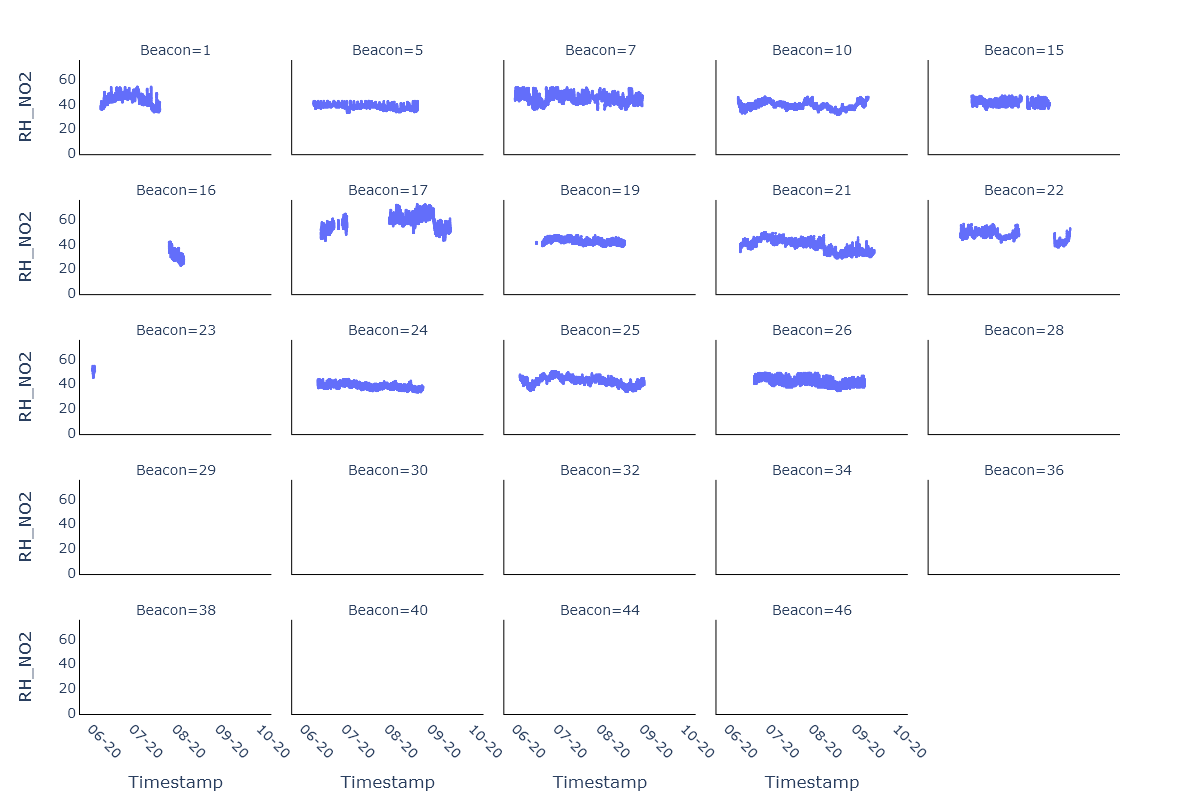

RH_CO


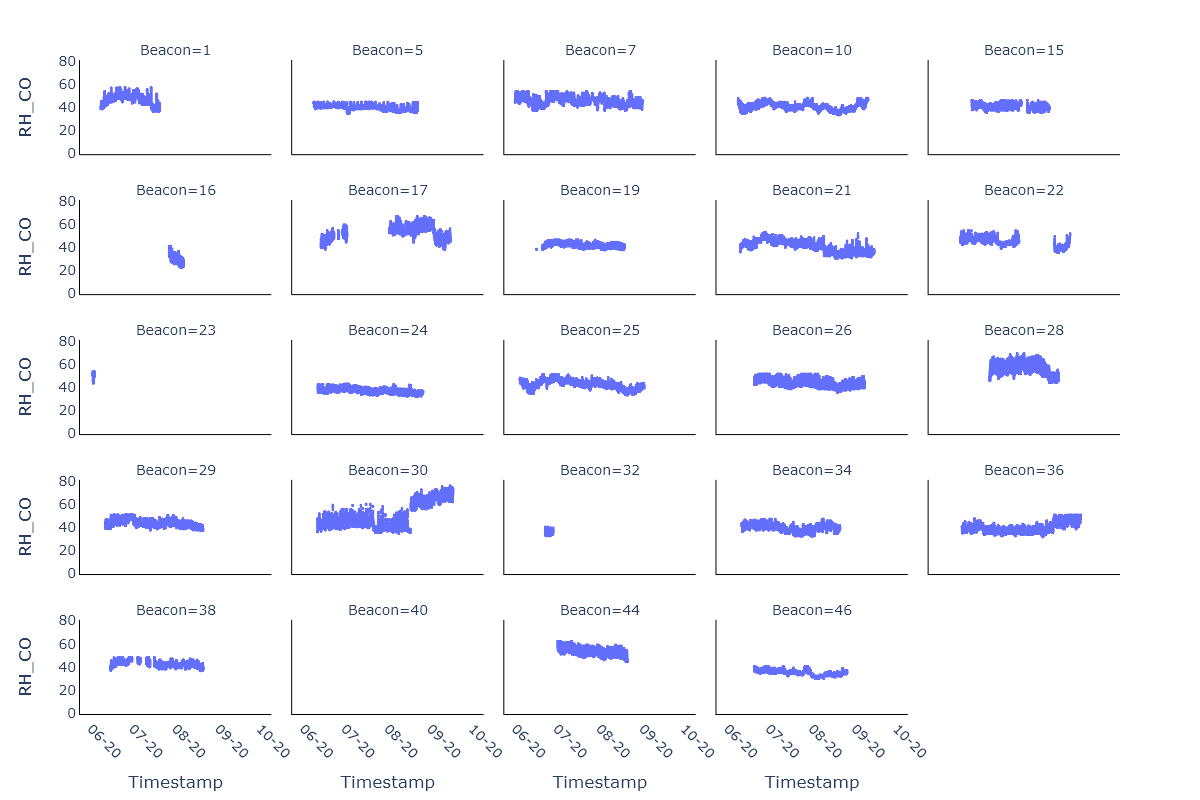

Relative Humidity


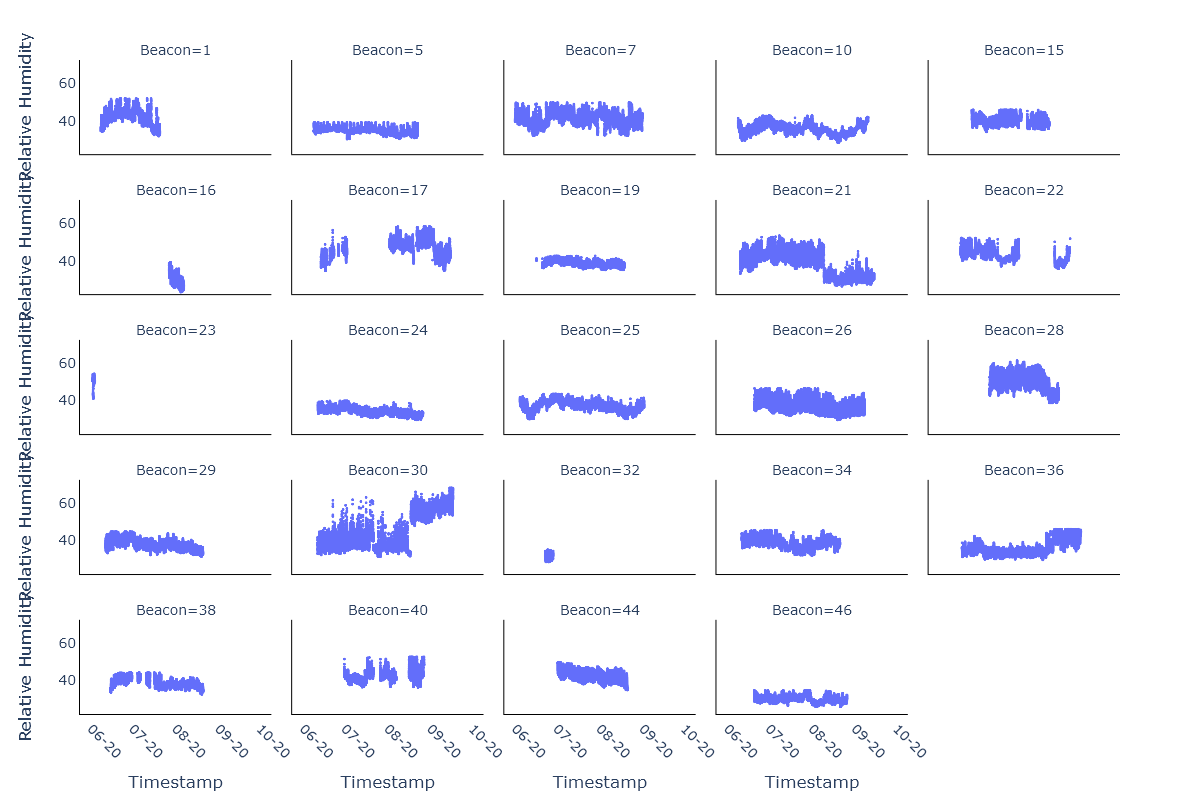

In [25]:
timefacet(cleaned_data)

### Histogram

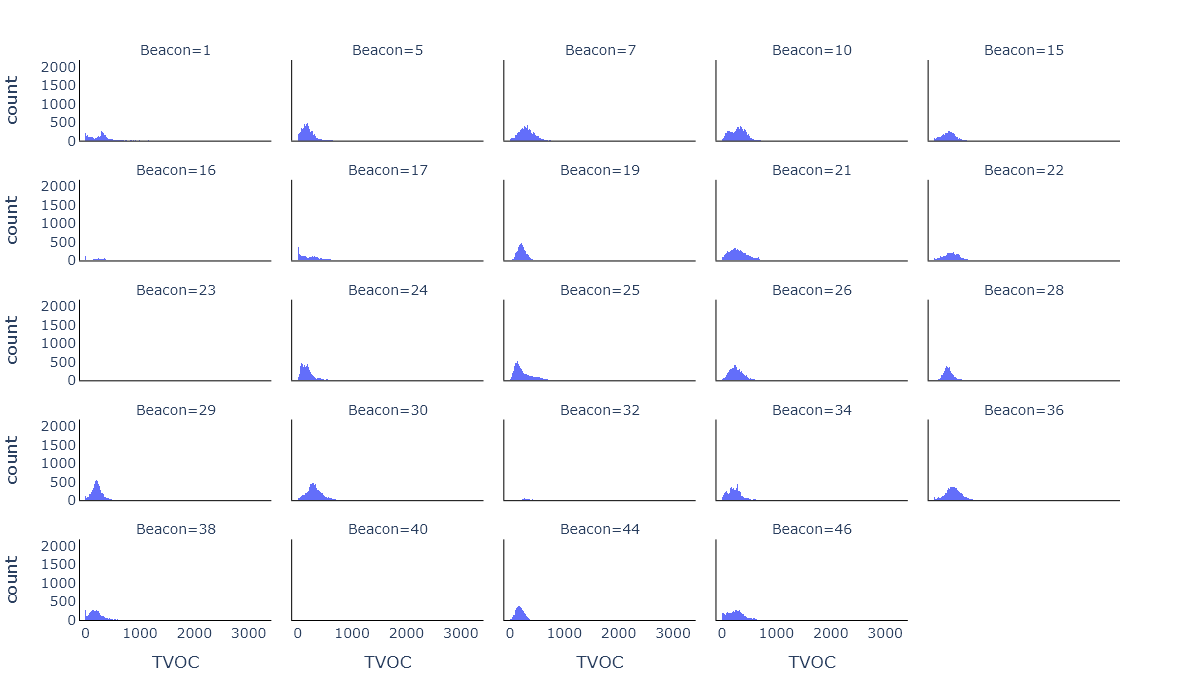

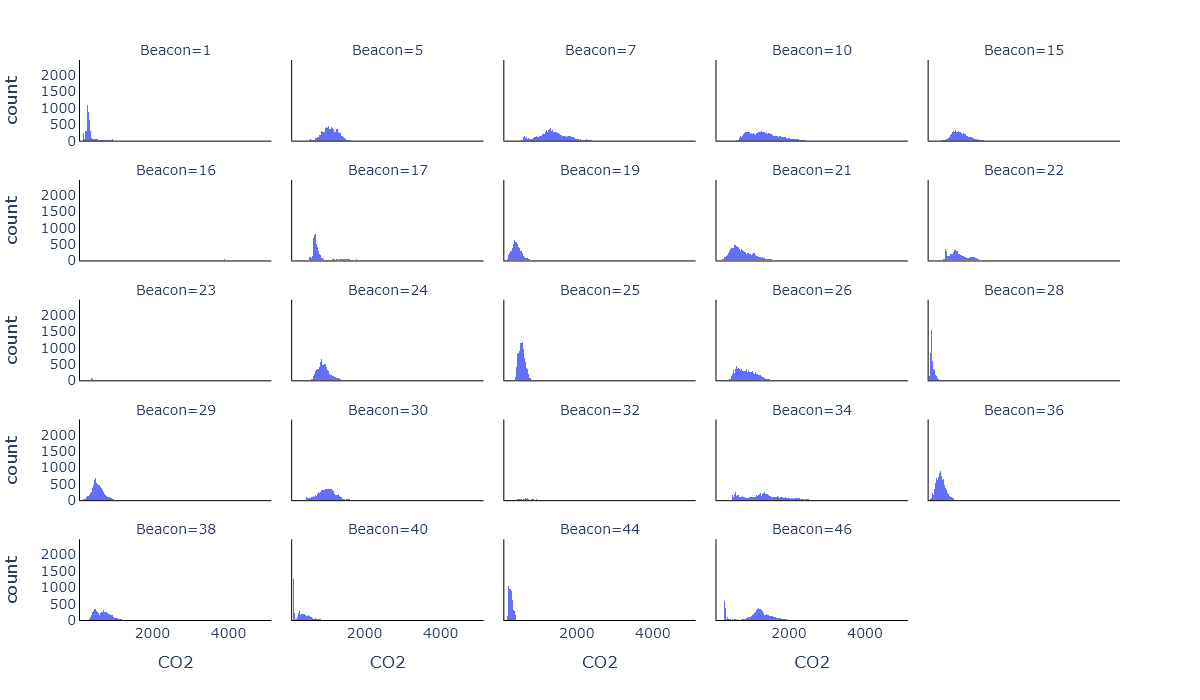

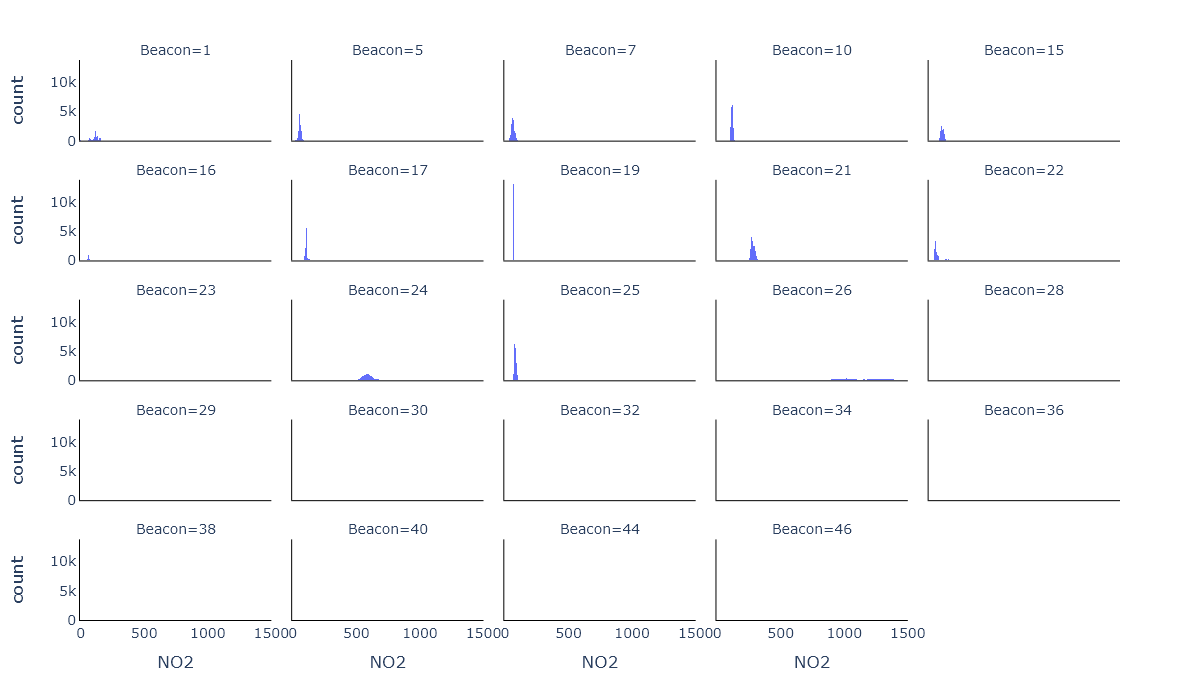

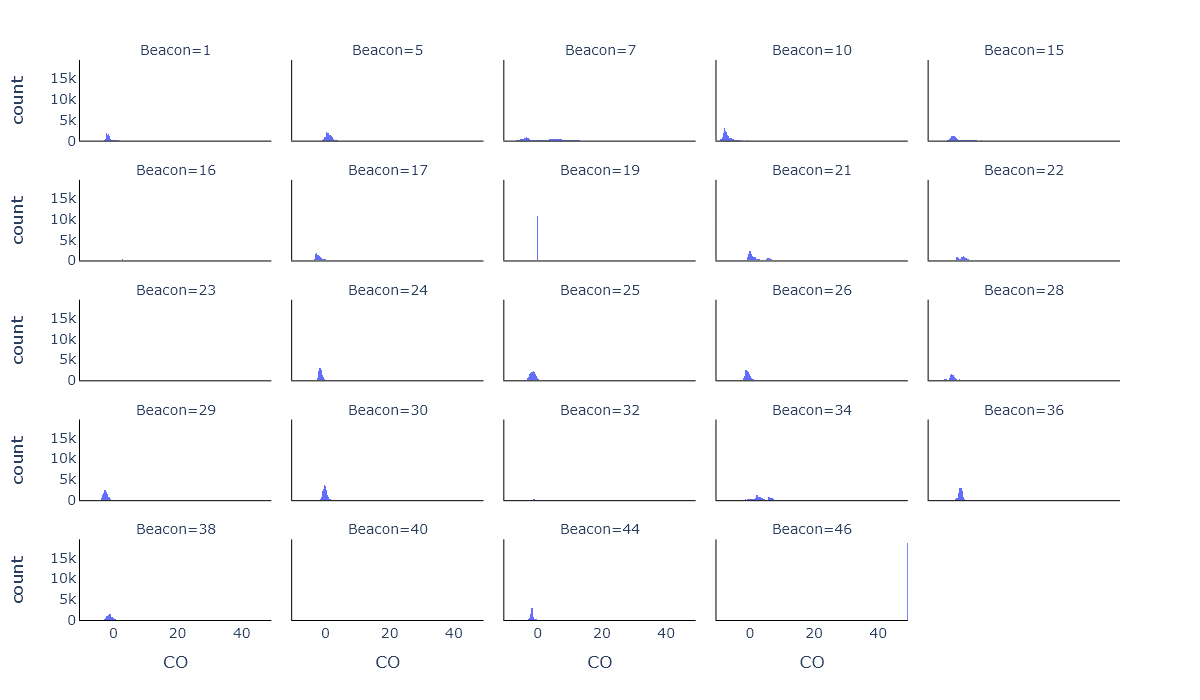

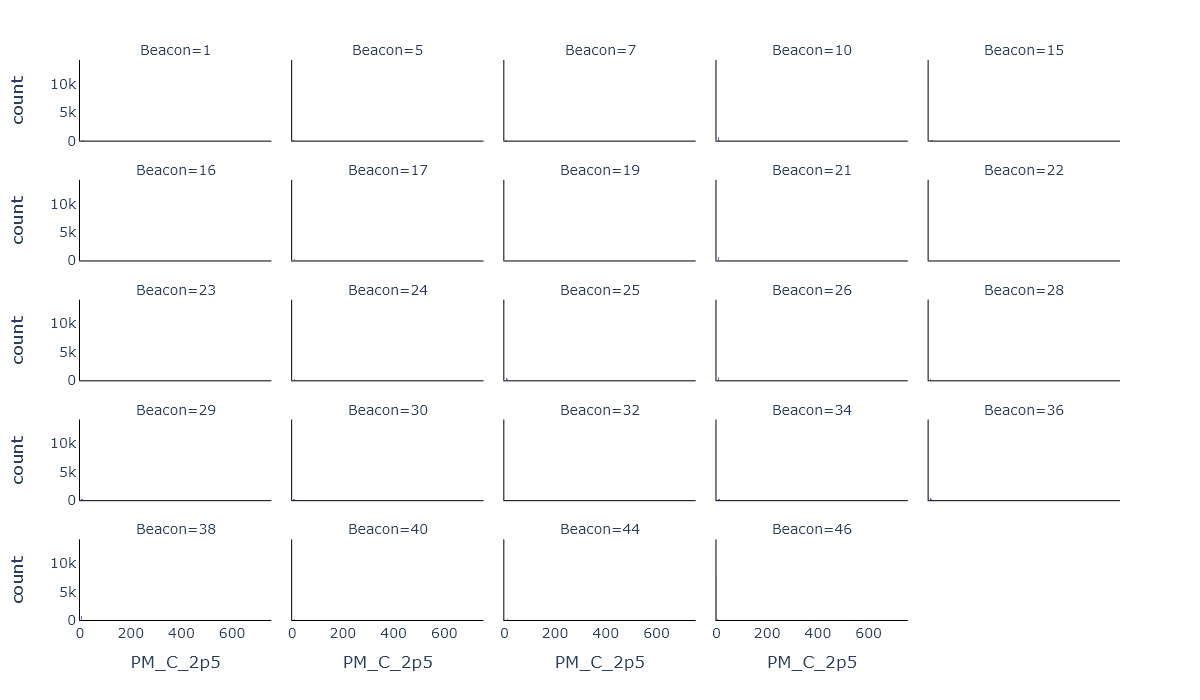

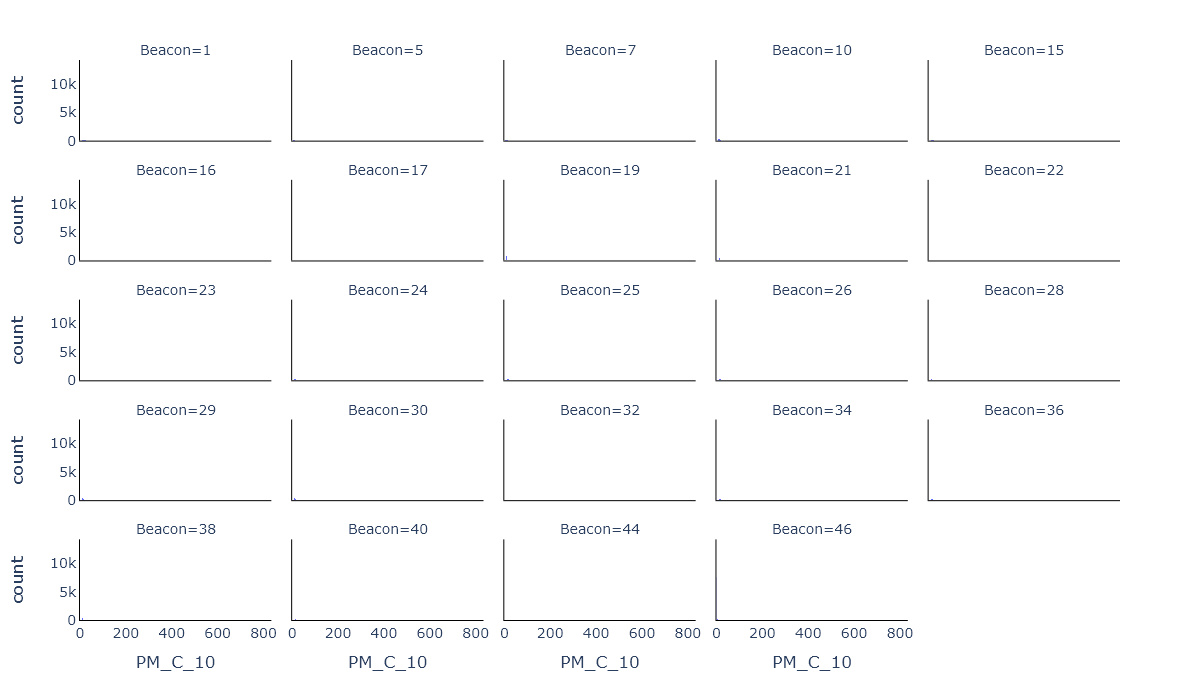

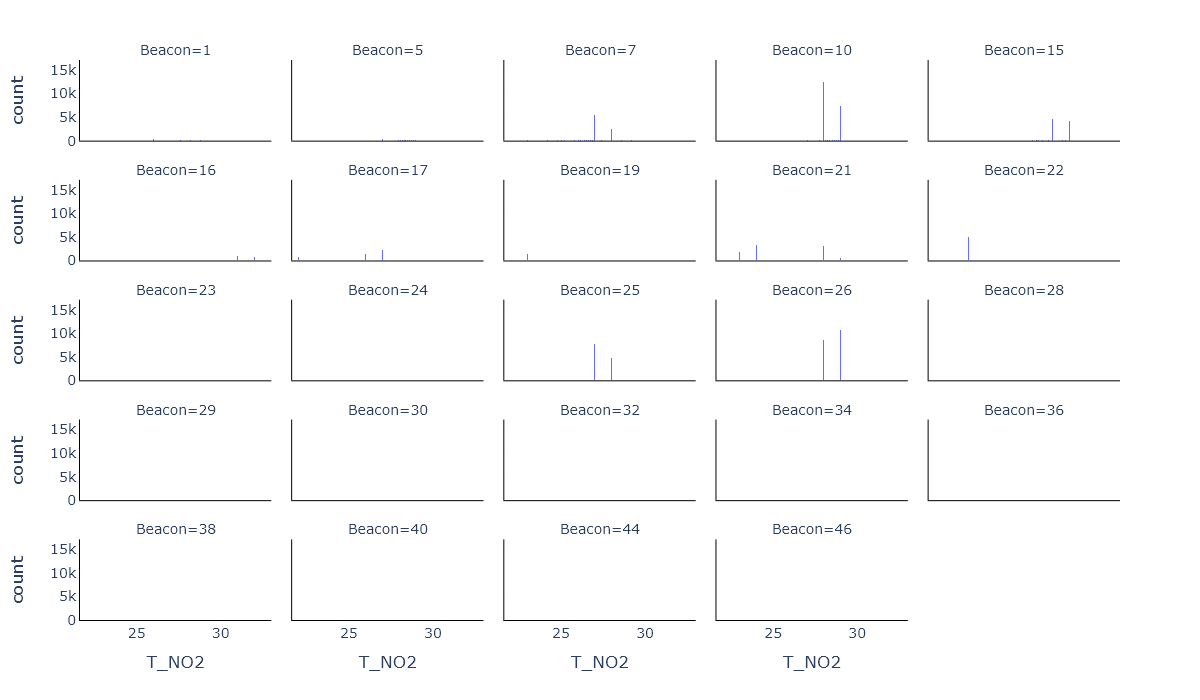

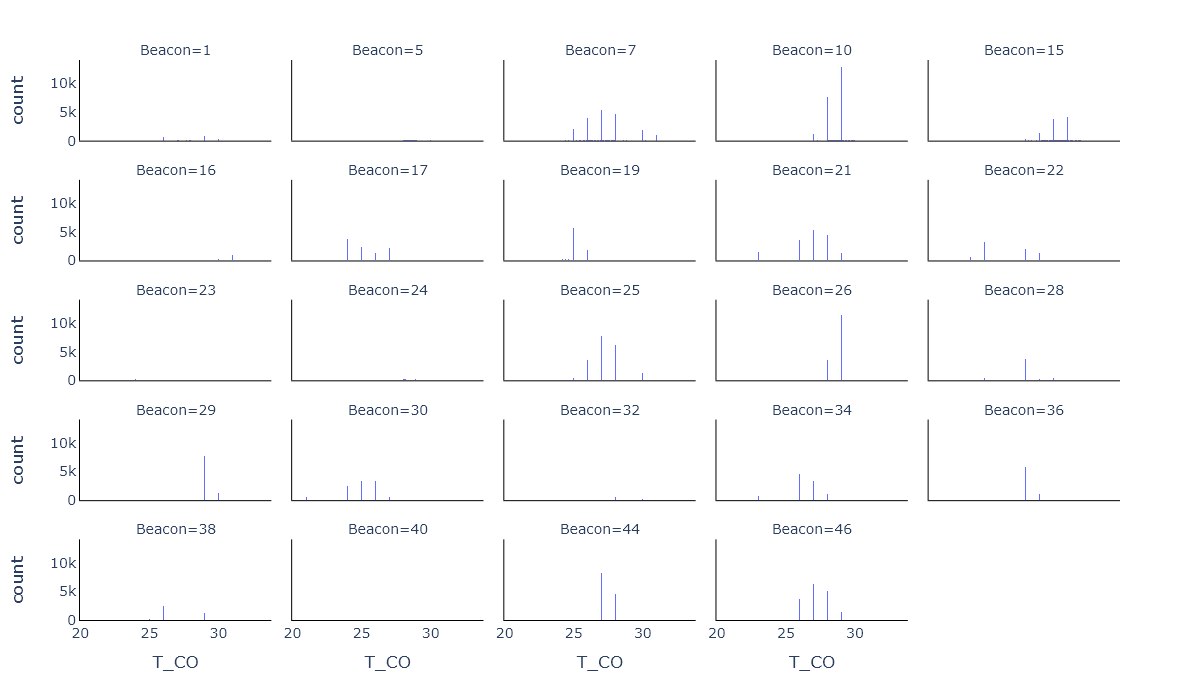

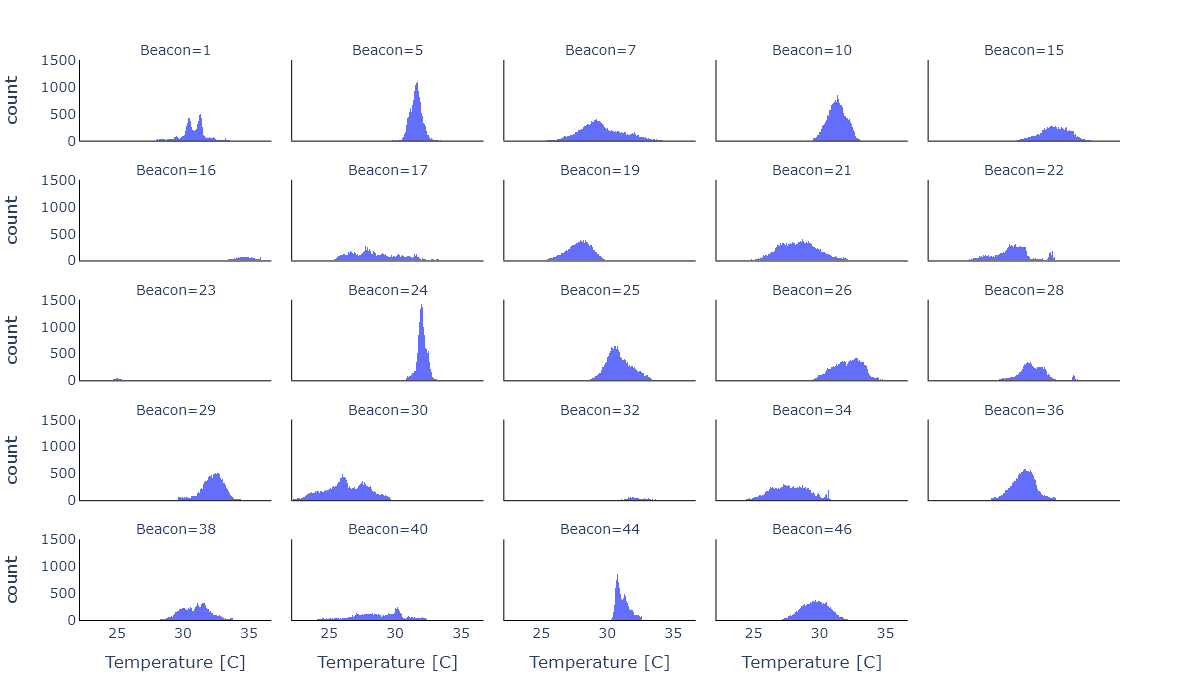

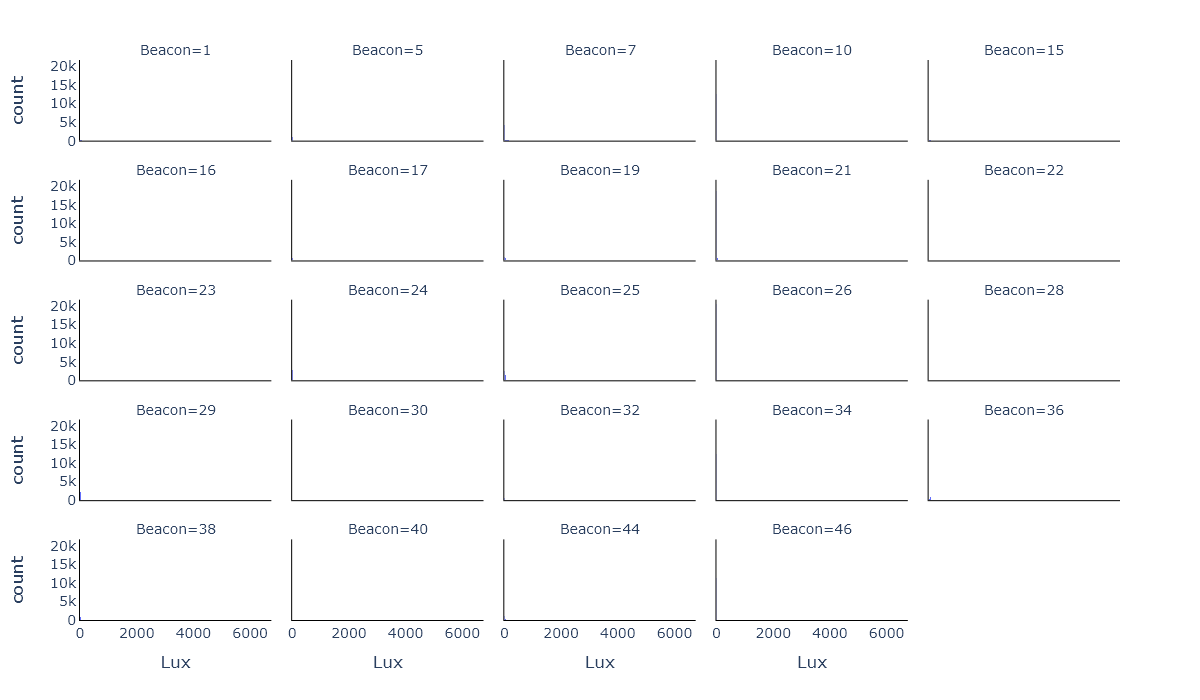

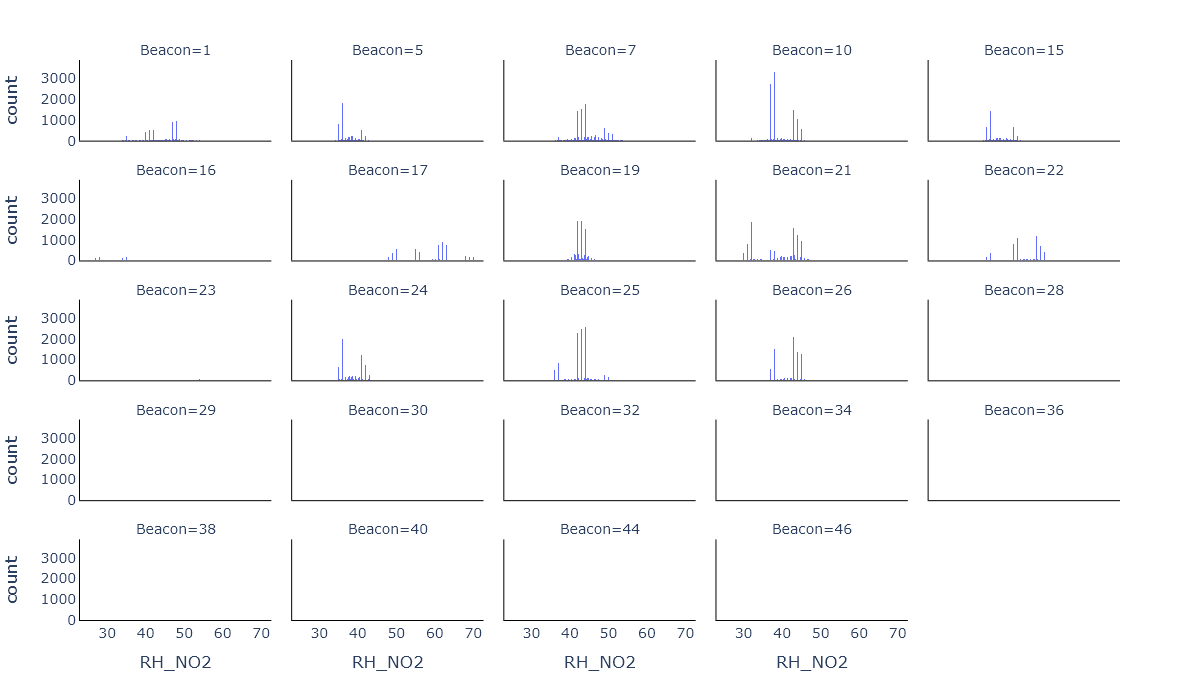

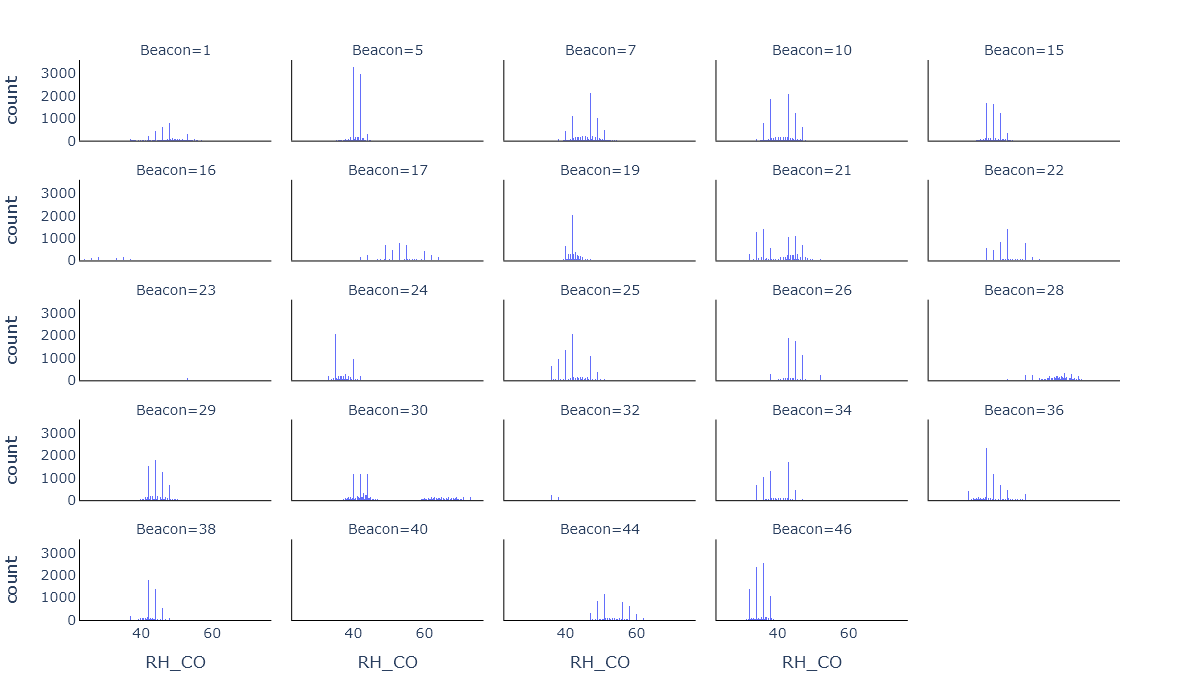

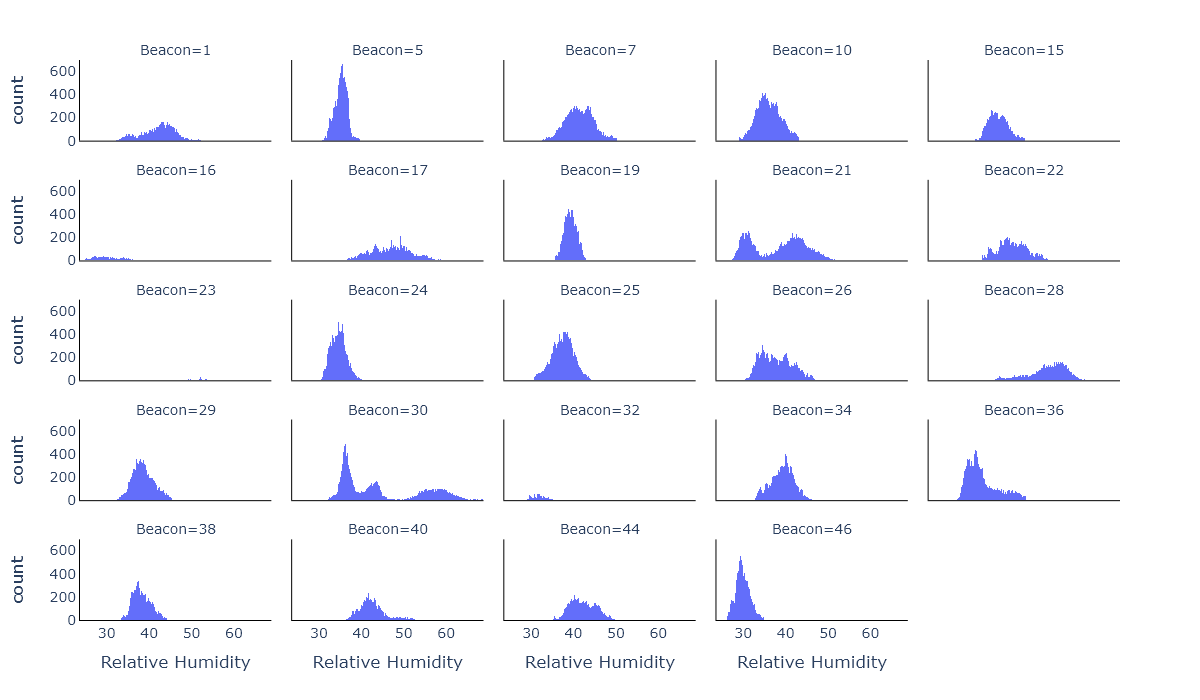

In [26]:
histofacet(cleaned_data)

## Setting Up Multiindex

In [16]:
def set_multiindex(df):
    return df.set_index(['Beacon', 'Timestamp'])

data_copy = set_multiindex(data.copy().reset_index())

In [17]:
# data_copy2.groupby([pd.Grouper(level='Beiwe'),pd.Grouper(level='Timestamp', freq='H')]).mean()
data_copy.groupby([pd.Grouper(level='Beacon')]).resample('H',level='Timestamp').mean()

TVOC         CO2        NO2        CO  \
Beacon Timestamp                                                          
1      2020-06-08 00:00:00  527.885833  469.544375  75.843333 -0.655045   
       2020-06-08 01:00:00  468.814167  401.781231  77.004167 -0.618306   
       2020-06-08 02:00:00  421.813333  372.496681  78.335833 -0.761114   
       2020-06-08 03:00:00  389.796667  350.954593  80.205833 -0.742630   
       2020-06-08 04:00:00  376.620000  331.197129  80.559167 -0.763534   
...                                ...         ...        ...       ...   
46     2020-08-26 20:00:00         NaN         NaN        NaN       NaN   
       2020-08-26 21:00:00         NaN         NaN        NaN       NaN   
       2020-08-26 22:00:00         NaN         NaN        NaN       NaN   
       2020-08-26 23:00:00         NaN         NaN        NaN       NaN   
       2020-08-27 00:00:00         NaN         NaN        NaN       NaN   

                            PM_C_2p5    PM_C_10  T_NO2       T_CO  \
Beacon Timestamp                                                    
1      2020-06-08 00:00:00  9.535021  14.141258   28.0  27.706667   
       2020-06-08 01:00:00  9.311725  13.737326   28.0  27.133333   
       2020-06-08 02:00:00  9.148522  13.354847   28.0  27.236667   
       2020-06-08 03:00:00  9.625882  14.369265   28.0  27.010000   
       2020-06-08 04:00:00  9.559476  14.007914   28.0  27.000000   
...                              ...        ...    ...        ...   
46     2020-08-26 20:00:00       NaN        NaN    NaN        NaN   
       2020-08-26 21:00:00       NaN        NaN    NaN        NaN   
       2020-08-26 22:00:00       NaN        NaN    NaN        NaN   
       2020-08-26 23:00:00       NaN        NaN    NaN        NaN   
       2020-08-27 00:00:00       NaN        NaN    NaN        NaN   

                            Temperature [C]  Lux     RH_NO2      RH_CO  \
Beacon Timestamp                                                         
1      2020-06-08 00:00:00        30.545194  0.0  36.873333  39.703333   
       2020-06-08 01:00:00        30.360046  0.0  37.689167  40.505000   
       2020-06-08 02:00:00        30.422589  0.0  38.246667  41.023333   
       2020-06-08 03:00:00        30.398366  0.0  38.343333  41.020000   
       2020-06-08 04:00:00        30.351873  0.0  38.340000  41.090000   
...                                     ...  ...        ...        ...   
46     2020-08-26 20:00:00              NaN  NaN        NaN        NaN   
       2020-08-26 21:00:00              NaN  NaN        NaN        NaN   
       2020-08-26 22:00:00              NaN  NaN        NaN        NaN   
       2020-08-26 23:00:00              NaN  NaN        NaN        NaN   
       2020-08-27 00:00:00              NaN  NaN        NaN        NaN   

                            Relative Humidity  
Beacon Timestamp                               
1      2020-06-08 00:00:00          35.373709  
       2020-06-08 01:00:00          36.105501  
       2020-06-08 02:00:00          36.692966  
       2020-06-08 03:00:00          36.638367  
       2020-06-08 04:00:00          36.732029  
...                                       ...  
46     2020-08-26 20:00:00                NaN  
       2020-08-26 21:00:00                NaN  
       2020-08-26 22:00:00                NaN  
       2020-08-26 23:00:00                NaN  
       2020-08-27 00:00:00                NaN  

[43410 rows x 13 columns]

In [35]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go



def histo(df,var):
    important_vars = ['TVOC','CO2','NO2','CO','PM_C_2p5','PM_C_10','T_NO2','T_CO','Temperature [C]','Lux','RH_NO2','RH_CO','Relative Humidity']
    
    rows=5; cols=5
    fig = make_subplots(rows=rows, cols=cols)
    
    row = 1; col = 1
    valid_beacons = [1, 5, 7, 10, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 28, 29, 30, 32, 34, 36, 38, 40, 44, 46]
    for beacon in valid_beacons: 
        fig.add_trace(go.Histogram(x=df.loc[beacon],name=beacon),row=row, col=col)
        fig.update_xaxes(title_text=beacon, row=row, col=col)
        fig.update_layout(title_text=var)
        col+=1
        if col > cols:
            col=1
            row+=1
        
    fig = clean_layout(fig, fontsize=12, nticks=8, short_xticklabel=False)
    fig.show("png",width=1200, height=700)

[1, 5, 7, 10, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 28, 29, 30, 32, 34, 36, 38, 40, 44, 46]


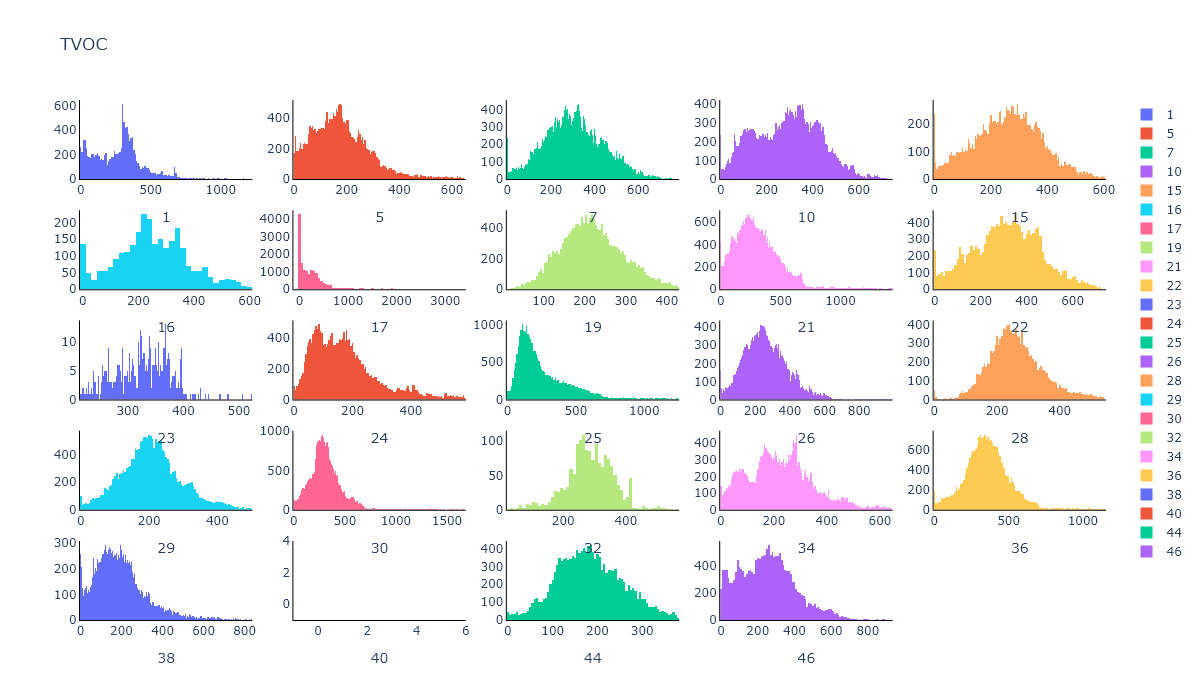

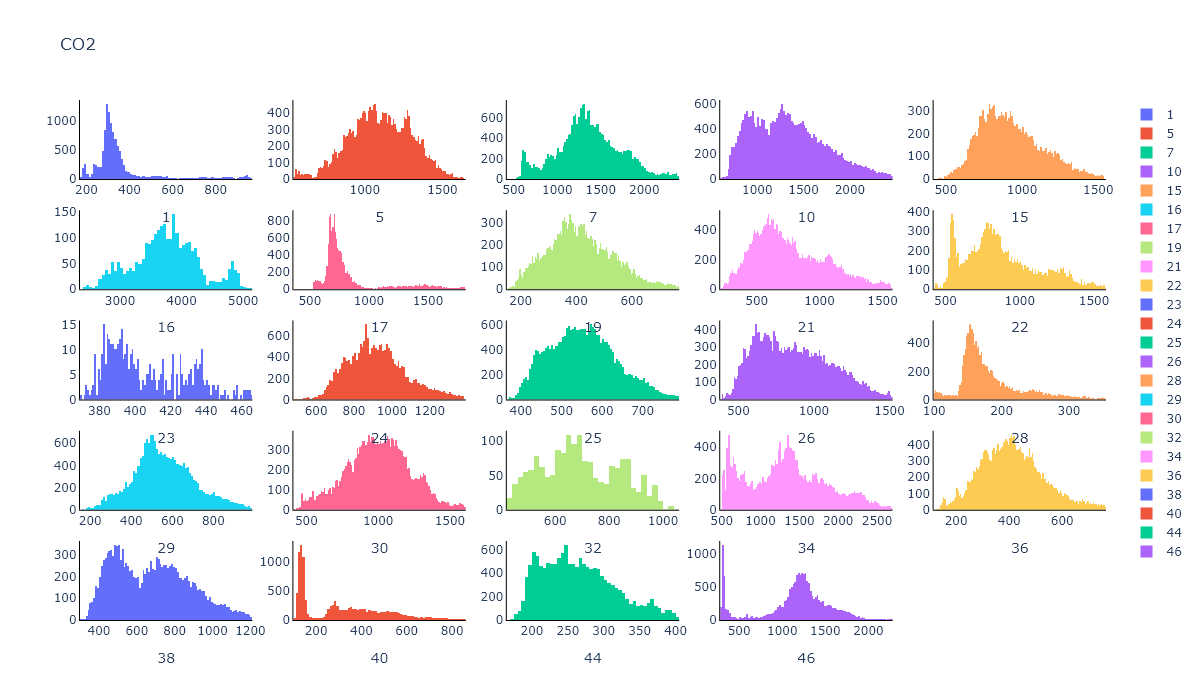

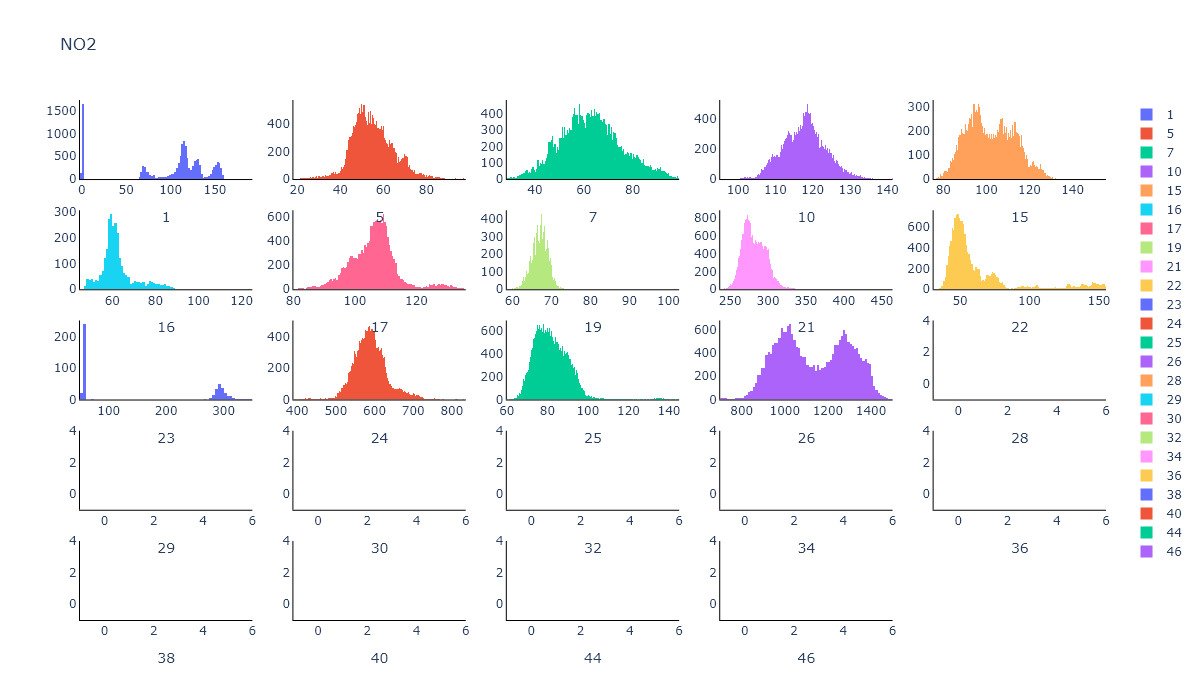

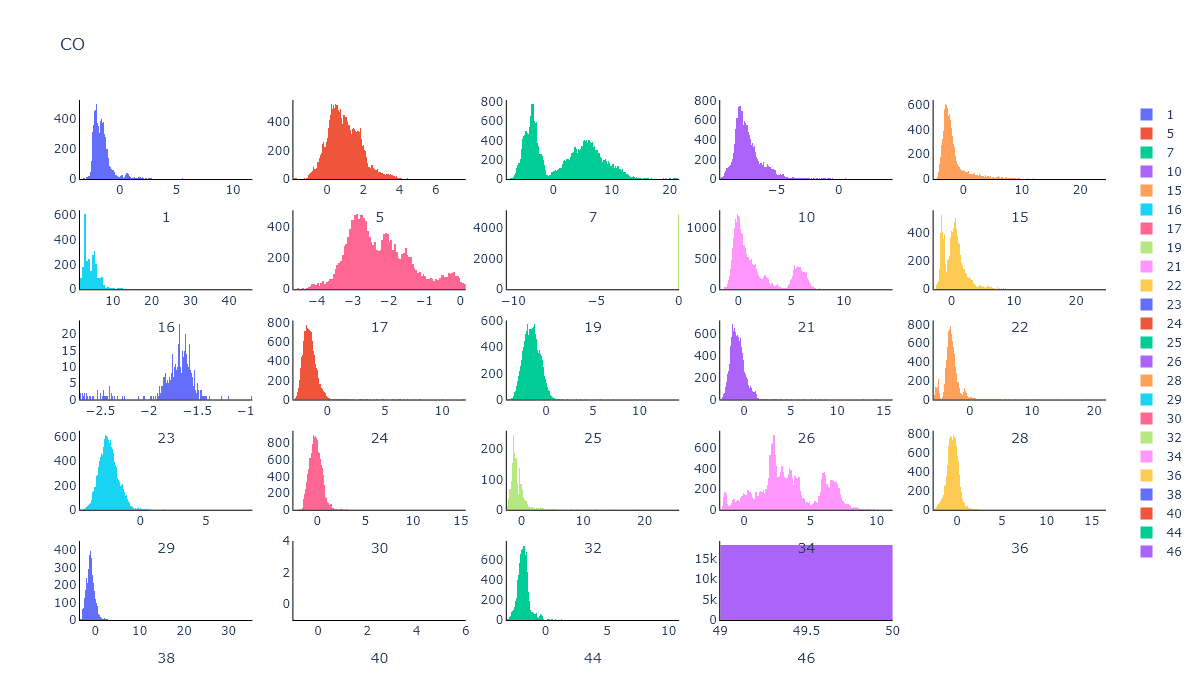

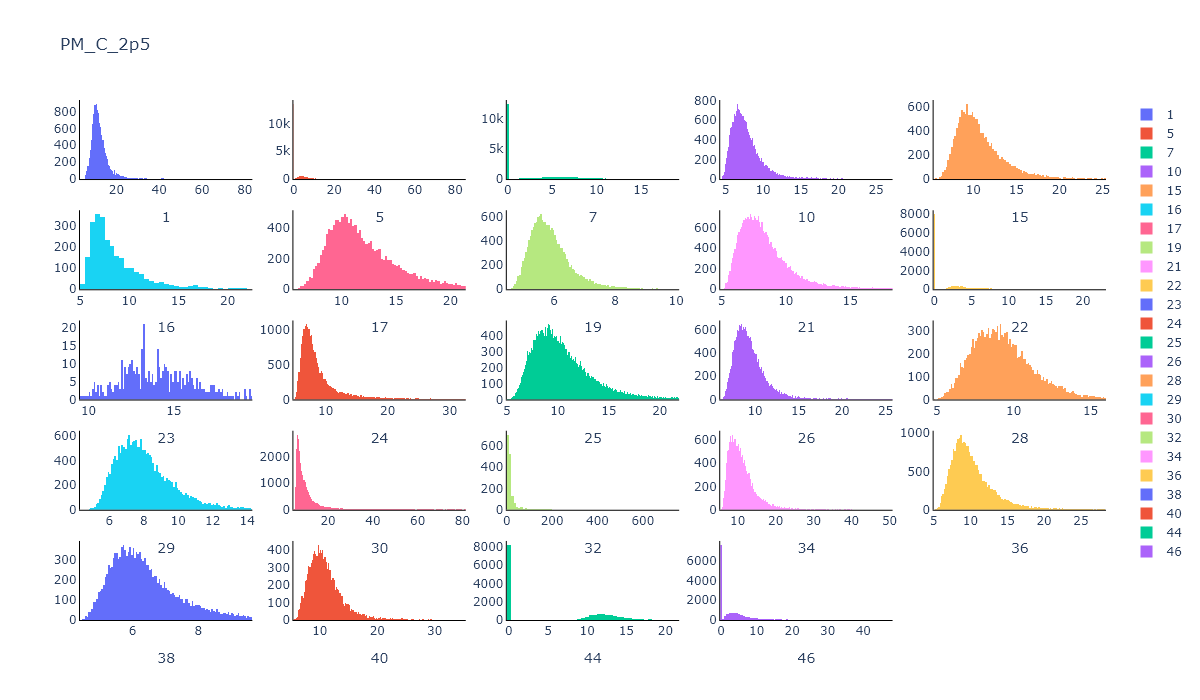

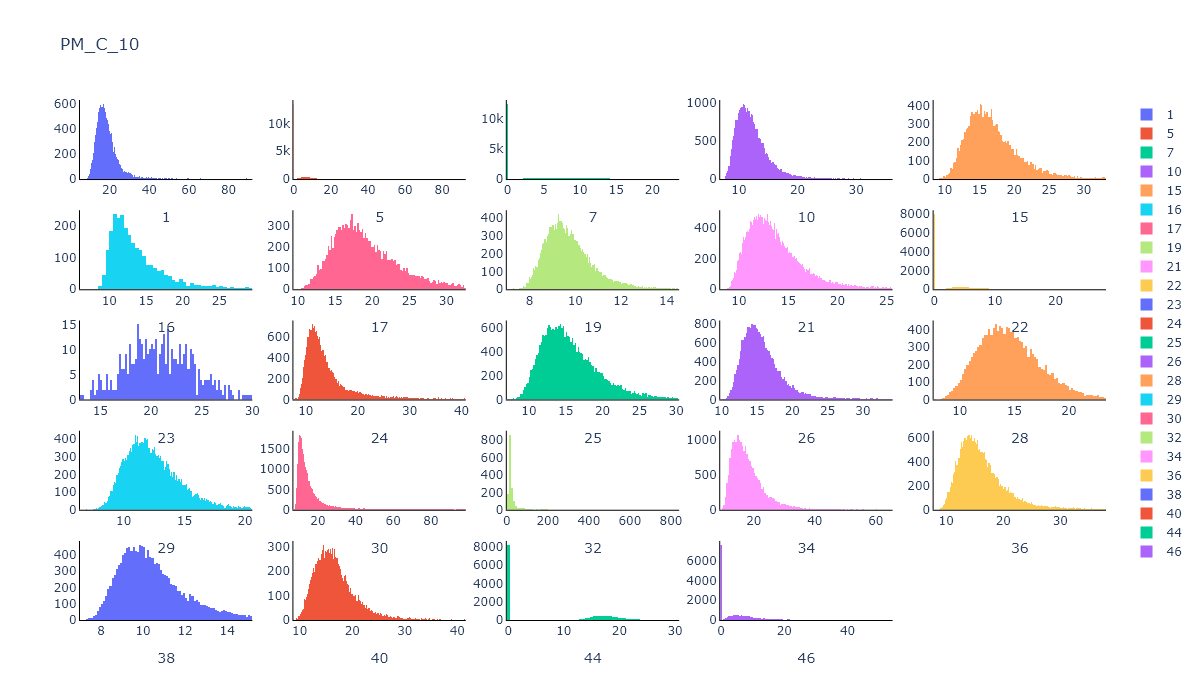

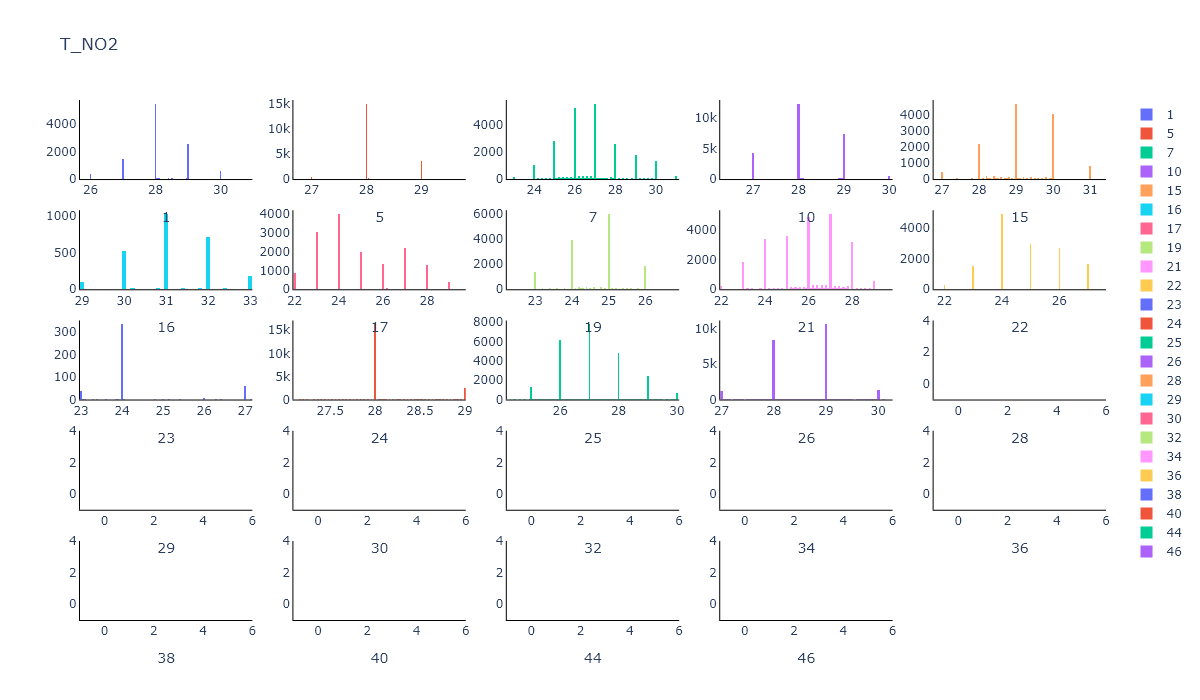

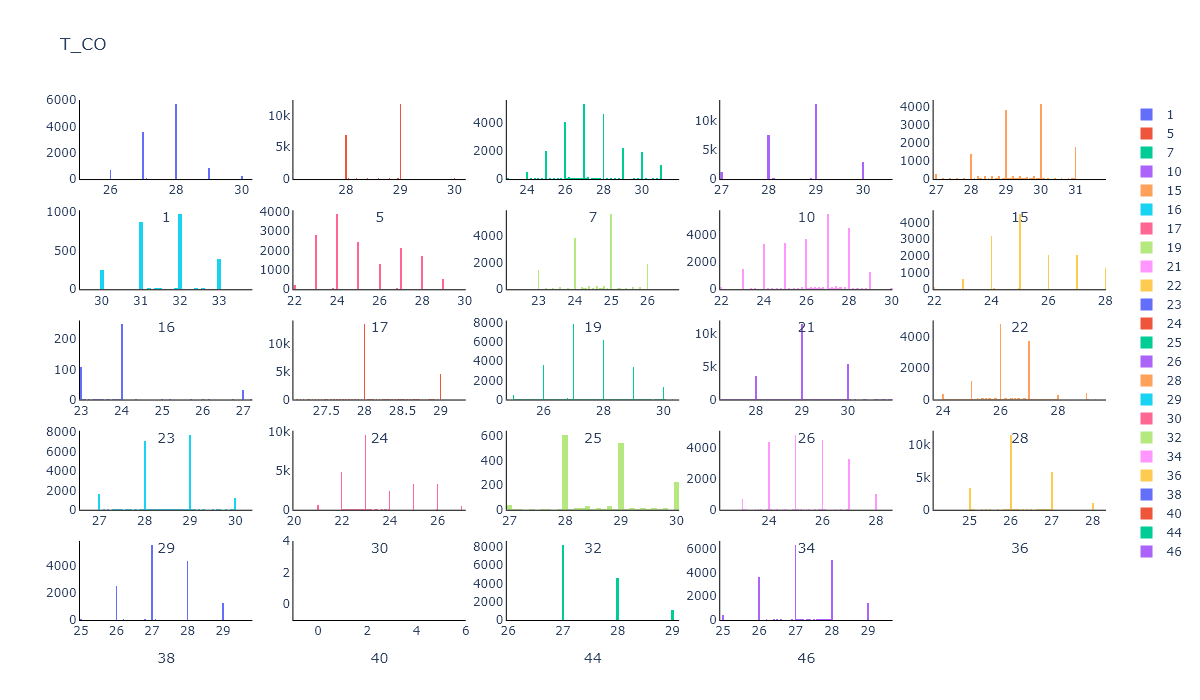

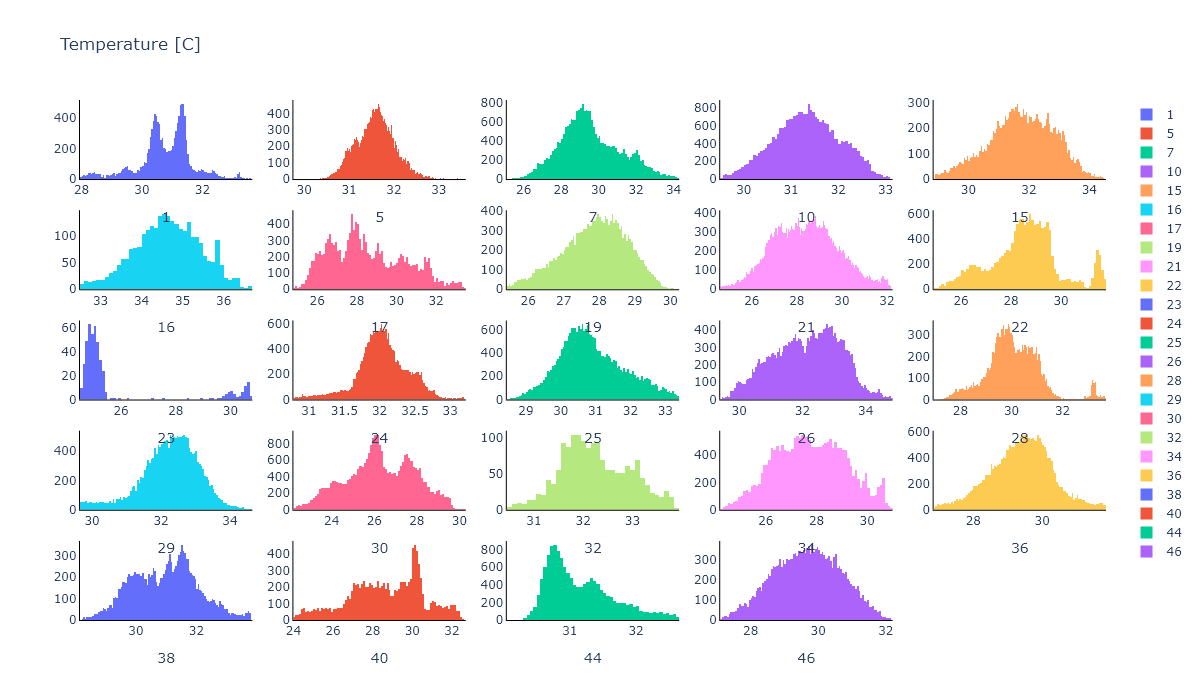

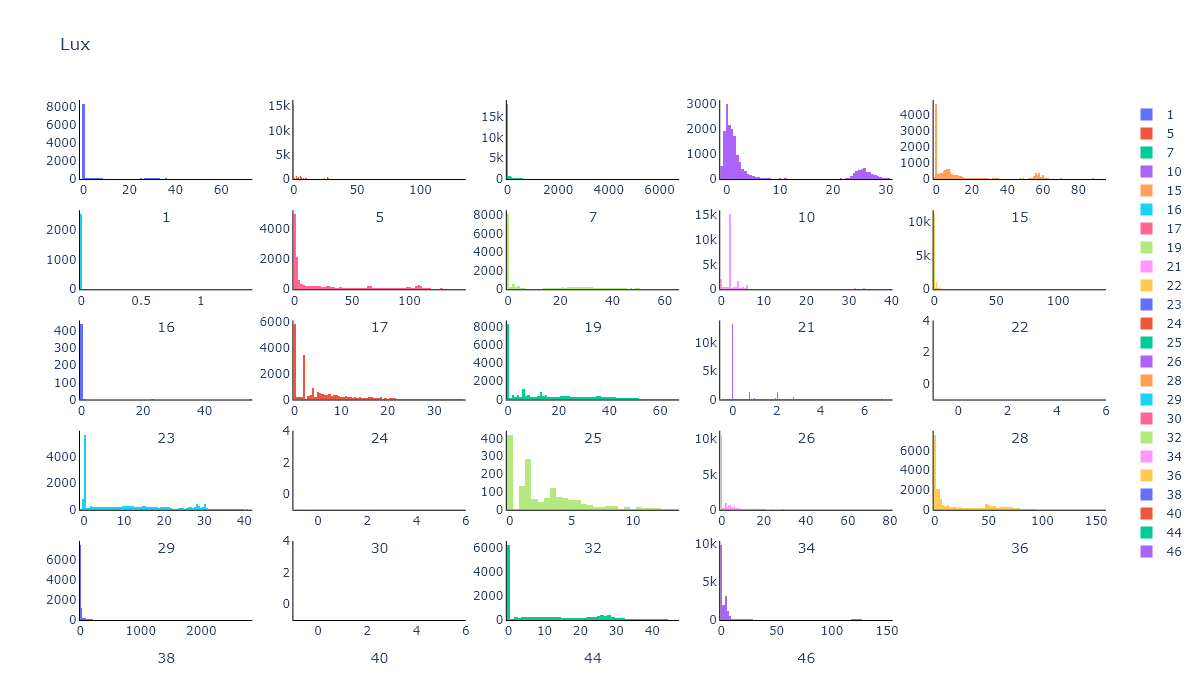

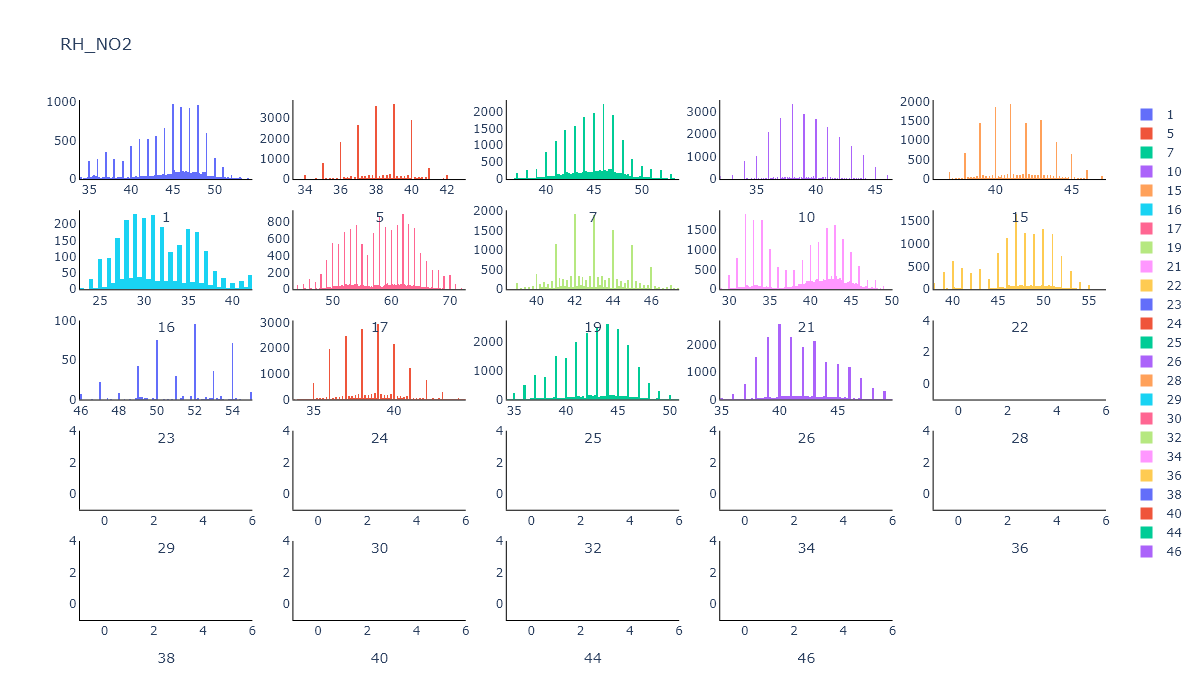

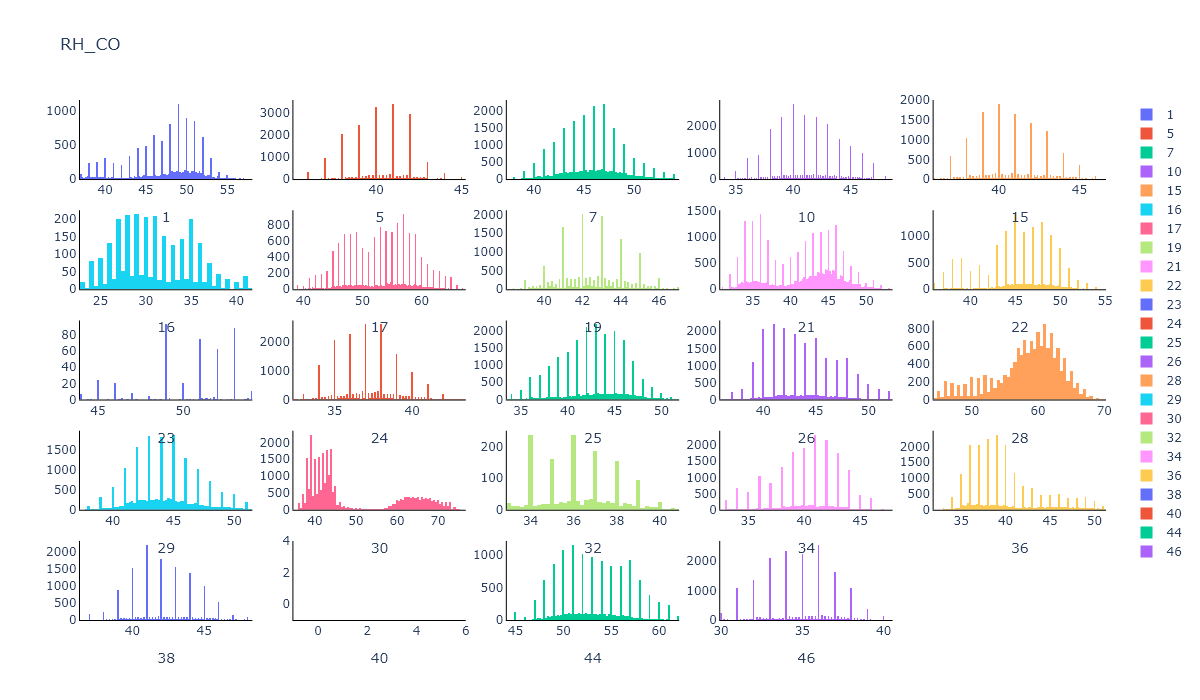

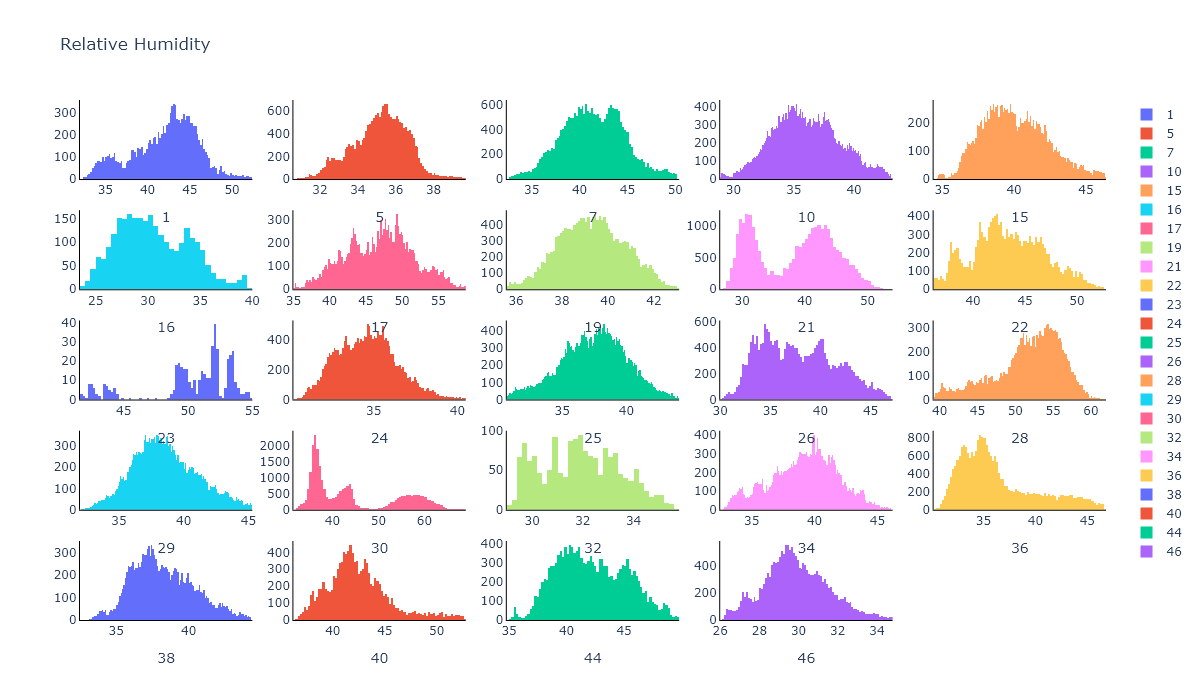

In [36]:
data_copy = set_multiindex(cleaned_data.copy().reset_index())
beacon_list = [1,5,6,7,10,11,15,16,17,19,21,22,23,24,25,26,28,29,30,32,34,36,38,40,41,44,46,48]
valid_beacons = [1, 5, 7, 10, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 28, 29, 30, 32, 34, 36, 38, 40, 44, 46]
print(data_copy.index.get_level_values('Beacon').unique().to_list())

important_vars = ['TVOC','CO2','NO2','CO','PM_C_2p5','PM_C_10','T_NO2','T_CO','Temperature [C]','Lux','RH_NO2','RH_CO','Relative Humidity']

for var in important_vars:
    histo(data_copy[var],var)

[1, 5, 7, 10, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 28, 29, 30, 32, 34, 36, 38, 40, 44, 46]


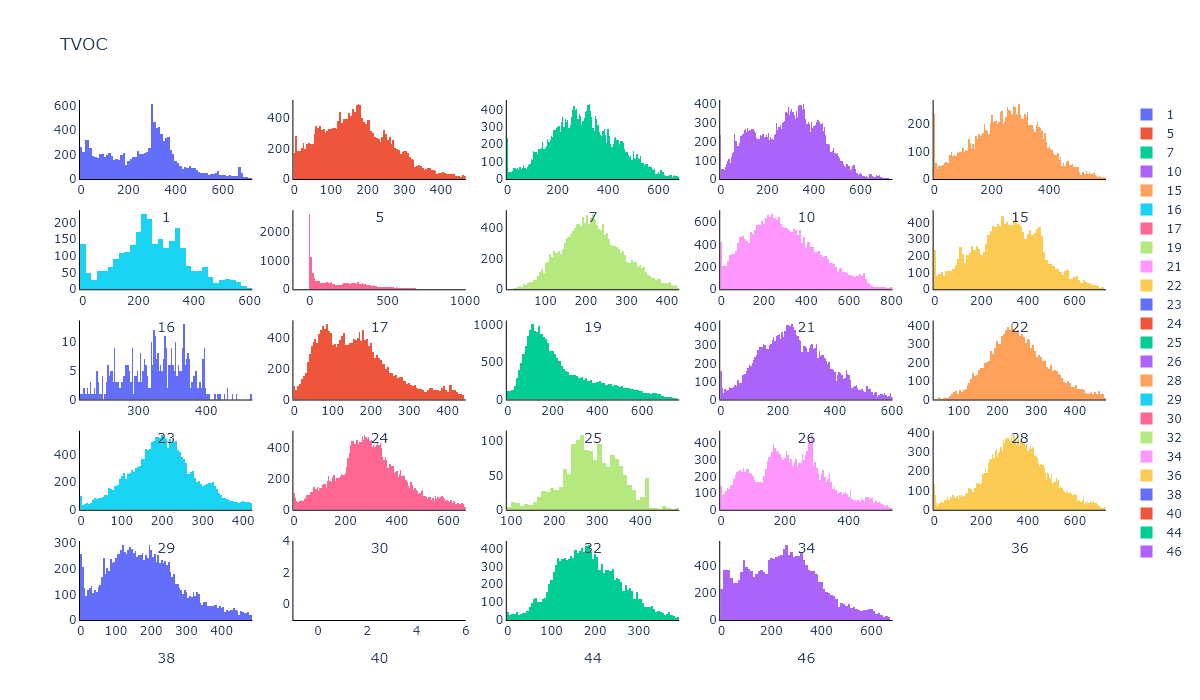

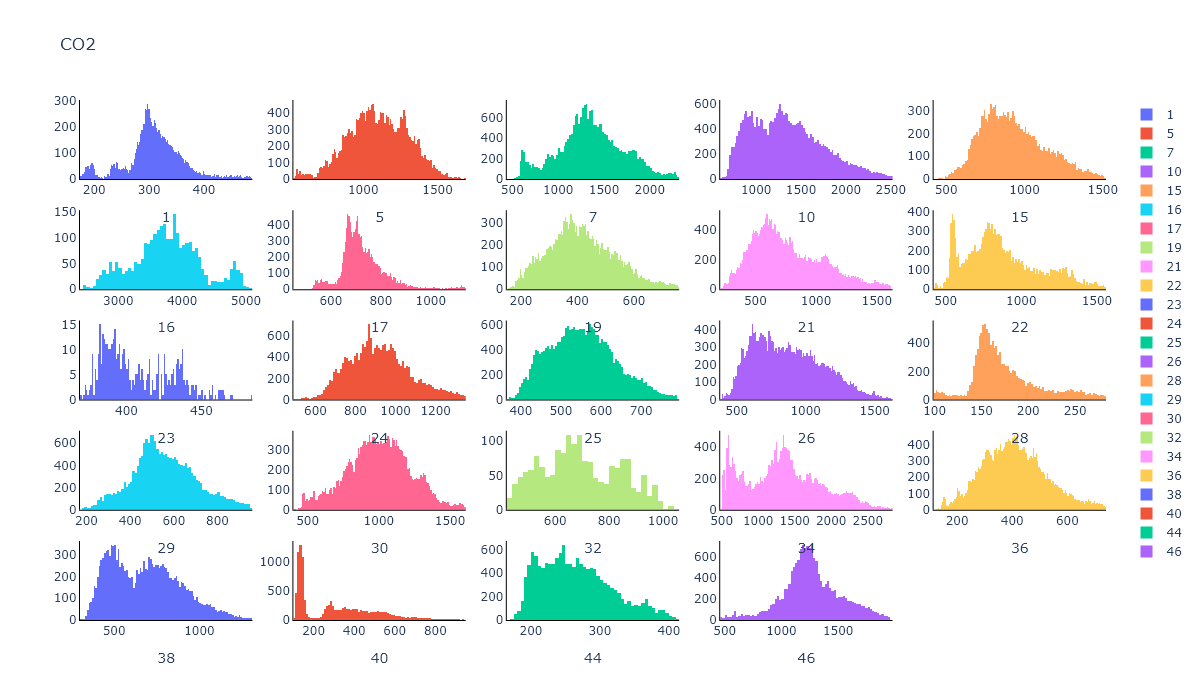

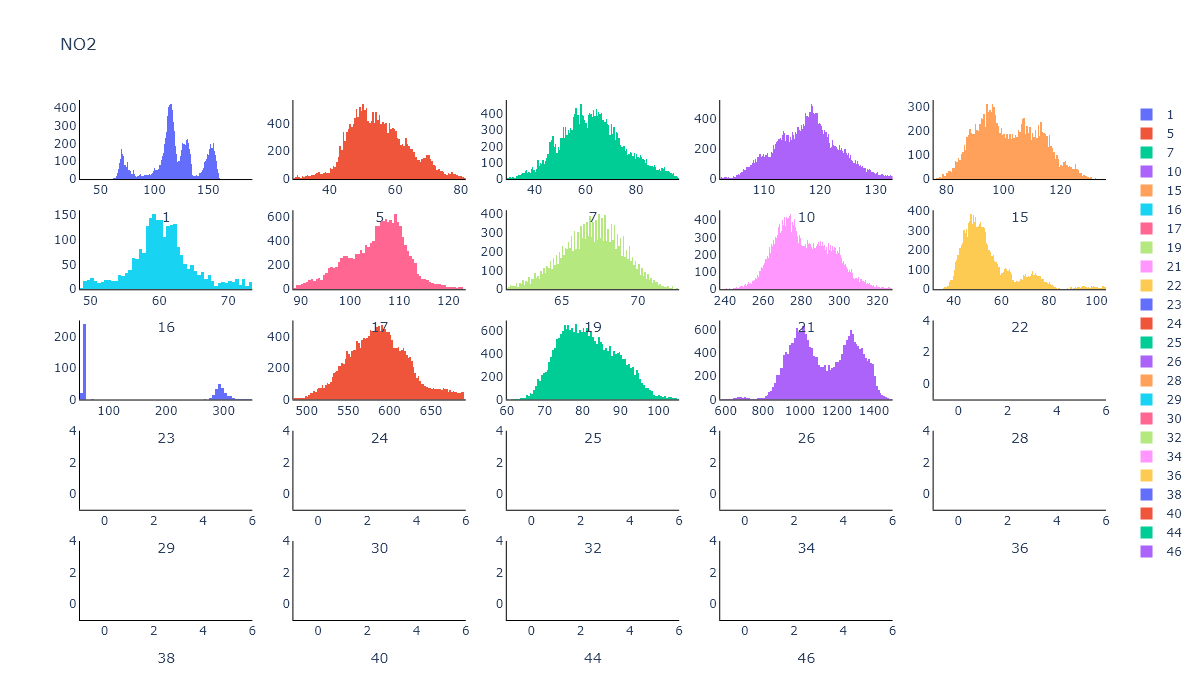

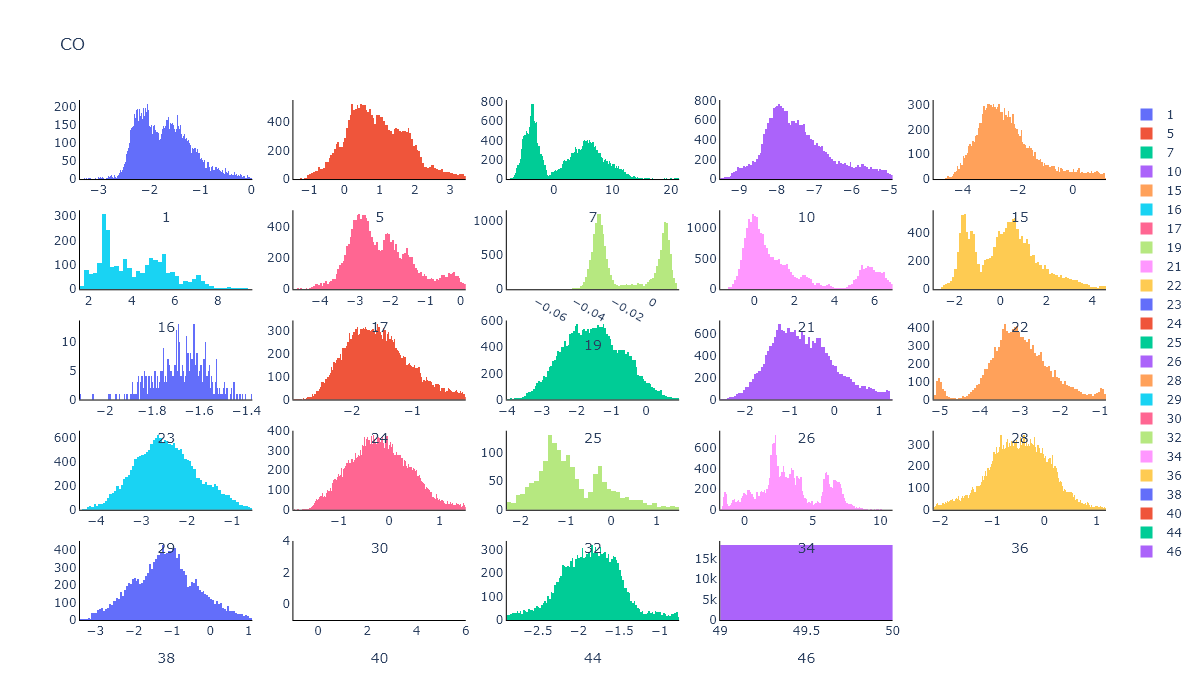

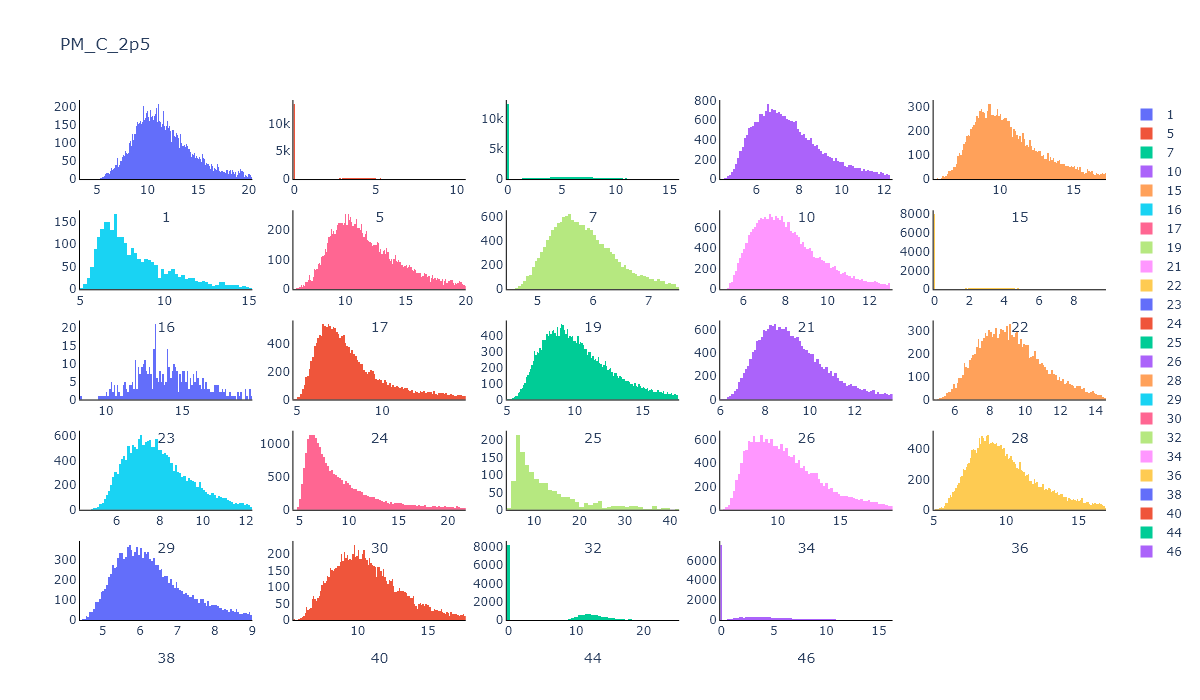

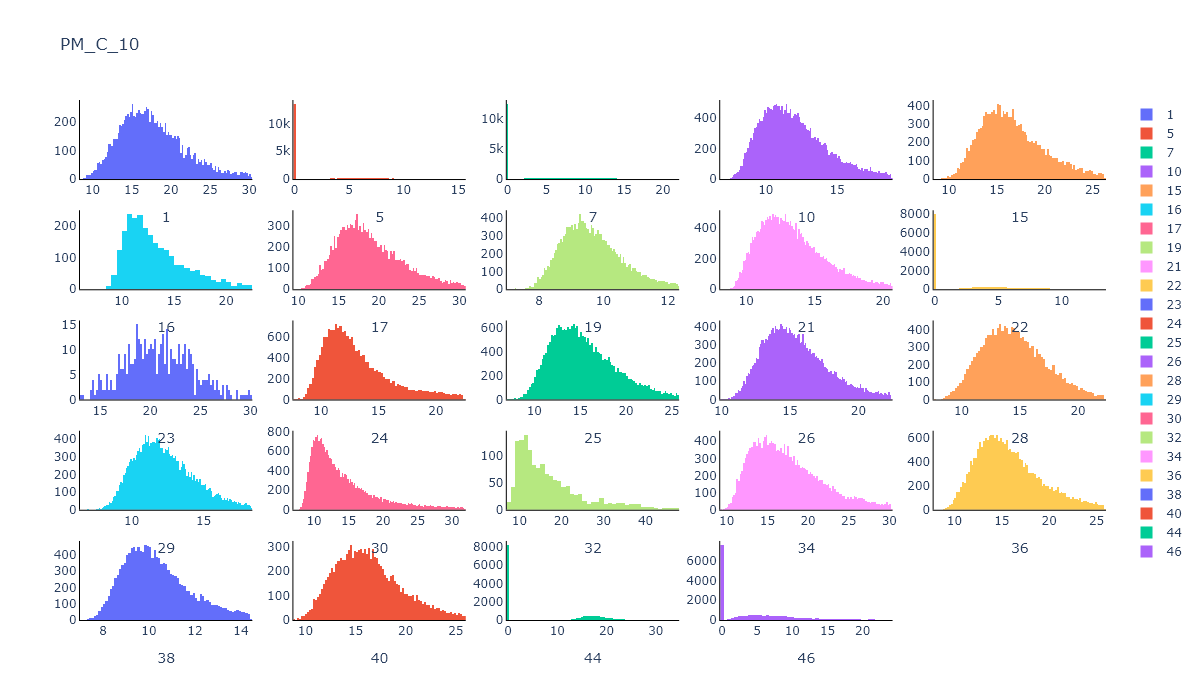

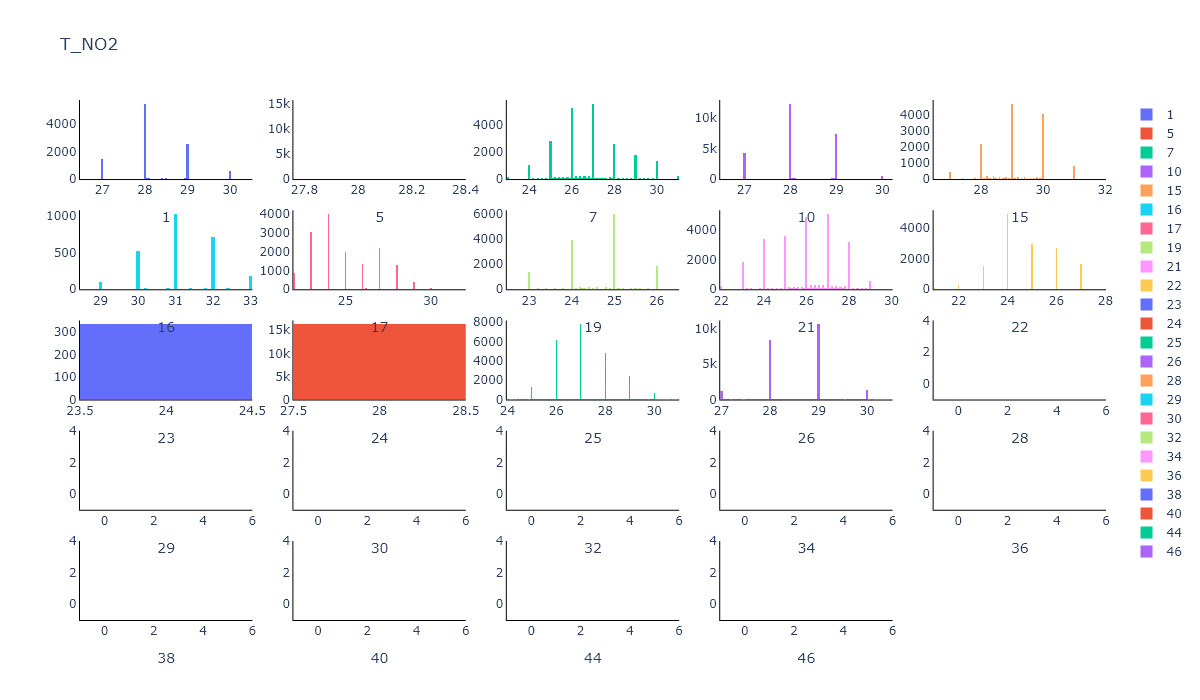

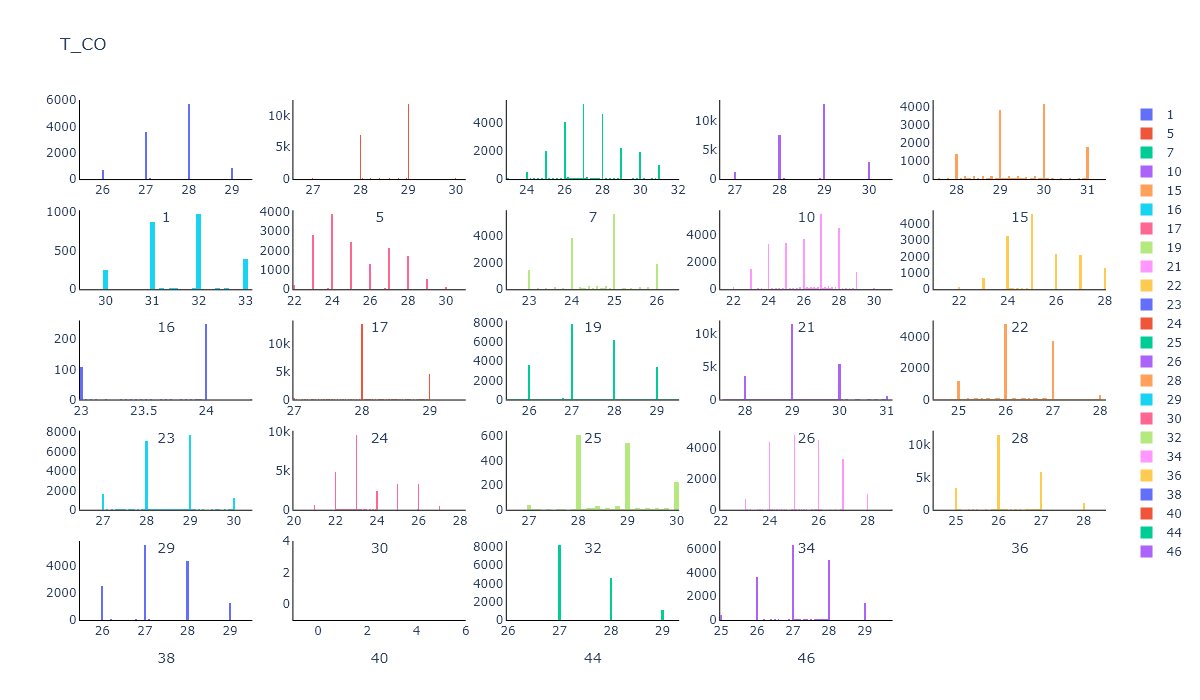

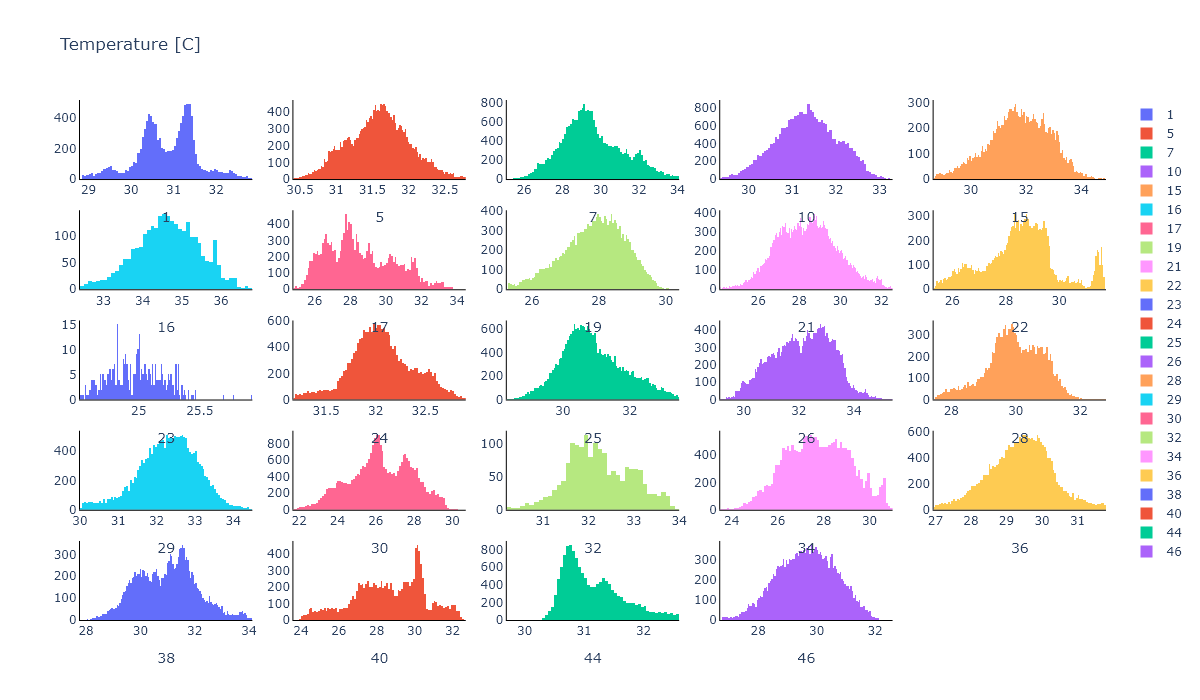

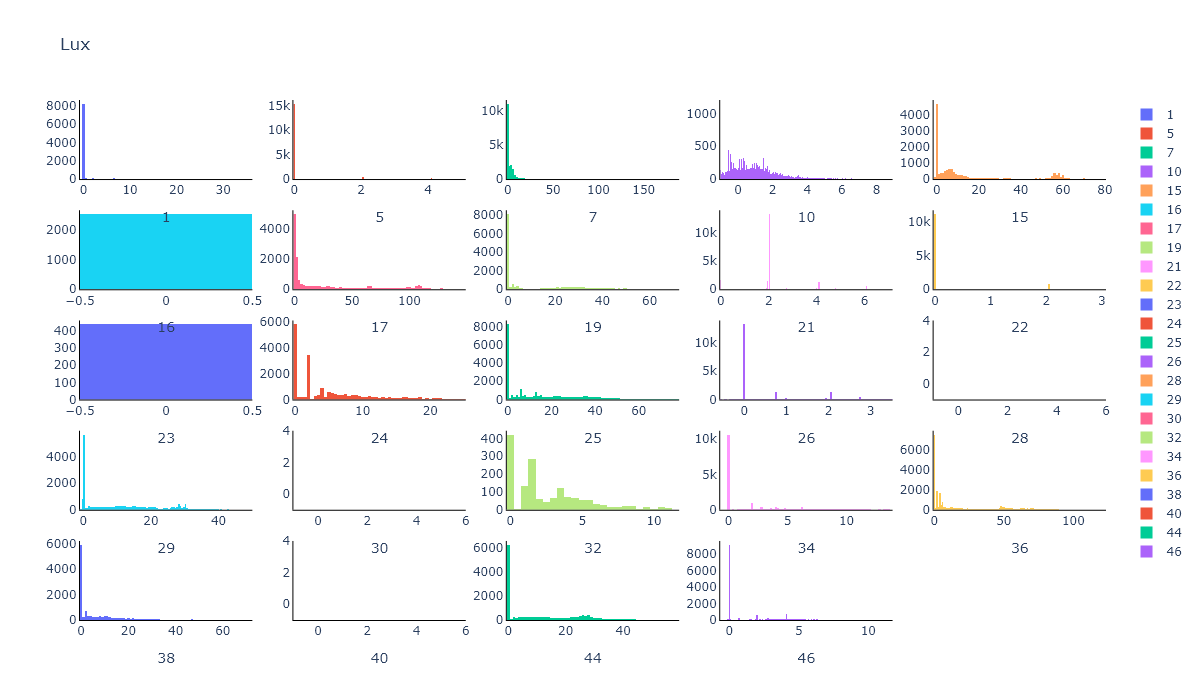

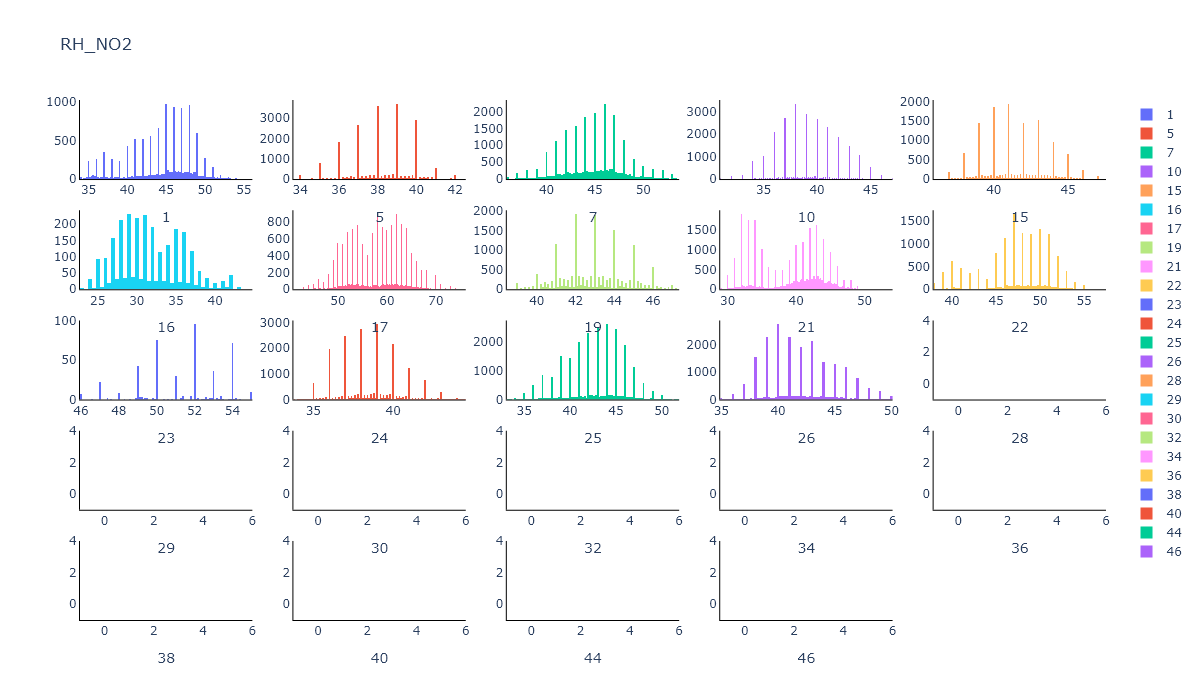

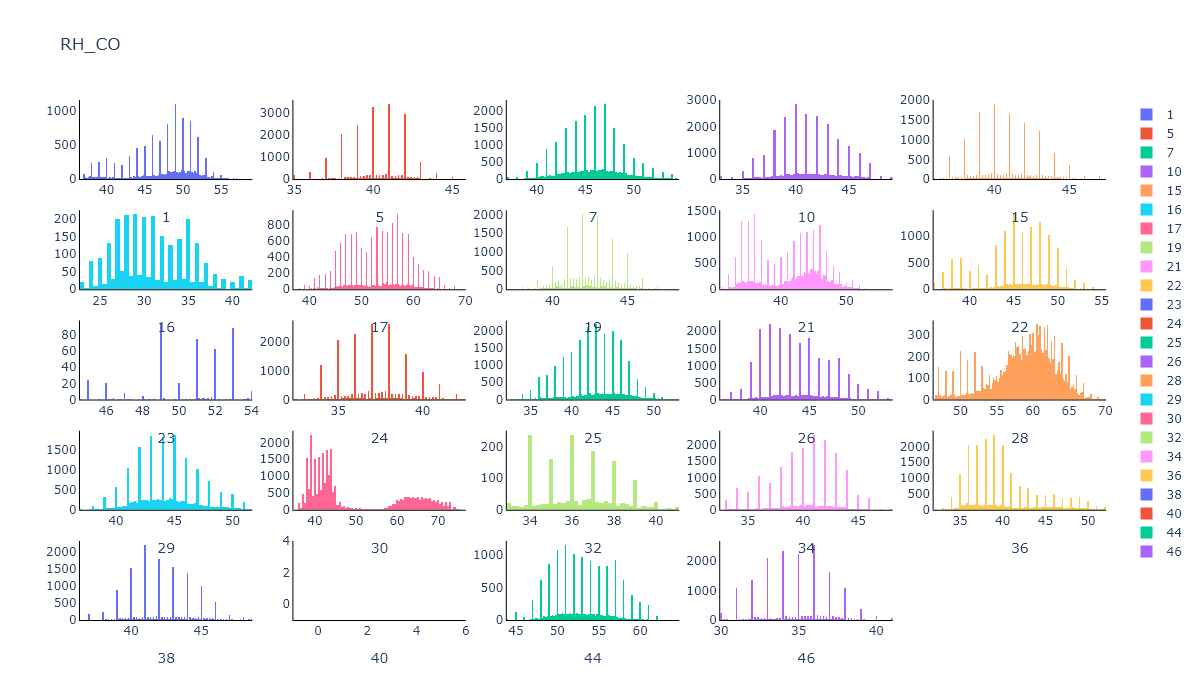

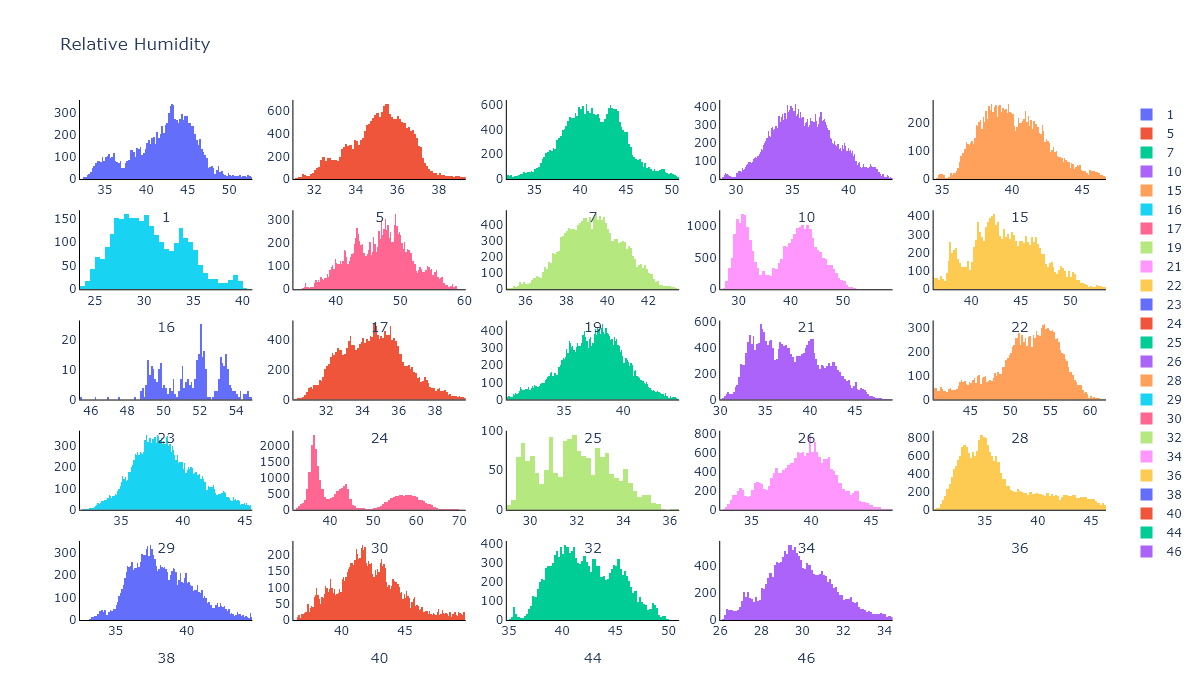

In [37]:
important_cols = ['TVOC','CO2','NO2','CO','PM_C_2p5','PM_C_10','T_NO2','T_CO','Temperature [C]','Lux','RH_NO2','RH_CO','Relative Humidity','Beacon']
df3=pd.read_parquet('../data/processed/bpeace2-beacon-IQR.parquet')[important_cols]
data_copy = set_multiindex(df3.copy().reset_index())
beacon_list = [1,5,6,7,10,11,15,16,17,19,21,22,23,24,25,26,28,29,30,32,34,36,38,40,41,44,46,48]
valid_beacons = [1, 5, 7, 10, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 28, 29, 30, 32, 34, 36, 38, 40, 44, 46]
print(data_copy.index.get_level_values('Beacon').unique().to_list())

important_vars = ['TVOC','CO2','NO2','CO','PM_C_2p5','PM_C_10','T_NO2','T_CO','Temperature [C]','Lux','RH_NO2','RH_CO','Relative Humidity']

for var in important_vars:
    histo(data_copy[var],var)

In [31]:
data_copy['TVOC'].loc[1]

KeyError: 'Timestamp'

In [29]:
median_cleaned_data = data_copy.groupby(level='Beacon', group_keys=False).rolling(12).median().droplevel(0)

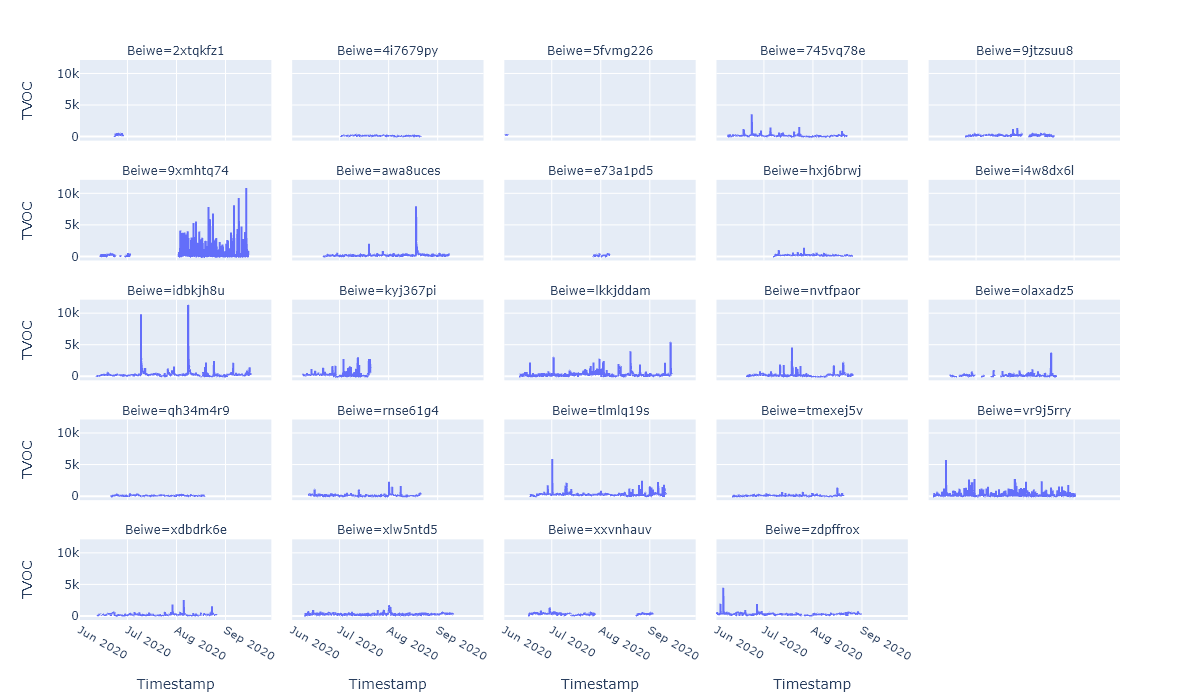

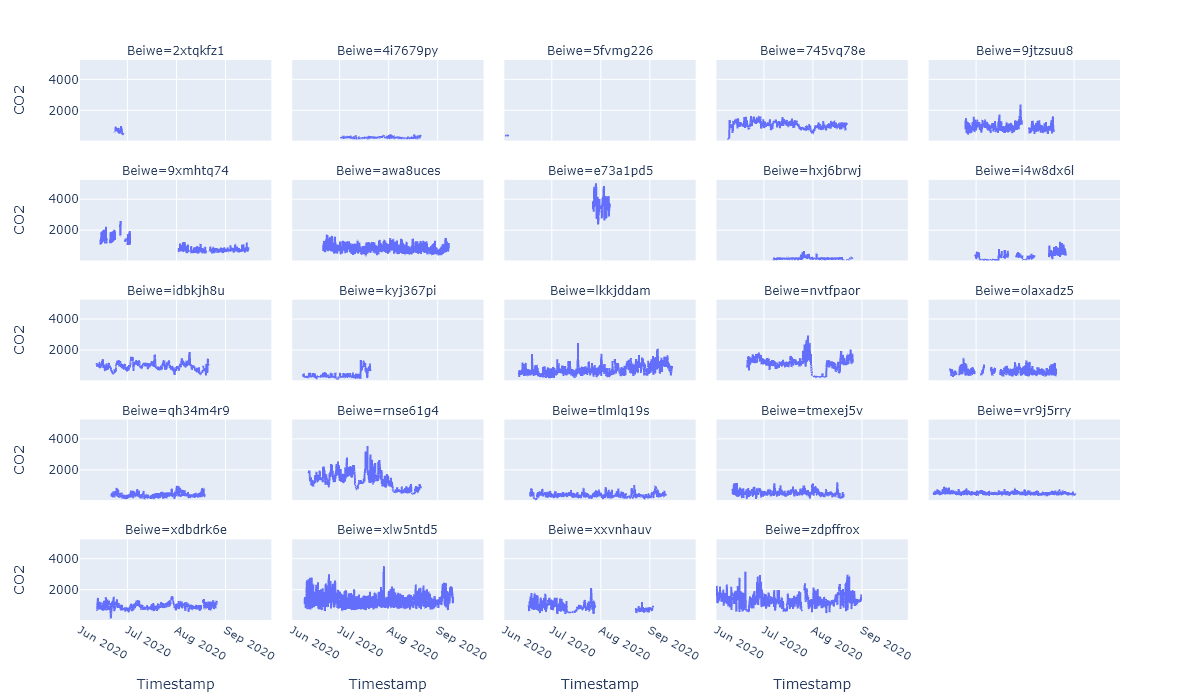

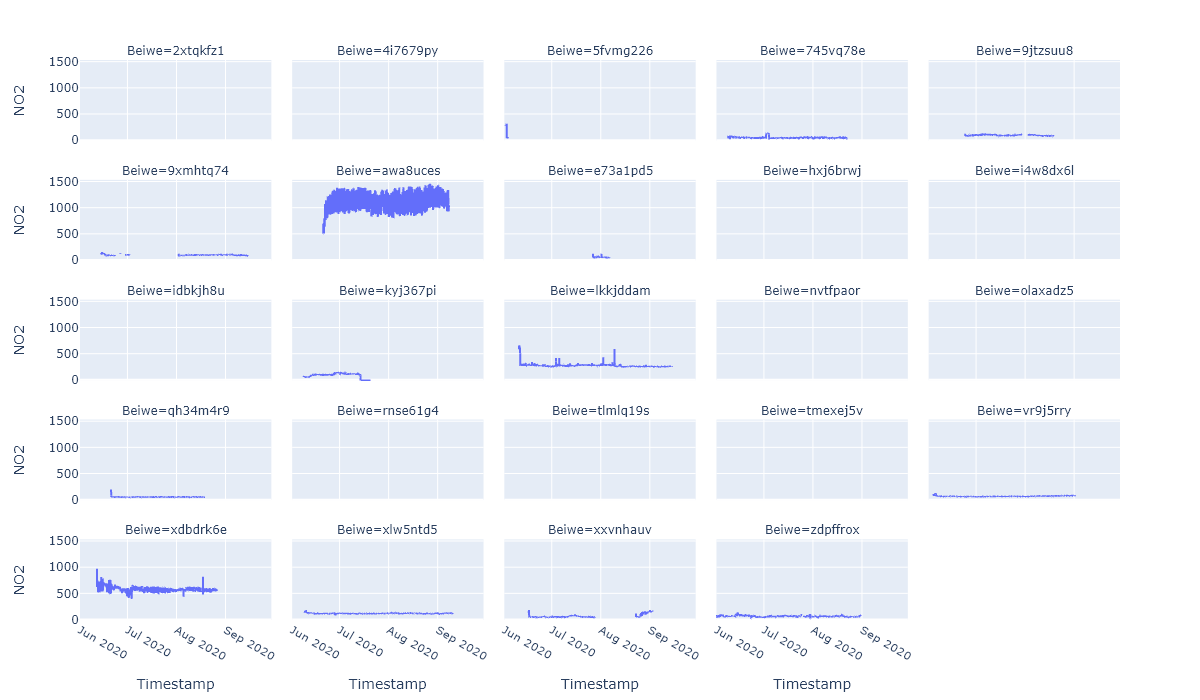

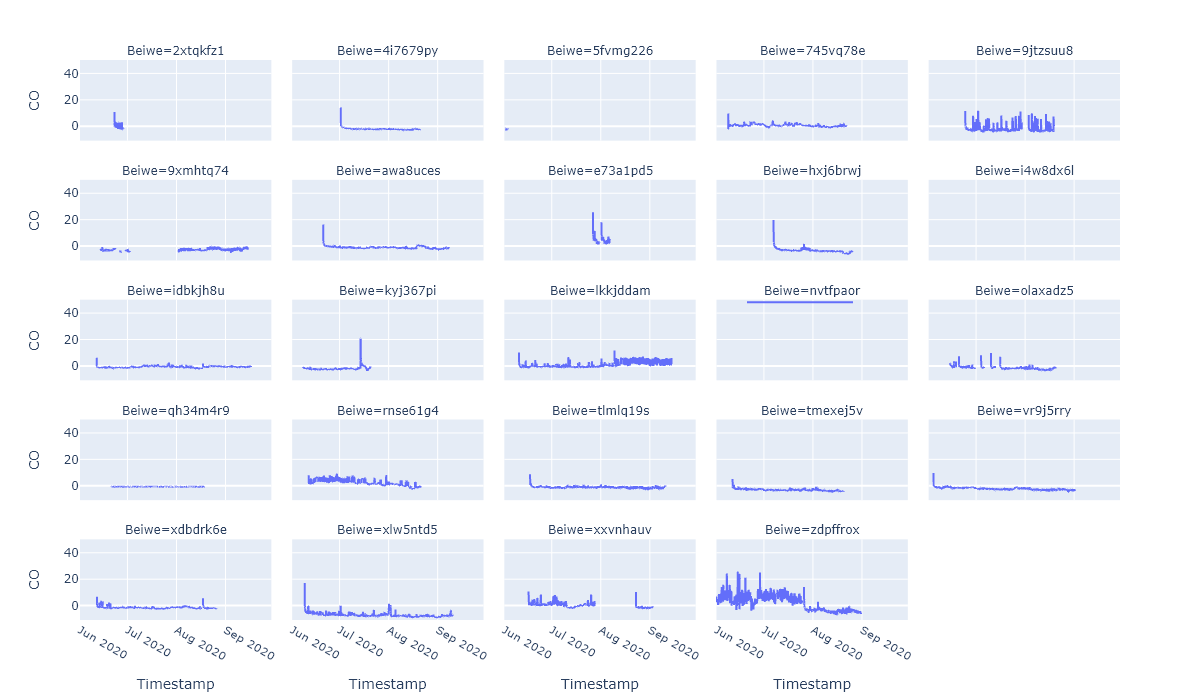

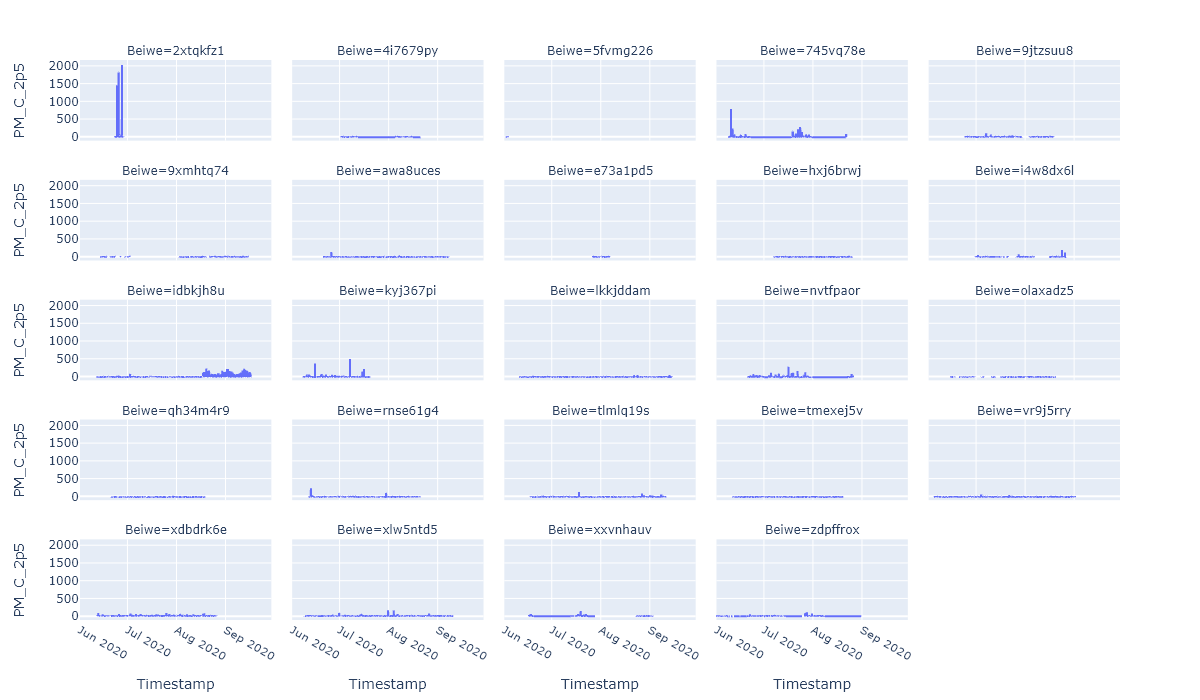

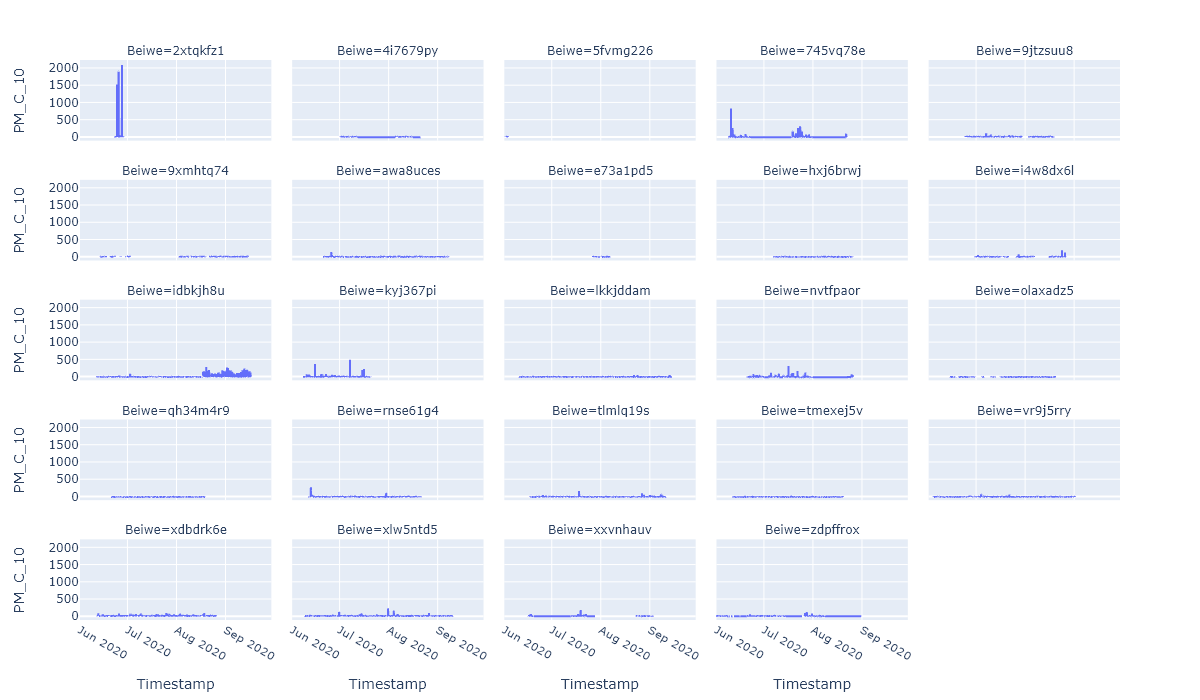

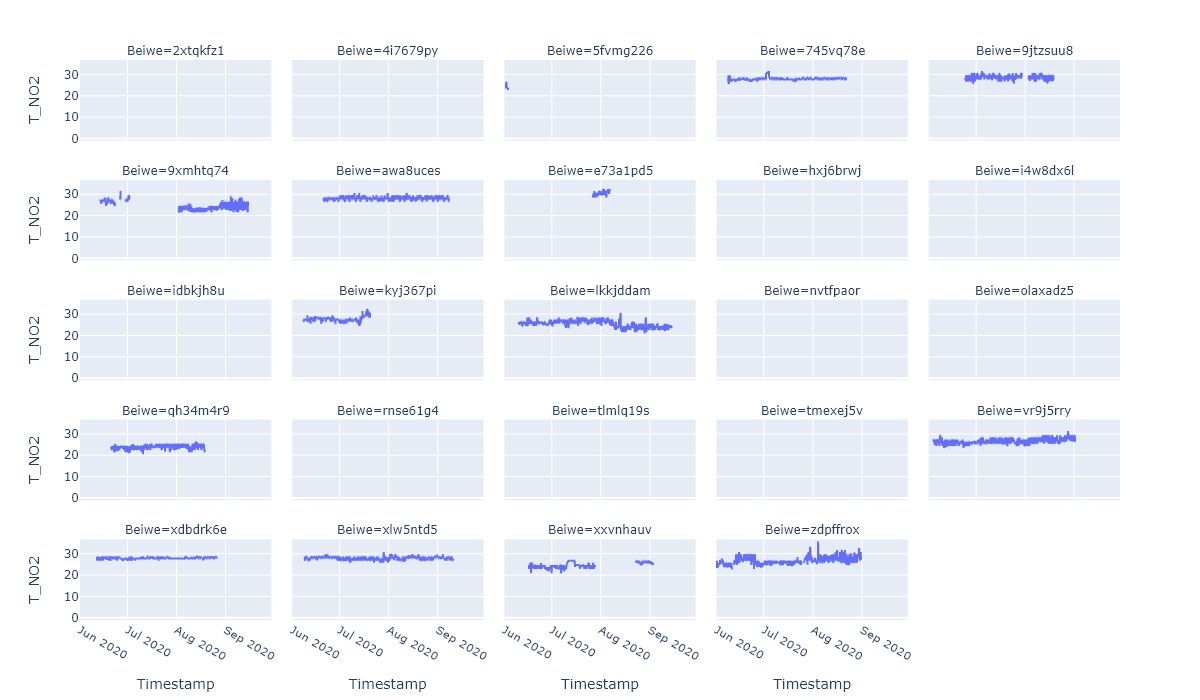

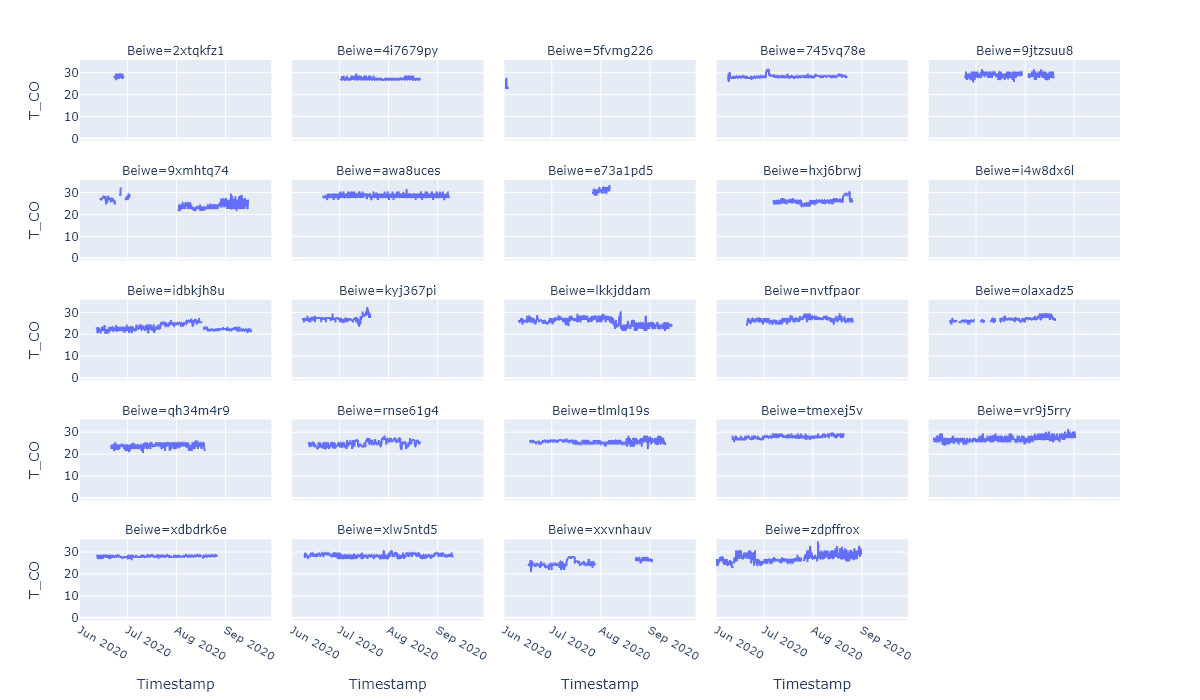

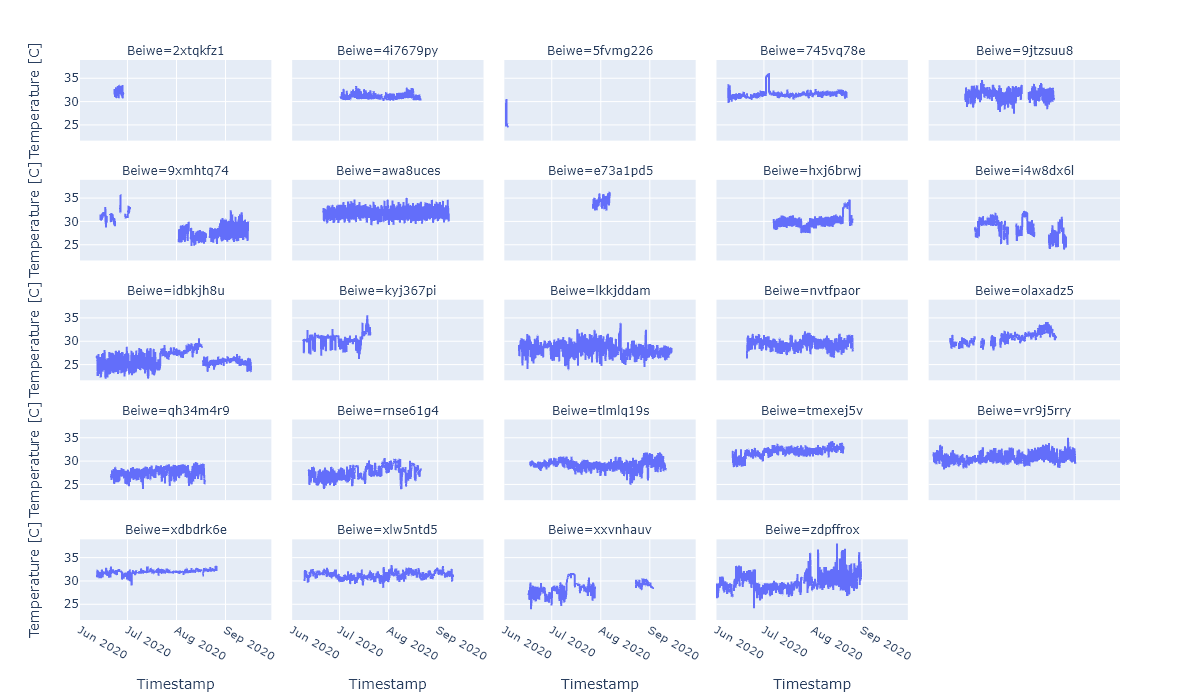

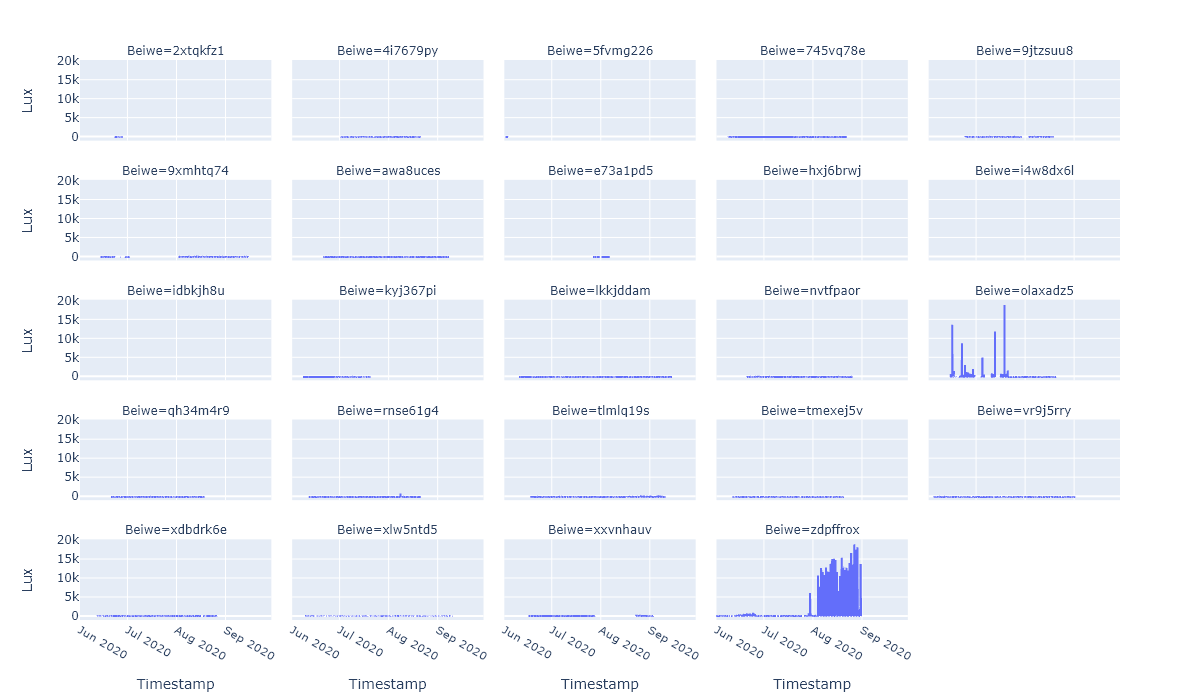

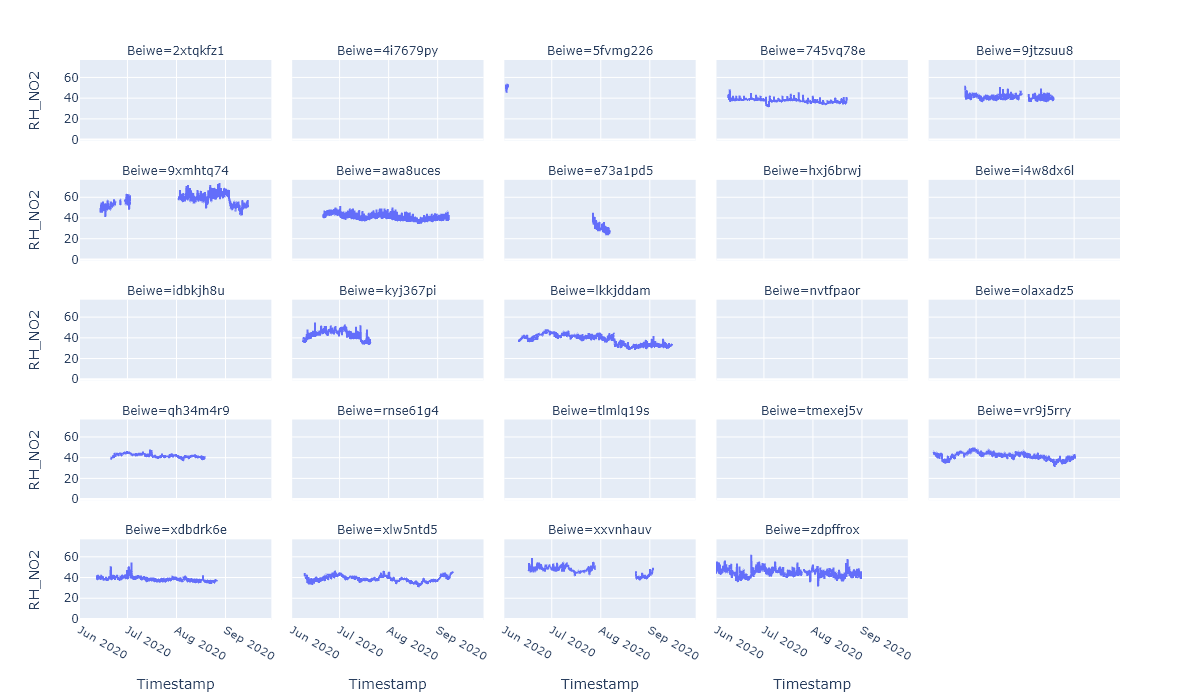

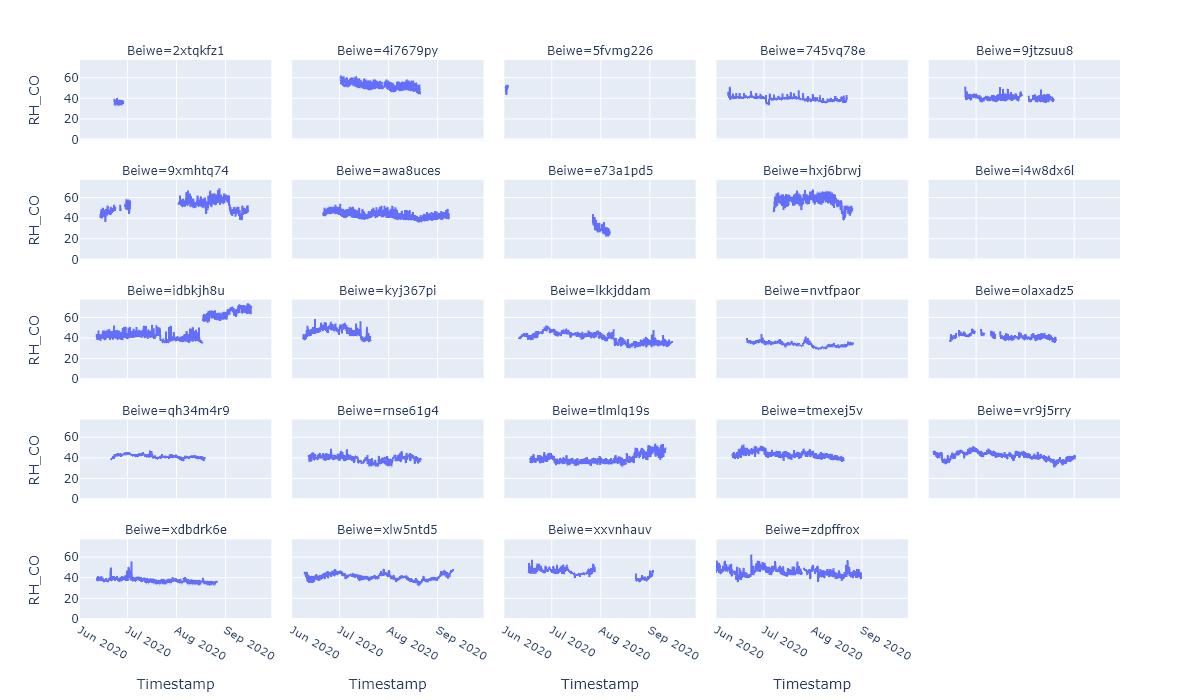

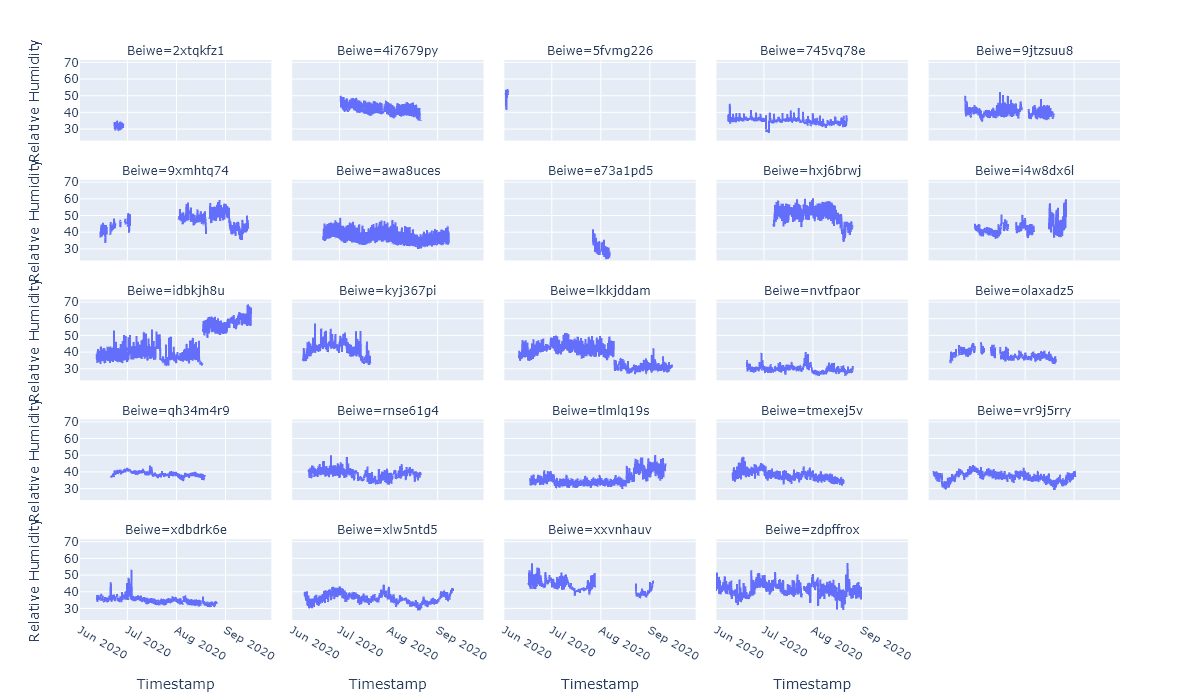

In [57]:
timefacet(median_cleaned_data.reset_index().set_index('Timestamp'))